# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

<font color='blue'>Since the release of the new SAT format in March 2016, the national participation numbers has steadily increased from 1.63M test takers in 2016 (old format) to 1.72M in 2017 to 2.14M in 2018.<br>
<br>
This study was desiged to analyze 2017 and 2018 SAT & ACT tests participation rates and test scores among the 51 different states of America. Trends and correlations will be analyszed and presented.<br>
<br>
It also seek to identify any states with very significant increase in participation rate and through external research conclude the reason(s) for their increase.<br>
<br>
Recommendations will be proposed to apply study findings to further improve participations rates in selected state(s) should the opportunity presents itself.</font>

## Executive Summary

- The average state SAT participation rate has improved from 39.8% in 2017 to 46.6% in 2018/
- In the same period, the average state ACT participation rate has decreased from 65.3% in 2017 to 61.6% in 2018/
- SAT vs ACT participation rates in states tend to display an almost "binary" relationship. Majority fo the students within the state tend to either take SAT or ACT.
- Typical participation rate distributions are bimodal or multi modal skewed to extreme data range
- For both SAT and ACT, participation rates are NEGATIVELY correlated to Test scores.
- Likewise, the SAT tests/sub-tests scores are also NEGATIVELY correlated to the ACT tests/sub-test.
- However this correlation should not be mistaken as causation!
- It is well understood that student from low participation rate states are usually the most prepared, ambitious high schoolers taking both the SAT and ACT. These students tend to score higher, effectively raising the state's average.
- Therefore the state's average SAT tests score will only be meaningful and representative for states with participation rates more than 20% (https://blog.prepscholar.com/average-sat-scores-by-state-most-recent)
- By excluding the participation rates and just comparing the test scores distributions, it is clear that both sets of tests and sub-tests show very similar distributions histograms indicating that SAT will be a viable substituition for college entry evaluation.
- Typical test scores distribution are bimodal or multi modal with central tendency.
- There are no significant changes in SAT/ACT Test/sub-test scores from 2017 to 2018
- Between 2017 and 2018, the states of Colorado, Illinois and Rhode Island saw the biggest jump in SAT participation. The main reasons for the increase are usually state legislation relating to manadatory SAT test.
- https://coloradosucceeds.org/policy/2018-colorado-student-test-scores-6-things-you-need-to-know/
- Funding from state and Non profit organization providing free SAT test were very well received further boosting participation rates.
https://www.coloradokids.org/more-colorado-high-school-students-participate-in-state-assessments-after-shift-to-psat/
- Research also shows that Democrat leaning states are showing higher SAT adoptions.
- We recommend that College board to focus on working with various States department of Education. Special focus and effort to reach out to state whereby there are no legislation that mandates taking of either the SAT or ACT. Convert them not just for SAT but beginning from Pre-SAT.
- College Board should also continue effort with States governments, Schools and Non Profit Organizations on fundings for Free SAT test, College Application fee waivers etc.
- States best targetted for imporvement should be Democrat leaning or neutral, no existing legislation to mandate ACT test and those that have expiring contracts with ACT board.

### Contents:
- [2017 Data Import & Cleaning](#2017-Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

%config InlineBackend.figure_format = 'retina'
%matplotlib inline


## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

## <font color='blue'>import sat_2017 from data folder</font>

In [2]:
# read sat_2017.csv from data folder
sat_2017 = pd.read_csv("../data/sat_2017.csv")

In [3]:
sat_2017.shape

(51, 5)

In [4]:
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [5]:
# read 2017 sat external data
# data source: blog.collegevine.com
# https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/
# read sat_2017_ext_source.csv from data folder
sat_2017_ext_source = pd.read_csv("../data/sat_2017_ext_source.csv")

In [6]:
sat_2017_ext_source.shape

(51, 5)

In [7]:
sat_2017_ext_source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   states              51 non-null     object
 1   sat_2017_part_rate  51 non-null     object
 2   sat_2017_erw        51 non-null     int64 
 3   sat_2017_math       51 non-null     int64 
 4   sat_2017_total      51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


## <font color='blue'>import act_2017 from data folder</font>

In [8]:
# read act_2017.csv from data folder
act_2017 = pd.read_csv("../data/act_2017.csv")

In [9]:
act_2017.shape

(52, 7)

In [10]:
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


In [11]:
# read 2017 act external data
# data source: www.act.org
# https://www.act.org/content/dam/act/unsecured/documents/cccr2017/ACT_2017-Average_Scores_by_State.pdf
# read act_2017_ext_source.csv from data folder
act_2017_ext_source = pd.read_csv("../data/act_2017_ext_source.csv")

In [12]:
act_2017_ext_source.shape

(51, 7)

In [13]:
act_2017_ext_source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   states              51 non-null     object 
 1   act_2017_part_rate  51 non-null     int64  
 2   act_2017_composite  51 non-null     float64
 3   act_2017_english    51 non-null     float64
 4   act_2017_math       51 non-null     float64
 5   act_2017_reading    51 non-null     float64
 6   act_2017_science    51 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.9+ KB


#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

## <font color='blue'>sat_2017</font>

In [14]:
sat_2017.head(10)

State Participation  Evidence-Based Reading and Writing  \
0               Alabama            5%                                 593   
1                Alaska           38%                                 547   
2               Arizona           30%                                 563   
3              Arkansas            3%                                 614   
4            California           53%                                 531   
5              Colorado           11%                                 606   
6           Connecticut          100%                                 530   
7              Delaware          100%                                 503   
8  District of Columbia          100%                                 482   
9               Florida           83%                                 520   

   Math  Total  
0   572   1165  
1   533   1080  
2   553   1116  
3   594   1208  
4   524   1055  
5   595   1201  
6   512   1041  
7   492    996  
8   468    950  
9   497   1017

In [15]:
sat_2017.tail(10)

State Participation  Evidence-Based Reading and Writing  Math  \
41   South Dakota            3%                                 612   603   
42      Tennessee            5%                                 623   604   
43          Texas           62%                                 513   507   
44           Utah            3%                                 624   614   
45        Vermont           60%                                 562   551   
46       Virginia           65%                                 561   541   
47     Washington           64%                                 541   534   
48  West Virginia           14%                                 558   528   
49      Wisconsin            3%                                 642   649   
50        Wyoming            3%                                 626   604   

    Total  
41   1216  
42   1228  
43   1020  
44   1238  
45   1114  
46   1102  
47   1075  
48   1086  
49   1291  
50   1230

## <font color='blue'>act_2017</font>

In [16]:
act_2017.head(10)

State Participation  English  Math  Reading  Science  \
0              National           60%     20.3  20.7     21.4     21.0   
1               Alabama          100%     18.9  18.4     19.7     19.4   
2                Alaska           65%     18.7  19.8     20.4     19.9   
3               Arizona           62%     18.6  19.8     20.1     19.8   
4              Arkansas          100%     18.9  19.0     19.7     19.5   
5            California           31%     22.5  22.7     23.1     22.2   
6              Colorado          100%     20.1  20.3     21.2     20.9   
7           Connecticut           31%     25.5  24.6     25.6     24.6   
8              Delaware           18%     24.1  23.4     24.8     23.6   
9  District of Columbia           32%     24.4  23.5     24.9     23.5   

  Composite  
0      21.0  
1      19.2  
2      19.8  
3      19.7  
4      19.4  
5      22.8  
6      20.8  
7      25.2  
8      24.1  
9      24.2

In [17]:
act_2017.tail(10)

State Participation  English  Math  Reading  Science Composite
42   South Dakota           80%     20.7  21.5     22.3     22.0      21.8
43      Tennessee          100%     19.5  19.2     20.1     19.9      19.8
44          Texas           45%     19.5  20.7     21.1     20.9      20.7
45           Utah          100%     19.5  19.9     20.8     20.6      20.3
46        Vermont           29%     23.3  23.1     24.4     23.2      23.6
47       Virginia           29%     23.5  23.3     24.6     23.5      23.8
48     Washington           29%     20.9  21.9     22.1     22.0      21.9
49  West Virginia           69%     20.0  19.4     21.2     20.5      20.4
50      Wisconsin          100%     19.7  20.4     20.6     20.9      20.5
51        Wyoming          100%     19.4  19.8     20.8     20.6     20.2x

#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

##### <font color='blue'>sat_2017</font>
- 51 rows (51 states)
- 5 columns (State, Participation, Evidence-Based Reading and Writing, Math, Total)

###### <font color='blue'>act_2017</font>
- 52 rows (51 states + National level data)
- 7 columns (State, Participation, English, Math, Reding, Science, Composite)

#### 4a. Does the data look complete? 

<font color='blue'>No null values observed for both dataframes. Data is complete. However act_2017 has an extra "National Level" entry</font>

#### <font color='green'>4a.1 Compare data folder files against external data</font>

## <font color='blue'>sat_2017</font>

In [18]:
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [19]:
sat_2017_ext_source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   states              51 non-null     object
 1   sat_2017_part_rate  51 non-null     object
 2   sat_2017_erw        51 non-null     int64 
 3   sat_2017_math       51 non-null     int64 
 4   sat_2017_total      51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [20]:
sat_2017_ext_source.head()

states sat_2017_part_rate  sat_2017_erw  sat_2017_math  sat_2017_total
0     Alabama                 5%           593            572            1165
1      Alaska                38%           547            533            1080
2     Arizona                30%           563            553            1116
3    Arkansas                 3%           614            594            1208
4  California                53%           531            524            1055

In [21]:
# rename sat_2017 columns names
sat_2017.rename(columns={
    'State': 'states',
    'Participation': 'sat_2017_part_rate',
    'Evidence-Based Reading and Writing': 'sat_2017_erw',
    'Math': 'sat_2017_math',
    'Total': 'sat_2017_total'
}, inplace=True)

sat_2017.head()

states sat_2017_part_rate  sat_2017_erw  sat_2017_math  sat_2017_total
0     Alabama                 5%           593            572            1165
1      Alaska                38%           547            533            1080
2     Arizona                30%           563            553            1116
3    Arkansas                 3%           614            594            1208
4  California                53%           531            524            1055

In [22]:
# sort dataframes by states
sat_2017 = sat_2017.sort_values('states', ascending=True)
sat_2017_ext_source = sat_2017_ext_source.sort_values('states', ascending=True)

In [23]:
# Compare data folder source against external source
for i in sat_2017.index:  # loop through sorted index
    
    for n in (sat_2017.iloc[i] == sat_2017_ext_source.iloc[i]):
    # compare individual states data
    
        if n == False:
        # print info upon detecting discrepancies
        
            print(f"Index {i}")
            print(sat_2017.iloc[i] == sat_2017_ext_source.iloc[i])
            print("")
            print("data folder")
            print(sat_2017.iloc[i])
            print("")
            print("external source")
            print(sat_2017_ext_source.iloc[i])
            print("")
            break

Index 20
states                 True
sat_2017_part_rate     True
sat_2017_erw           True
sat_2017_math         False
sat_2017_total         True
Name: 20, dtype: bool

data folder
states                Maryland
sat_2017_part_rate         69%
sat_2017_erw               536
sat_2017_math               52
sat_2017_total            1060
Name: 20, dtype: object

external source
states                Maryland
sat_2017_part_rate         69%
sat_2017_erw               536
sat_2017_math              524
sat_2017_total            1060
Name: 20, dtype: object



<font color='blue'>Maryland Math score abnormally low. External source data (1060-536 = 524) makes sense</font>

## <font color='blue'>act_2017</font>

In [24]:
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


In [25]:
act_2017_ext_source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   states              51 non-null     object 
 1   act_2017_part_rate  51 non-null     int64  
 2   act_2017_composite  51 non-null     float64
 3   act_2017_english    51 non-null     float64
 4   act_2017_math       51 non-null     float64
 5   act_2017_reading    51 non-null     float64
 6   act_2017_science    51 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.9+ KB


In [26]:
act_2017_ext_source.head()

states  act_2017_part_rate  act_2017_composite  act_2017_english  \
0     Alabama                 100                19.2              18.9   
1      Alaska                  65                19.8              18.7   
2     Arizona                  62                19.7              18.6   
3    Arkansas                 100                19.4              18.9   
4  California                  31                22.8              22.5   

   act_2017_math  act_2017_reading  act_2017_science  
0           18.4              19.7              19.4  
1           19.8              20.4              19.9  
2           19.8              20.1              19.8  
3           19.0              19.7              19.5  
4           22.7              23.1              22.2

In [27]:
# Function to convert Participation dtype (xx% >> xx)
def convert_percent_to_int(x):
    return int((x).replace("%", ""))

In [28]:
# add new column to act_2017 with corrected format
act_2017['act_2017_part_rate'] = act_2017['Participation'].map(convert_percent_to_int)

# drop original column with wrong format
act_2017.drop('Participation', axis=1, inplace=True)

In [29]:
act_2017.head()

State  English  Math  Reading  Science Composite  act_2017_part_rate
0  National     20.3  20.7     21.4     21.0      21.0                  60
1   Alabama     18.9  18.4     19.7     19.4      19.2                 100
2    Alaska     18.7  19.8     20.4     19.9      19.8                  65
3   Arizona     18.6  19.8     20.1     19.8      19.7                  62
4  Arkansas     18.9  19.0     19.7     19.5      19.4                 100

In [30]:
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State               52 non-null     object 
 1   English             52 non-null     float64
 2   Math                52 non-null     float64
 3   Reading             52 non-null     float64
 4   Science             52 non-null     float64
 5   Composite           52 non-null     object 
 6   act_2017_part_rate  52 non-null     int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 3.0+ KB


In [31]:
# act_2017 composite score is an object
# define a function to convert float to str
def convert_str(x):
    return str(x)

In [32]:
# convert act_2017_ext_source act_2017_composite to str for 
# comparison purpose

# add new column to act_2017_ext_source with corrected format
act_2017_ext_source['act_2017_composite2'] = act_2017_ext_source['act_2017_composite'].map(convert_str)

# drop act_2017_composite
act_2017_ext_source.drop('act_2017_composite', axis=1, inplace=True)

In [33]:
act_2017_ext_source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   states               51 non-null     object 
 1   act_2017_part_rate   51 non-null     int64  
 2   act_2017_english     51 non-null     float64
 3   act_2017_math        51 non-null     float64
 4   act_2017_reading     51 non-null     float64
 5   act_2017_science     51 non-null     float64
 6   act_2017_composite2  51 non-null     object 
dtypes: float64(4), int64(1), object(2)
memory usage: 2.9+ KB


In [34]:
# rename sat_2017 columns names
act_2017.rename(columns={
    'State': 'states',
    'English': 'act_2017_english',
    'Math': 'act_2017_math',
    'Reading': 'act_2017_reading',
    'Science': 'act_2017_science',
    'Composite': 'act_2017_composite2',
}, inplace=True)

act_2017.head()

states  act_2017_english  act_2017_math  act_2017_reading  \
0  National              20.3           20.7              21.4   
1   Alabama              18.9           18.4              19.7   
2    Alaska              18.7           19.8              20.4   
3   Arizona              18.6           19.8              20.1   
4  Arkansas              18.9           19.0              19.7   

   act_2017_science act_2017_composite2  act_2017_part_rate  
0              21.0                21.0                  60  
1              19.4                19.2                 100  
2              19.9                19.8                  65  
3              19.8                19.7                  62  
4              19.5                19.4                 100

In [35]:
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   states               52 non-null     object 
 1   act_2017_english     52 non-null     float64
 2   act_2017_math        52 non-null     float64
 3   act_2017_reading     52 non-null     float64
 4   act_2017_science     52 non-null     float64
 5   act_2017_composite2  52 non-null     object 
 6   act_2017_part_rate   52 non-null     int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 3.0+ KB


In [36]:
act_2017_ext_source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   states               51 non-null     object 
 1   act_2017_part_rate   51 non-null     int64  
 2   act_2017_english     51 non-null     float64
 3   act_2017_math        51 non-null     float64
 4   act_2017_reading     51 non-null     float64
 5   act_2017_science     51 non-null     float64
 6   act_2017_composite2  51 non-null     object 
dtypes: float64(4), int64(1), object(2)
memory usage: 2.9+ KB


In [37]:
# act_2017 has 51 states plus 1 extra
# we know it's National but we list to confirm
act_2017["states"].unique()  # show all unique "states" variables

array(['National', 'Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [38]:
# List all row with National
act_2017[act_2017['states'] == 'National']

states  act_2017_english  act_2017_math  act_2017_reading  \
0  National              20.3           20.7              21.4   

   act_2017_science act_2017_composite2  act_2017_part_rate  
0              21.0                21.0                  60

In [39]:
# Only 1 "National" Level data to be removed
act_2017.drop(0, axis=0, inplace=True)

In [40]:
# Reorder act_2017_ext_source columns to match both dataframes
act_2017_ext_source = act_2017_ext_source[["states", "act_2017_english", "act_2017_math", "act_2017_reading", "act_2017_science", "act_2017_composite2", "act_2017_part_rate"]]

In [41]:
# sort dataframes by states
# reset index
act_2017 = act_2017.sort_values('states', ascending=True)
act_2017 = act_2017.reset_index(drop=True)

act_2017_ext_source = act_2017_ext_source.sort_values('states', ascending=True)
act_2017_ext_source = act_2017_ext_source.reset_index(drop=True)

In [42]:
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   states               51 non-null     object 
 1   act_2017_english     51 non-null     float64
 2   act_2017_math        51 non-null     float64
 3   act_2017_reading     51 non-null     float64
 4   act_2017_science     51 non-null     float64
 5   act_2017_composite2  51 non-null     object 
 6   act_2017_part_rate   51 non-null     int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 2.9+ KB


In [43]:
act_2017_ext_source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   states               51 non-null     object 
 1   act_2017_english     51 non-null     float64
 2   act_2017_math        51 non-null     float64
 3   act_2017_reading     51 non-null     float64
 4   act_2017_science     51 non-null     float64
 5   act_2017_composite2  51 non-null     object 
 6   act_2017_part_rate   51 non-null     int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 2.9+ KB


In [44]:
# Compare data folder source against external source
for i in act_2017.index:  # loop through sorted index
    
    for n in (act_2017.iloc[i] == act_2017_ext_source.iloc[i]):
    # compare individual states data
    
        if n == False:
        # print info upon detecting discrepancies
        
            print(f"Index {i}")
            print(act_2017.iloc[i] == act_2017_ext_source.iloc[i])
            print("")
            print("data folder")
            print(act_2017.iloc[i])
            print("")
            print("external source")
            print(act_2017_ext_source.iloc[i])
            print("")
            break

Index 20
states                  True
act_2017_english        True
act_2017_math           True
act_2017_reading        True
act_2017_science       False
act_2017_composite2     True
act_2017_part_rate      True
Name: 20, dtype: bool

data folder
states                 Maryland
act_2017_english           23.3
act_2017_math              23.1
act_2017_reading           24.2
act_2017_science            2.3
act_2017_composite2        23.6
act_2017_part_rate           28
Name: 20, dtype: object

external source
states                 Maryland
act_2017_english           23.3
act_2017_math              23.1
act_2017_reading           24.2
act_2017_science           23.2
act_2017_composite2        23.6
act_2017_part_rate           28
Name: 20, dtype: object

Index 50
states                  True
act_2017_english        True
act_2017_math           True
act_2017_reading        True
act_2017_science        True
act_2017_composite2    False
act_2017_part_rate      True
Name: 50, dtype: bool

data

<font color='blue'>Maryland Science score abnormally low. Since external data source was from ACT.org, we can believe it's correct

Wyoming's composite score as an extra "x" compared to ACT.org source</font>

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

##### <font color='blue'>sat_2017</font>
- State of Maryland "Math" score of 52 is incorrect (should be 524) 

###### <font color='blue'>act_2017</font>
- State of Maryland "Science" score of 2.3 is incorrect (should be 23.2)
- State of Wyoming "Composite" score of 20.2x is incorrect (should be 20.2)

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

### <font color='blue'>Correct sat_2017 errors (Maryland)</font>

In [45]:
# confirm Maryland data
sat_2017[sat_2017["states"] == "Maryland"]  

states sat_2017_part_rate  sat_2017_erw  sat_2017_math  sat_2017_total
20  Maryland                69%           536             52            1060

In [46]:
# drop Maryland
sat_2017.drop(20, axis=0, inplace=True)

In [47]:
# Create corrected Maryland data
Maryland = pd.DataFrame({
    "states" : ["Maryland"],
    "sat_2017_part_rate" : ["69%"],
    "sat_2017_erw" : [536],
    "sat_2017_math" : [524],
    "sat_2017_total" : [1060]
}, index=[20])

Maryland

states sat_2017_part_rate  sat_2017_erw  sat_2017_math  sat_2017_total
20  Maryland                69%           536            524            1060

In [48]:
# join corrected Maryland data back to sat_2017
sat_2017 = pd.concat([sat_2017, Maryland], sort=False)

# sort by states
sat_2017 = sat_2017.sort_values('states', ascending=True)

# reset index
sat_2017 = sat_2017.reset_index(drop=True)

In [49]:
sat_2017.shape

(51, 5)

### <font color='blue'>Correct act_2017 errors (Maryland)</font>

In [50]:
# confirm Maryland data
act_2017[act_2017["states"] == "Maryland"]

states  act_2017_english  act_2017_math  act_2017_reading  \
20  Maryland              23.3           23.1              24.2   

    act_2017_science act_2017_composite2  act_2017_part_rate  
20               2.3                23.6                  28

In [51]:
# drop Maryland
act_2017.drop(20, axis=0, inplace=True)

### <font color='blue'>Correct act_2017 errors (Wyoming)</font>

In [52]:
# confirm Wyoming data
act_2017[act_2017["states"] == "Wyoming"]

states  act_2017_english  act_2017_math  act_2017_reading  \
50  Wyoming              19.4           19.8              20.8   

    act_2017_science act_2017_composite2  act_2017_part_rate  
50              20.6               20.2x                 100

In [53]:
# drop Wyoming
act_2017.drop(50, axis=0, inplace=True)

In [54]:
# create corrected df for Maryland and Wyoming
Maryland_Wyoming = pd.DataFrame({
    "states" : ["Maryland", "Wyoming"],
    "act_2017_part_rate" : ["28", "100"],
    "act_2017_english" : [23.3, 19.4],
    "act_2017_math" : [23.1, 19.8],
    "act_2017_reading" : [24.2, 20.8],
    "act_2017_science" : [23.2, 20.6],
    "act_2017_composite2" : ["23.6", "20.2"]
}, index=[20, 50])

Maryland_Wyoming

states act_2017_part_rate  act_2017_english  act_2017_math  \
20  Maryland                 28              23.3           23.1   
50   Wyoming                100              19.4           19.8   

    act_2017_reading  act_2017_science act_2017_composite2  
20              24.2              23.2                23.6  
50              20.8              20.6                20.2

In [55]:
# join corrected data back to act_2017
act_2017 = pd.concat([act_2017, Maryland_Wyoming], sort=False)

# sort by states
act_2017 = act_2017.sort_values('states', ascending=True)

# reset index
act_2017 = act_2017.reset_index(drop=True)

In [56]:
act_2017.shape

(51, 7)

#### 5. What are your data types? 
Display the data types of each feature. 

In [57]:
sat_2017.dtypes

states                object
sat_2017_part_rate    object
sat_2017_erw           int64
sat_2017_math          int64
sat_2017_total         int64
dtype: object

In [58]:
act_2017.dtypes

states                  object
act_2017_english       float64
act_2017_math          float64
act_2017_reading       float64
act_2017_science       float64
act_2017_composite2     object
act_2017_part_rate      object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

##### <font color='blue'>sat_2017</font>
- Paticipation was renamed to sat_2017_part_rate In [21]
- It should be int or float

###### <font color='blue'>act_2017</font>
- Paticipation was renamed to act_2017_part_rate In [34]
- It should be int or float
- Composite was renamed to act_2017_composite2 In [34]
- It should be float

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [59]:
# Function to convert dtype (xx% >> xx)
def convert_percent_to_int(x):
    return int((x).replace("%", ""))

In [60]:
# Function to convert dtype (object >> int)
def convert_object_to_int(x):
    return int(x)

In [61]:
# Function to convert dtype (object >> float)
def convert_object_to_float(x):
    return float(x)

- Fix any individual values preventing other columns from being the appropriate type.

<font color='blue'>"Wyoming" erroneous "Composite" value corrected in earlier section In [53]</font>

- Finish your data modifications by making sure the columns are now typed appropriately.

### <font color='blue'>Correct sat_2017 dtypes</font>

In [62]:
sat_2017.head()

states sat_2017_part_rate  sat_2017_erw  sat_2017_math  sat_2017_total
0     Alabama                 5%           593            572            1165
1      Alaska                38%           547            533            1080
2     Arizona                30%           563            553            1116
3    Arkansas                 3%           614            594            1208
4  California                53%           531            524            1055

In [63]:
# Convert sat_2017_part_rate from obj to int
sat_2017['sat_2017_part_rate2'] = sat_2017['sat_2017_part_rate'].map(convert_percent_to_int)

# drop sat_2017_part_rate
sat_2017.drop('sat_2017_part_rate', axis=1, inplace=True)

# rename sat_2017_part_rate2 to sat_2017_part_rate
sat_2017.rename(columns={
    'sat_2017_part_rate2': 'sat_2017_part_rate'
}, inplace=True)

sat_2017.head()

states  sat_2017_erw  sat_2017_math  sat_2017_total  sat_2017_part_rate
0     Alabama           593            572            1165                   5
1      Alaska           547            533            1080                  38
2     Arizona           563            553            1116                  30
3    Arkansas           614            594            1208                   3
4  California           531            524            1055                  53

In [64]:
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   states              51 non-null     object
 1   sat_2017_erw        51 non-null     int64 
 2   sat_2017_math       51 non-null     int64 
 3   sat_2017_total      51 non-null     int64 
 4   sat_2017_part_rate  51 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 2.1+ KB


### <font color='blue'>Correct act_2017 dtypes</font>

In [65]:
act_2017.head()

states  act_2017_english  act_2017_math  act_2017_reading  \
0     Alabama              18.9           18.4              19.7   
1      Alaska              18.7           19.8              20.4   
2     Arizona              18.6           19.8              20.1   
3    Arkansas              18.9           19.0              19.7   
4  California              22.5           22.7              23.1   

   act_2017_science act_2017_composite2 act_2017_part_rate  
0              19.4                19.2                100  
1              19.9                19.8                 65  
2              19.8                19.7                 62  
3              19.5                19.4                100  
4              22.2                22.8                 31

In [66]:
# Convert sat_2017_part_rate from obj to int
act_2017['act_2017_part_rate2'] = act_2017['act_2017_part_rate'].map(convert_object_to_int)

# drop act_2017_part_rate
act_2017.drop('act_2017_part_rate', axis=1, inplace=True)

# rename act_2017_part_rate2 to act_2017_part_rate
act_2017.rename(columns={
    'act_2017_part_rate2': 'act_2017_part_rate'
}, inplace=True)

act_2017.head()

states  act_2017_english  act_2017_math  act_2017_reading  \
0     Alabama              18.9           18.4              19.7   
1      Alaska              18.7           19.8              20.4   
2     Arizona              18.6           19.8              20.1   
3    Arkansas              18.9           19.0              19.7   
4  California              22.5           22.7              23.1   

   act_2017_science act_2017_composite2  act_2017_part_rate  
0              19.4                19.2                 100  
1              19.9                19.8                  65  
2              19.8                19.7                  62  
3              19.5                19.4                 100  
4              22.2                22.8                  31

In [67]:
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   states               51 non-null     object 
 1   act_2017_english     51 non-null     float64
 2   act_2017_math        51 non-null     float64
 3   act_2017_reading     51 non-null     float64
 4   act_2017_science     51 non-null     float64
 5   act_2017_composite2  51 non-null     object 
 6   act_2017_part_rate   51 non-null     int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 2.9+ KB


In [68]:
# Convert act_2017_composite2 from obj to float
act_2017['act_2017_composite'] = act_2017['act_2017_composite2'].map(convert_object_to_float)

# drop act_2017_part_rate
act_2017.drop('act_2017_composite2', axis=1, inplace=True)

act_2017.head()

states  act_2017_english  act_2017_math  act_2017_reading  \
0     Alabama              18.9           18.4              19.7   
1      Alaska              18.7           19.8              20.4   
2     Arizona              18.6           19.8              20.1   
3    Arkansas              18.9           19.0              19.7   
4  California              22.5           22.7              23.1   

   act_2017_science  act_2017_part_rate  act_2017_composite  
0              19.4                 100                19.2  
1              19.9                  65                19.8  
2              19.8                  62                19.7  
3              19.5                 100                19.4  
4              22.2                  31                22.8

- Display the data types again to confirm they are correct.

In [69]:
sat_2017.dtypes

states                object
sat_2017_erw           int64
sat_2017_math          int64
sat_2017_total         int64
sat_2017_part_rate     int64
dtype: object

In [70]:
act_2017.dtypes

states                 object
act_2017_english      float64
act_2017_math         float64
act_2017_reading      float64
act_2017_science      float64
act_2017_part_rate      int64
act_2017_composite    float64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

### <font color='blue'>Renamed earlier at In [21], In [34], In[64], In[67]</font>

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|states|object|sat_2017, act_2017, sat_2018, act_2018|individual states of America|
|sat_2017_part_rate|int|sat_2017|state's sat participation rate expressed in a percentage for the year)|
|act_2017_part_rate|int|act_2017|state's act participation rate  expressed in a percentage for the year)|
|sat_2018_part_rate|int|sat_2018|state's sat participation rate expressed in a percentage for the year)|
|act_2018_part_rate|int|act_2018|state's act participation rate expressed in a percentage for the year)|
|sat_2017_erw|int|sat_2017|state's sat average Evidence-Based Reading and Writing score for the year)|
|sat_2018_erw|int|sat_2018|state's sat average Evidence-Based Reading and Writing score for the year)|
|sat_2017_math|int|sat_2017|state's sat average Math score for the year)|
|sat_2018_math|int|sat_2018|state's sat average Math score for the year)|
|sat_2017_total|int|sat_2017|state's sat average Total score for the year)|
|sat_2018_total|int|sat_2018|state's sat average Total score for the year)|
|act_2017_english|float|act_2017|state's act average English score for the year)|
|act_2018_english|float|act_2018|state's act average English score for the year)|
|act_2017_math|float|act_2017|state's act average Math score for the year)|
|act_2018_math|float|act_2018|state's act average Math score for the year)|
|act_2017_reading|float|act_2017|state's act average Reading score for the year)|
|act_2018_reading|float|act_2018|state's act average Reading score for the year)|
|act_2017_science|float|act_2017|state's act average Science score for the year)|
|act_2018_science|float|act_2018|state's act average Science score for the year)|
|act_2017_composite|float|act_2017|state's act average Composite score for the year)|
|act_2018_composite|float|act_2018|state's act average Composite score for the year)|

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

### <font color='blue'>act_2017 National dropped earlier at In [39]</font>

In [71]:
sat_2017.shape

(51, 5)

In [72]:
act_2017.shape

(51, 7)

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [73]:
combined_2017 = pd.merge(sat_2017,act_2017, how='left')
combined_2017.head()

states  sat_2017_erw  sat_2017_math  sat_2017_total  \
0     Alabama           593            572            1165   
1      Alaska           547            533            1080   
2     Arizona           563            553            1116   
3    Arkansas           614            594            1208   
4  California           531            524            1055   

   sat_2017_part_rate  act_2017_english  act_2017_math  act_2017_reading  \
0                   5              18.9           18.4              19.7   
1                  38              18.7           19.8              20.4   
2                  30              18.6           19.8              20.1   
3                   3              18.9           19.0              19.7   
4                  53              22.5           22.7              23.1   

   act_2017_science  act_2017_part_rate  act_2017_composite  
0              19.4                 100                19.2  
1              19.9                  65                19.8  
2              19.8                  62                19.7  
3              19.5                 100                19.4  
4              22.2                  31                22.8

In [74]:
combined_2017.shape

(51, 11)

#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [75]:
combined_2017.to_csv('../data/combined_2017.csv', index=False)

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

## <font color='blue'>import sat_2018 from data folder</font>

In [76]:
# read sat_2018.csv from data folder
sat_2018 = pd.read_csv("../data/sat_2018.csv")

In [77]:
sat_2018.shape

(51, 5)

In [78]:
sat_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [79]:
sat_2018.head()

State Participation  Evidence-Based Reading and Writing  Math  Total
0     Alabama            6%                                 595   571   1166
1      Alaska           43%                                 562   544   1106
2     Arizona           29%                                 577   572   1149
3    Arkansas            5%                                 592   576   1169
4  California           60%                                 540   536   1076

In [80]:
sat_2018.tail()

State Participation  Evidence-Based Reading and Writing  Math  \
46       Virginia           68%                                 567   550   
47     Washington           69%                                 543   538   
48  West Virginia           28%                                 513   486   
49      Wisconsin            3%                                 641   653   
50        Wyoming            3%                                 633   625   

    Total  
46   1117  
47   1081  
48    999  
49   1294  
50   1257

In [81]:
# read 2018 sat external data
# data source: ipsr.ku.edu
# https://ipsr.ku.edu/ksdata/ksah/education/6ed16.pdf
# read sat_2018_ext_source.csv from data folder
sat_2018_ext_source = pd.read_csv("../data/sat_2018_ext_source.csv")

In [82]:
sat_2018_ext_source.shape

(51, 5)

In [83]:
sat_2018_ext_source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   states              51 non-null     object
 1   sat_2018_erw        51 non-null     int64 
 2   sat_2018_math       51 non-null     int64 
 3   sat_2018_total      51 non-null     int64 
 4   sat_2018_part_rate  51 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 2.1+ KB


In [84]:
sat_2018_ext_source.head()

states  sat_2018_erw  sat_2018_math  sat_2018_total  sat_2018_part_rate
0     Alabama           595            571            1166                   6
1      Alaska           562            544            1106                  43
2     Arizona           577            572            1149                  29
3    Arkansas           592            576            1169                   5
4  California           540            536            1076                  60

In [85]:
sat_2018_ext_source.tail()

states  sat_2018_erw  sat_2018_math  sat_2018_total  \
46       Virginia           567            550            1117   
47     Washington           543            538            1081   
48  West Virginia           513            486             999   
49      Wisconsin           641            653            1294   
50        Wyoming           633            625            1257   

    sat_2018_part_rate  
46                  68  
47                  69  
48                  28  
49                   3  
50                   3

In [86]:
# Convert sat_2018 Participation from obj to int
sat_2018['sat_2018_part_rate'] = sat_2018['Participation'].map(convert_percent_to_int)

# drop Participation
sat_2018.drop('Participation', axis=1, inplace=True)

sat_2018.head()

State  Evidence-Based Reading and Writing  Math  Total  \
0     Alabama                                 595   571   1166   
1      Alaska                                 562   544   1106   
2     Arizona                                 577   572   1149   
3    Arkansas                                 592   576   1169   
4  California                                 540   536   1076   

   sat_2018_part_rate  
0                   6  
1                  43  
2                  29  
3                   5  
4                  60

In [87]:
# rename sat_2018 columns names
sat_2018.rename(columns={
    'State': 'states',
    'Evidence-Based Reading and Writing': 'sat_2018_erw',
    'Math': 'sat_2018_math',
    'Total': 'sat_2018_total'
}, inplace=True)

sat_2018.head()

states  sat_2018_erw  sat_2018_math  sat_2018_total  sat_2018_part_rate
0     Alabama           595            571            1166                   6
1      Alaska           562            544            1106                  43
2     Arizona           577            572            1149                  29
3    Arkansas           592            576            1169                   5
4  California           540            536            1076                  60

In [88]:
# sort dataframes by states

sat_2018 = sat_2018.sort_values('states', ascending=True)
sat_2018_ext_source = sat_2018_ext_source.sort_values('states', ascending=True)

## <font color='blue'>Check sat_2018 against external source for descrepancies</font>

In [89]:
# Compare data folder source against external source

for i in sat_2018.index:  # loop through sorted index
    
    for n in (sat_2018.iloc[i] == sat_2018_ext_source.iloc[i]):
    # compare individual states data
    
        if n == False:
        # print info upon detecting discrepancies
        
            print(f"Index {i}")
            print(sat_2018.iloc[i] == sat_2018_ext_source.iloc[i])
            print("")
            print("data folder")
            print(sat_2018.iloc[i])
            print("")
            print("external source")
            print(sat_2018_ext_source.iloc[i])
            print("")
            break

Index 9
states                 True
sat_2018_erw          False
sat_2018_math         False
sat_2018_total        False
sat_2018_part_rate    False
Name: 9, dtype: bool

data folder
states                Florida
sat_2018_erw              550
sat_2018_math             549
sat_2018_total           1099
sat_2018_part_rate         56
Name: 9, dtype: object

external source
states                Florida
sat_2018_erw              522
sat_2018_math             493
sat_2018_total           1014
sat_2018_part_rate         97
Name: 9, dtype: object

Index 11
states                 True
sat_2018_erw          False
sat_2018_math         False
sat_2018_total        False
sat_2018_part_rate     True
Name: 11, dtype: bool

data folder
states                Hawaii
sat_2018_erw             480
sat_2018_math            530
sat_2018_total          1010
sat_2018_part_rate        56
Name: 11, dtype: object

external source
states                Hawaii
sat_2018_erw             550
sat_2018_math            5

### <font color='blue'>Below additional sources confirms that the external source data is correct
- <font color='blue'>https://www.orlandosentinel.com/news/education/os-ne-act-sat-florida-scores-20181024-story.html
    </font>
- <font color='blue'>https://reports.collegeboard.org/pdf/2018-hawaii-sat-suite-assessments-annual-report.pdf
    </font>
- <font color='blue'>https://reports.collegeboard.org/pdf/2018-indiana-sat-suite-assessments-annual-report.pdf
    </font>
- <font color='blue'>https://reports.collegeboard.org/pdf/2018-south-dakota-sat-suite-assessments-annual-report.pdf
    </font>
- <font color='blue'>https://reports.collegeboard.org/pdf/2018-utah-sat-suite-assessments-annual-report.pdf
    </font>
</font>

### <font color='blue'>Correct sat_2018 errors</font>

In [90]:
# confirm states with error index
sat_2018[(sat_2018["states"] == "Florida") |
         (sat_2018["states"] == "Hawaii") |
         (sat_2018["states"] == "Indiana") |
         (sat_2018["states"] == "South Dakota") |
         (sat_2018["states"] == "Utah")]  

states  sat_2018_erw  sat_2018_math  sat_2018_total  \
9        Florida           550            549            1099   
11        Hawaii           480            530            1010   
14       Indiana           542            532            1074   
41  South Dakota           622            618            1240   
44          Utah           480            530            1010   

    sat_2018_part_rate  
9                   56  
11                  56  
14                  63  
41                   3  
44                   4

In [91]:
# drop states with errors
sat_2018.drop([9, 11, 14, 41, 44], axis=0, inplace=True)

In [92]:
# Generate correct dataframe from sat_2018_ext_source
corrected_df = sat_2018_ext_source[(sat_2018_ext_source["states"] == "Florida") |
         (sat_2018_ext_source["states"] == "Hawaii") |
         (sat_2018_ext_source["states"] == "Indiana") |
         (sat_2018_ext_source["states"] == "South Dakota") |
         (sat_2018_ext_source["states"] == "Utah")]

corrected_df

states  sat_2018_erw  sat_2018_math  sat_2018_total  \
9        Florida           522            493            1014   
11        Hawaii           550            549            1099   
14       Indiana           546            539            1086   
41  South Dakota           622            618            1241   
44          Utah           618            612            1230   

    sat_2018_part_rate  
9                   97  
11                  56  
14                  67  
41                   3  
44                   4

In [93]:
# join corrected_df data back to sat_2018
sat_2018 = pd.concat([sat_2018, corrected_df], sort=False)

# sort by states
sat_2018 = sat_2018.sort_values('states', ascending=True)

# reset index
sat_2018 = sat_2018.reset_index(drop=True)

In [94]:
sat_2018.shape

(51, 5)

## <font color='blue'>import act_2018 from data folder</font>

In [95]:
# read act_2018_updated.csv from data folder
act_2018 = pd.read_csv("../data/act_2018_updated.csv")

In [96]:
act_2018.shape

(51, 7)

In [97]:
act_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          51 non-null     object 
 1   Percentage of Students Tested  51 non-null     int64  
 2   Average Composite Score        51 non-null     float64
 3   Average English Score          51 non-null     float64
 4   Average Math Score             51 non-null     float64
 5   Average Reading Score          51 non-null     float64
 6   Average Science Score          51 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.9+ KB


In [98]:
act_2018.head()

State  Percentage of Students Tested  Average Composite Score  \
0     Alabama                            100                     19.1   
1      Alaska                             33                     20.8   
2     Arizona                             66                     19.2   
3    Arkansas                            100                     19.4   
4  California                             27                     22.7   

   Average English Score  Average Math Score  Average Reading Score  \
0                   18.9                18.3                   19.6   
1                   19.8                20.6                   21.6   
2                   18.2                19.4                   19.5   
3                   19.1                18.9                   19.7   
4                   22.5                22.5                   23.0   

   Average Science Score  
0                   19.0  
1                   20.7  
2                   19.2  
3                   19.4  
4                   22.1

In [99]:
act_2018.tail()

State  Percentage of Students Tested  Average Composite Score  \
46       Virginia                             24                     23.9   
47     Washington                             24                     22.2   
48  West Virginia                             65                     20.3   
49      Wisconsin                            100                     20.5   
50        Wyoming                            100                     20.0   

    Average English Score  Average Math Score  Average Reading Score  \
46                   23.8                23.3                   24.7   
47                   21.4                22.2                   22.7   
48                   19.8                19.4                   21.3   
49                   19.8                20.3                   20.6   
50                   19.0                19.7                   20.6   

    Average Science Score  
46                   23.5  
47                   22.0  
48                   20.4  
49                   20.8  
50                   20.3

In [100]:
# read 2018 act external data
# data source: psr.ku.edu
# https:http://ipsr.ku.edu/ksdata/ksah/education/6ed16a.pdf
# read act_2018_ext_source.csv from data folder
act_2018_ext_source = pd.read_csv("../data/act_2018_ext_source.csv")

In [101]:
act_2018_ext_source.shape

(51, 3)

In [102]:
act_2018_ext_source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   states              51 non-null     object 
 1   act_2018_composite  51 non-null     float64
 2   act_2018_part_rate  51 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.3+ KB


In [103]:
act_2018_ext_source.head()

states  act_2018_composite  act_2018_part_rate
0     Alabama                19.1                 100
1      Alaska                20.8                  33
2     Arizona                19.2                  66
3    Arkansas                19.4                 100
4  California                22.7                  27

In [104]:
act_2018_ext_source.tail()

states  act_2018_composite  act_2018_part_rate
46       Virginia                23.9                  24
47     Washington                22.2                  24
48  West Virginia                20.3                  65
49      Wisconsin                20.5                 100
50        Wyoming                20.0                 100

In [105]:
# rename act_2018 columns names
act_2018.rename(columns={
    'State': 'states',
    'Percentage of Students Tested' : 'act_2018_part_rate',
    'Average English Score': 'act_2018_english',
    'Average Math Score': 'act_2018_math',
    'Average Reading Score': 'act_2018_reading',
    'Average Science Score': 'act_2018_science',
    'Average Composite Score': 'act_2018_composite'
}, inplace=True)

act_2018.head()

states  act_2018_part_rate  act_2018_composite  act_2018_english  \
0     Alabama                 100                19.1              18.9   
1      Alaska                  33                20.8              19.8   
2     Arizona                  66                19.2              18.2   
3    Arkansas                 100                19.4              19.1   
4  California                  27                22.7              22.5   

   act_2018_math  act_2018_reading  act_2018_science  
0           18.3              19.6              19.0  
1           20.6              21.6              20.7  
2           19.4              19.5              19.2  
3           18.9              19.7              19.4  
4           22.5              23.0              22.1

In [106]:
act_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   states              51 non-null     object 
 1   act_2018_part_rate  51 non-null     int64  
 2   act_2018_composite  51 non-null     float64
 3   act_2018_english    51 non-null     float64
 4   act_2018_math       51 non-null     float64
 5   act_2018_reading    51 non-null     float64
 6   act_2018_science    51 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.9+ KB


## <font color='blue'>Check act_2018 against external source for descrepancies</font>

In [107]:
# Since act_2018_ext_source only contains participation
# and composite info, we will then compare just these 2
# subset these 2 columns to a another dataframe
act_2018_2c = act_2018[['states', 'act_2018_composite', 'act_2018_part_rate']]

In [108]:
act_2018_2c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   states              51 non-null     object 
 1   act_2018_composite  51 non-null     float64
 2   act_2018_part_rate  51 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.3+ KB


In [109]:
act_2018_ext_source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   states              51 non-null     object 
 1   act_2018_composite  51 non-null     float64
 2   act_2018_part_rate  51 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.3+ KB


In [110]:
# Compare data folder source against external source
for i in act_2018_2c.index:  # loop through sorted index
    
    for n in (act_2018_2c.iloc[i] == act_2018_ext_source.iloc[i]):
    # compare individual states data
    
        if n == False:
        # print info upon detecting discrepancies
        
            print(f"Index {i}")
            print(act_2018_2c.iloc[i] == act_2018_ext_source.iloc[i])
            print("")
            print("data folder")
            print(act_2018_2c.iloc[i])
            print("")
            print("external source")
            print(act_2018_ext_source.iloc[i])
            print("")
            break

Index 7
states                 True
act_2018_composite    False
act_2018_part_rate     True
Name: 7, dtype: bool

data folder
states                Delaware
act_2018_composite        23.2
act_2018_part_rate          17
Name: 7, dtype: object

external source
states                Delaware
act_2018_composite        23.8
act_2018_part_rate          17
Name: 7, dtype: object



### <font color='blue'>Below additional sources confirms that the external source data is correct
- <font color='blue'>https://www.act.org/content/dam/act/unsecured/documents/cccr2018/Average-Scores-by-State.pdf

### <font color='blue'>Correct act_2018 errors</font>

In [111]:
# confirm Delaware data
act_2018[act_2018["states"] == "Delaware"]

states  act_2018_part_rate  act_2018_composite  act_2018_english  \
7  Delaware                  17                23.2              23.7   

   act_2018_math  act_2018_reading  act_2018_science  
7           23.1              24.5              23.4

In [112]:
# drop Delaware
act_2018.drop(7, axis=0, inplace=True)

In [113]:
# Create corrected Maryland data
Delaware = pd.DataFrame({
    "states" : ["Delaware"],
    "act_2018_part_rate" : [17],
    "act_2018_english" : [23.7],
    "act_2018_math" : [23.1],
    "act_2018_reading" : [24.5],
    "act_2018_science" : [23.4],
    "act_2018_composite" : [23.8]
}, index=[7])


Delaware

states  act_2018_part_rate  act_2018_english  act_2018_math  \
7  Delaware                  17              23.7           23.1   

   act_2018_reading  act_2018_science  act_2018_composite  
7              24.5              23.4                23.8

In [114]:
# join corrected data back to act_2018
act_2018 = pd.concat([act_2018, Delaware], sort=False)

# sort by states
act_2018 = act_2018.sort_values('states', ascending=True)

# reset index
act_2018 = act_2018.reset_index(drop=True)

In [115]:
act_2018.shape

(51, 7)

## <font color='blue'>Merge sat_2018 and act_2018</font>

In [116]:
sat_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   states              51 non-null     object
 1   sat_2018_erw        51 non-null     int64 
 2   sat_2018_math       51 non-null     int64 
 3   sat_2018_total      51 non-null     int64 
 4   sat_2018_part_rate  51 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 2.1+ KB


In [117]:
act_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   states              51 non-null     object 
 1   act_2018_part_rate  51 non-null     int64  
 2   act_2018_composite  51 non-null     float64
 3   act_2018_english    51 non-null     float64
 4   act_2018_math       51 non-null     float64
 5   act_2018_reading    51 non-null     float64
 6   act_2018_science    51 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.9+ KB


In [118]:
combined_2018 = pd.merge(sat_2018,act_2018, how='left')
combined_2018.head()

states  sat_2018_erw  sat_2018_math  sat_2018_total  \
0     Alabama           595            571            1166   
1      Alaska           562            544            1106   
2     Arizona           577            572            1149   
3    Arkansas           592            576            1169   
4  California           540            536            1076   

   sat_2018_part_rate  act_2018_part_rate  act_2018_composite  \
0                   6                 100                19.1   
1                  43                  33                20.8   
2                  29                  66                19.2   
3                   5                 100                19.4   
4                  60                  27                22.7   

   act_2018_english  act_2018_math  act_2018_reading  act_2018_science  
0              18.9           18.3              19.6              19.0  
1              19.8           20.6              21.6              20.7  
2              18.2           19.4              19.5              19.2  
3              19.1           18.9              19.7              19.4  
4              22.5           22.5              23.0              22.1

In [119]:
combined_2018.shape

(51, 11)

In [120]:
# Export combined_2018 to data folder
combined_2018.to_csv('../data/combined_2018.csv', index=False)

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [121]:
final = pd.merge(combined_2017, combined_2018, how='left')
final.head()

states  sat_2017_erw  sat_2017_math  sat_2017_total  \
0     Alabama           593            572            1165   
1      Alaska           547            533            1080   
2     Arizona           563            553            1116   
3    Arkansas           614            594            1208   
4  California           531            524            1055   

   sat_2017_part_rate  act_2017_english  act_2017_math  act_2017_reading  \
0                   5              18.9           18.4              19.7   
1                  38              18.7           19.8              20.4   
2                  30              18.6           19.8              20.1   
3                   3              18.9           19.0              19.7   
4                  53              22.5           22.7              23.1   

   act_2017_science  act_2017_part_rate  ...  sat_2018_erw  sat_2018_math  \
0              19.4                 100  ...           595            571   
1              19.9                  65  ...           562            544   
2              19.8                  62  ...           577            572   
3              19.5                 100  ...           592            576   
4              22.2                  31  ...           540            536   

   sat_2018_total  sat_2018_part_rate  act_2018_part_rate  act_2018_composite  \
0            1166                   6                 100                19.1   
1            1106                  43                  33                20.8   
2            1149                  29                  66                19.2   
3            1169                   5                 100                19.4   
4            1076                  60                  27                22.7   

   act_2018_english  act_2018_math  act_2018_reading  act_2018_science  
0              18.9           18.3              19.6              19.0  
1              19.8           20.6              21.6              20.7  
2              18.2           19.4              19.5              19.2  
3              19.1           18.9              19.7              19.4  
4              22.5           22.5              23.0              22.1  

[5 rows x 21 columns]

In [122]:
final.shape

(51, 21)

In [123]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   states              51 non-null     object 
 1   sat_2017_erw        51 non-null     int64  
 2   sat_2017_math       51 non-null     int64  
 3   sat_2017_total      51 non-null     int64  
 4   sat_2017_part_rate  51 non-null     int64  
 5   act_2017_english    51 non-null     float64
 6   act_2017_math       51 non-null     float64
 7   act_2017_reading    51 non-null     float64
 8   act_2017_science    51 non-null     float64
 9   act_2017_part_rate  51 non-null     int64  
 10  act_2017_composite  51 non-null     float64
 11  sat_2018_erw        51 non-null     int64  
 12  sat_2018_math       51 non-null     int64  
 13  sat_2018_total      51 non-null     int64  
 14  sat_2018_part_rate  51 non-null     int64  
 15  act_2018_part_rate  51 non-null     int64  
 16  act_2018_c

In [124]:
# Export combined_2018 to data folder
final.to_csv('../data/final.csv', index=False)

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [125]:
final.describe().T

count         mean        std    min      25%     50%  \
sat_2017_erw         51.0   569.117647  45.666901  482.0   533.50   559.0   
sat_2017_math        51.0   556.882353  47.121395  468.0   523.50   548.0   
sat_2017_total       51.0  1126.098039  92.494812  950.0  1055.50  1107.0   
sat_2017_part_rate   51.0    39.803922  35.276632    2.0     4.00    38.0   
act_2017_english     51.0    20.931373   2.353677   16.3    19.00    20.7   
act_2017_math        51.0    21.182353   1.981989   18.0    19.40    20.9   
act_2017_reading     51.0    22.013725   2.067271   18.1    20.45    21.8   
act_2017_science     51.0    21.450980   1.739353   18.2    19.95    21.3   
act_2017_part_rate   51.0    65.254902  32.140842    8.0    31.00    69.0   
act_2017_composite   51.0    21.519608   2.020695   17.8    19.80    21.4   
sat_2018_erw         51.0   567.294118  45.317676  497.0   535.00   552.0   
sat_2018_math        51.0   557.254902  48.887562  480.0   521.50   547.0   
sat_2018_total       51.0  1124.666667  93.868561  977.0  1062.50  1099.0   
sat_2018_part_rate   51.0    46.627451  38.014187    2.0     4.50    52.0   
act_2018_part_rate   51.0    61.647059  34.080976    7.0    28.50    66.0   
act_2018_composite   51.0    21.498039   2.117686   17.7    19.95    21.3   
act_2018_english     51.0    20.988235   2.446356   16.6    19.10    20.2   
act_2018_math        51.0    21.125490   2.035765   17.8    19.40    20.7   
act_2018_reading     51.0    22.015686   2.167245   18.0    20.45    21.6   
act_2018_science     51.0    21.345098   1.870114   17.9    19.85    21.1   

                        75%     max  
sat_2017_erw         613.00   644.0  
sat_2017_math        599.00   651.0  
sat_2017_total      1212.00  1295.0  
sat_2017_part_rate    66.00   100.0  
act_2017_english      23.30    25.5  
act_2017_math         23.10    25.3  
act_2017_reading      24.15    26.0  
act_2017_science      23.20    24.9  
act_2017_part_rate   100.00   100.0  
act_2017_composite    23.60    25.5  
sat_2018_erw         616.50   643.0  
sat_2018_math        600.50   655.0  
sat_2018_total      1220.00  1298.0  
sat_2018_part_rate    79.50   100.0  
act_2018_part_rate   100.00   100.0  
act_2018_composite    23.65    25.6  
act_2018_english      23.70    26.0  
act_2018_math         23.15    25.2  
act_2018_reading      24.10    26.1  
act_2018_science      23.05    24.9

#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [126]:
def std_dev(x):
    if final[x].dtype != "O":
        dist_to_mean_sqr = 0
        for i in final.index: 
            dist_to_mean_sqr += (final[x][i] - final[x].mean())**2
        return round((dist_to_mean_sqr / (i+1))**0.5, 3)

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [127]:
sd = {n:std_dev(n) for n in final.axes[1]}
sd

{'states': None,
 'sat_2017_erw': 45.217,
 'sat_2017_math': 46.657,
 'sat_2017_total': 91.584,
 'sat_2017_part_rate': 34.929,
 'act_2017_english': 2.33,
 'act_2017_math': 1.962,
 'act_2017_reading': 2.047,
 'act_2017_science': 1.722,
 'act_2017_part_rate': 31.824,
 'act_2017_composite': 2.001,
 'sat_2018_erw': 44.871,
 'sat_2018_math': 48.406,
 'sat_2018_total': 92.944,
 'sat_2018_part_rate': 37.64,
 'act_2018_part_rate': 33.745,
 'act_2018_composite': 2.097,
 'act_2018_english': 2.422,
 'act_2018_math': 2.016,
 'act_2018_reading': 2.146,
 'act_2018_science': 1.852}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

### <font color='blue'>Slight difference due to  .describe() uses n-1 Bessel's correction</font>

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [128]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   states              51 non-null     object 
 1   sat_2017_erw        51 non-null     int64  
 2   sat_2017_math       51 non-null     int64  
 3   sat_2017_total      51 non-null     int64  
 4   sat_2017_part_rate  51 non-null     int64  
 5   act_2017_english    51 non-null     float64
 6   act_2017_math       51 non-null     float64
 7   act_2017_reading    51 non-null     float64
 8   act_2017_science    51 non-null     float64
 9   act_2017_part_rate  51 non-null     int64  
 10  act_2017_composite  51 non-null     float64
 11  sat_2018_erw        51 non-null     int64  
 12  sat_2018_math       51 non-null     int64  
 13  sat_2018_total      51 non-null     int64  
 14  sat_2018_part_rate  51 non-null     int64  
 15  act_2018_part_rate  51 non-null     int64  
 16  act_2018_c

In [129]:
final[['states', 'sat_2017_part_rate']].sort_values('sat_2017_part_rate', ascending=False).head()

states  sat_2017_part_rate
8   District of Columbia                 100
22              Michigan                 100
6            Connecticut                 100
7               Delaware                 100
29         New Hampshire                  96

District of Columbia, Michigan, Connecticut and Delaware have the highest (100%) SAT participation rate in 2017

In [130]:
final[['states', 'sat_2017_part_rate']].sort_values('sat_2017_part_rate', ascending=True).head()

states  sat_2017_part_rate
34  North Dakota                   2
24   Mississippi                   2
15          Iowa                   2
25      Missouri                   3
44          Utah                   3

North Dakota, Mississippi and Iowa
have the lowest (2%) SAT participation rate in 2017

In [131]:
final[['states', 'sat_2018_part_rate']].sort_values('sat_2018_part_rate', ascending=False).head(10)

states  sat_2018_part_rate
5        Colorado                 100
6     Connecticut                 100
7        Delaware                 100
22       Michigan                 100
12          Idaho                 100
19          Maine                  99
13       Illinois                  99
39   Rhode Island                  97
9         Florida                  97
29  New Hampshire                  96

Colorado, Connecticut, Delaware, Michigan and Idaho have the highest (100%) SAT participation rate in 2018

In [132]:
final[['states', 'sat_2018_part_rate']].sort_values('sat_2018_part_rate', ascending=True).head()


states  sat_2018_part_rate
34  North Dakota                   2
50       Wyoming                   3
41  South Dakota                   3
27      Nebraska                   3
49     Wisconsin                   3

North Dakota have the lowest (2%) SAT participation rate in 2018

In [133]:
final[['states', 'act_2017_part_rate']].sort_values('act_2017_part_rate', ascending=False).head(20)

states  act_2017_part_rate
0          Alabama                 100
17        Kentucky                 100
49       Wisconsin                 100
44            Utah                 100
42       Tennessee                 100
40  South Carolina                 100
36        Oklahoma                 100
33  North Carolina                 100
28          Nevada                 100
26         Montana                 100
24     Mississippi                 100
23       Minnesota                 100
18       Louisiana                 100
25        Missouri                 100
50         Wyoming                 100
5         Colorado                 100
3         Arkansas                 100
34    North Dakota                  98
13        Illinois                  93
11          Hawaii                  90

Alabama, Kentucky, Wisconsin, Utah, Tennessee, South Carolina, Oklahoma, North Carolina, Nevada, Montana, Mississippi, Minnesota, Louisiana, Missouri, Wyoming, Colorado, Arkansas have the highest (100%) ACT participation rate in 2017

In [134]:
final[['states', 'act_2017_part_rate']].sort_values('act_2017_part_rate', ascending=True).head()

states  act_2017_part_rate
19          Maine                   8
29  New Hampshire                  18
7        Delaware                  18
39   Rhode Island                  21
38   Pennsylvania                  23

Maine have the lowest (8%) ACT participation rate in 2017

In [135]:
final[['states', 'act_2018_part_rate']].sort_values('act_2018_part_rate', ascending=False).head(20)

states  act_2018_part_rate
0          Alabama                 100
17        Kentucky                 100
49       Wisconsin                 100
44            Utah                 100
42       Tennessee                 100
40  South Carolina                 100
36        Oklahoma                 100
35            Ohio                 100
33  North Carolina                 100
28          Nevada                 100
27        Nebraska                 100
26         Montana                 100
24     Mississippi                 100
18       Louisiana                 100
25        Missouri                 100
50         Wyoming                 100
3         Arkansas                 100
23       Minnesota                  99
34    North Dakota                  98
11          Hawaii                  89

Alabama, Kentucky, Wisconsin, Utah, Tennessee, South Carolina, Oklahoma, (Ohio), North Carolina, Nevada, (Nebraska), Montana, Mississippi, Louisiana, Missouri, Wyoming, Arkansas have the highest (100%) ACT participation rate in 2018

In [136]:
final[['states', 'act_2018_part_rate']].sort_values('act_2018_part_rate', ascending=True).head()

states  act_2018_part_rate
19          Maine                   7
39   Rhode Island                  15
29  New Hampshire                  16
7        Delaware                  17
38   Pennsylvania                  20

Maine have the lowest (7%) ACT participation rate in 2018

In [137]:
final[['states', 'sat_2017_total']].sort_values('sat_2017_total', ascending=False).head()

states  sat_2017_total
23  Minnesota            1295
49  Wisconsin            1291
15       Iowa            1275
25   Missouri            1271
16     Kansas            1260

Minnesota have the highest (1295) SAT avarage total in 2017

In [138]:
final[['states', 'sat_2017_total']].sort_values('sat_2017_total', ascending=True).head()

states  sat_2017_total
8   District of Columbia             950
7               Delaware             996
12                 Idaho            1005
22              Michigan            1005
19                 Maine            1012

District of Columbia have the lowest (950) SAT avarage total in 2017

In [139]:
final[['states', 'sat_2018_total']].sort_values('sat_2018_total', ascending=False).head()

states  sat_2018_total
23     Minnesota            1298
49     Wisconsin            1294
34  North Dakota            1283
15          Iowa            1265
16        Kansas            1265

Minnesota have the highest (1298) SAT avarage total in 2018

In [140]:
final[['states', 'sat_2018_total']].sort_values('sat_2018_total', ascending=True).head()

states  sat_2018_total
8   District of Columbia             977
7               Delaware             998
48         West Virginia             999
12                 Idaho            1001
22              Michigan            1011

District of Columbia have the lowest (977) SAT avarage total in 2018

In [141]:
final[['states', 'act_2017_composite']].sort_values('act_2017_composite', ascending=False).head()

states  act_2017_composite
29         New Hampshire                25.5
21         Massachusetts                25.4
6            Connecticut                25.2
19                 Maine                24.3
8   District of Columbia                24.2

New Hampshire have the highest (25.5) ACT avarage composite in 2017

In [142]:
final[['states', 'act_2017_composite']].sort_values('act_2017_composite', ascending=True).head()

states  act_2017_composite
28          Nevada                17.8
24     Mississippi                18.6
40  South Carolina                18.7
11          Hawaii                19.0
33  North Carolina                19.1

Nevada have the lowest (17.8) ACT avarage total in 2017

In [143]:
final[['states', 'act_2018_composite']].sort_values('act_2018_composite', ascending=False).head()

states  act_2018_composite
6     Connecticut                25.6
21  Massachusetts                25.5
29  New Hampshire                25.1
32       New York                24.5
22       Michigan                24.4

Connecticut have the highest (25.6) ACT avarage composite in 2018

In [144]:
final[['states', 'act_2018_composite']].sort_values('act_2018_composite', ascending=True).head()


states  act_2018_composite
28          Nevada                17.7
40  South Carolina                18.3
24     Mississippi                18.6
11          Hawaii                18.9
0          Alabama                19.1

Nevada have the lowest (17.7) ACT avarage total in 2018

In [145]:
final[['states', 'sat_2017_part_rate', 'act_2017_part_rate']][(final['sat_2017_part_rate'] > 50) & (final['act_2017_part_rate'] > 50)]

states  sat_2017_part_rate  act_2017_part_rate
9   Florida                  83                  73
10  Georgia                  61                  55
11   Hawaii                  55                  90

Florida, Geogia, Hawaii show >50% participation rate for both SAT and ACT in 2017

In [146]:
final[['states', 'sat_2018_part_rate', 'act_2018_part_rate']][(final['sat_2018_part_rate'] > 50) & (final['act_2018_part_rate'] > 50)]

states  sat_2018_part_rate  act_2018_part_rate
9          Florida                  97                  66
10         Georgia                  70                  53
11          Hawaii                  56                  89
33  North Carolina                  52                 100
40  South Carolina                  55                 100

Florida, Geogia, Hawaii, North Carolina, South Carolina show >50% participation rate for both SAT and ACT in 2018

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

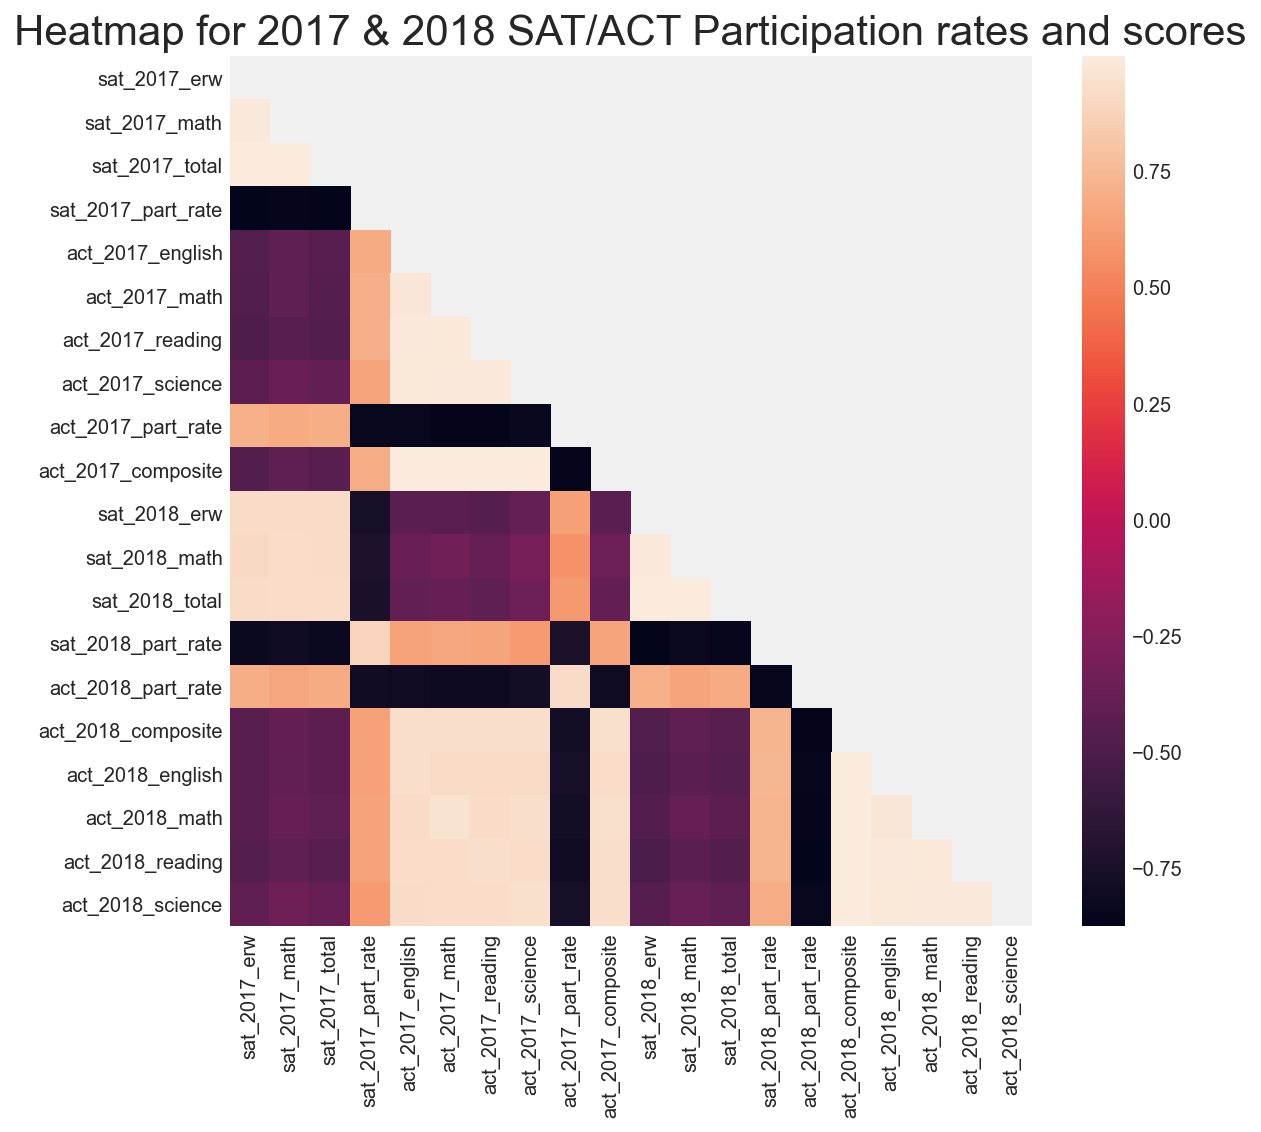

In [147]:
fig, ax = plt.subplots(figsize=(8,8))
final_corr = final.corr();

mask = np.zeros_like(final_corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(final_corr, mask=mask, annot=False);
ax.set_title('Heatmap for 2017 & 2018 SAT/ACT Participation rates and scores', fontsize=21, y=1.01);

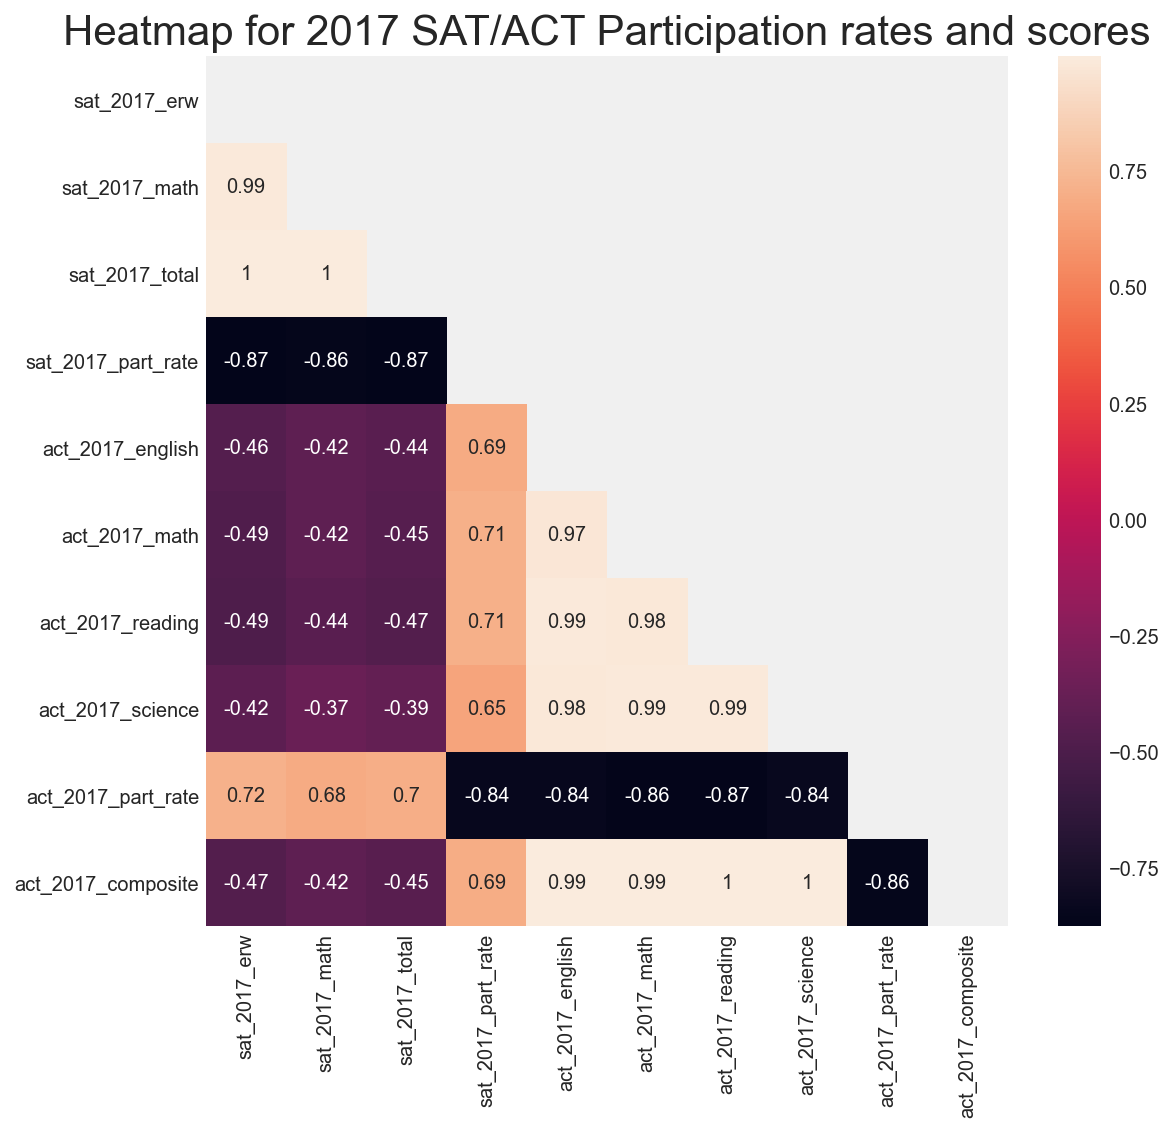

In [148]:
fig, ax = plt.subplots(figsize=(8,8))
combined_2017_corr = combined_2017.corr();

mask = np.zeros_like(combined_2017_corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(combined_2017_corr, mask=mask, annot=True);
ax.set_title('Heatmap for 2017 SAT/ACT Participation rates and scores', fontsize=21, y=1.01);

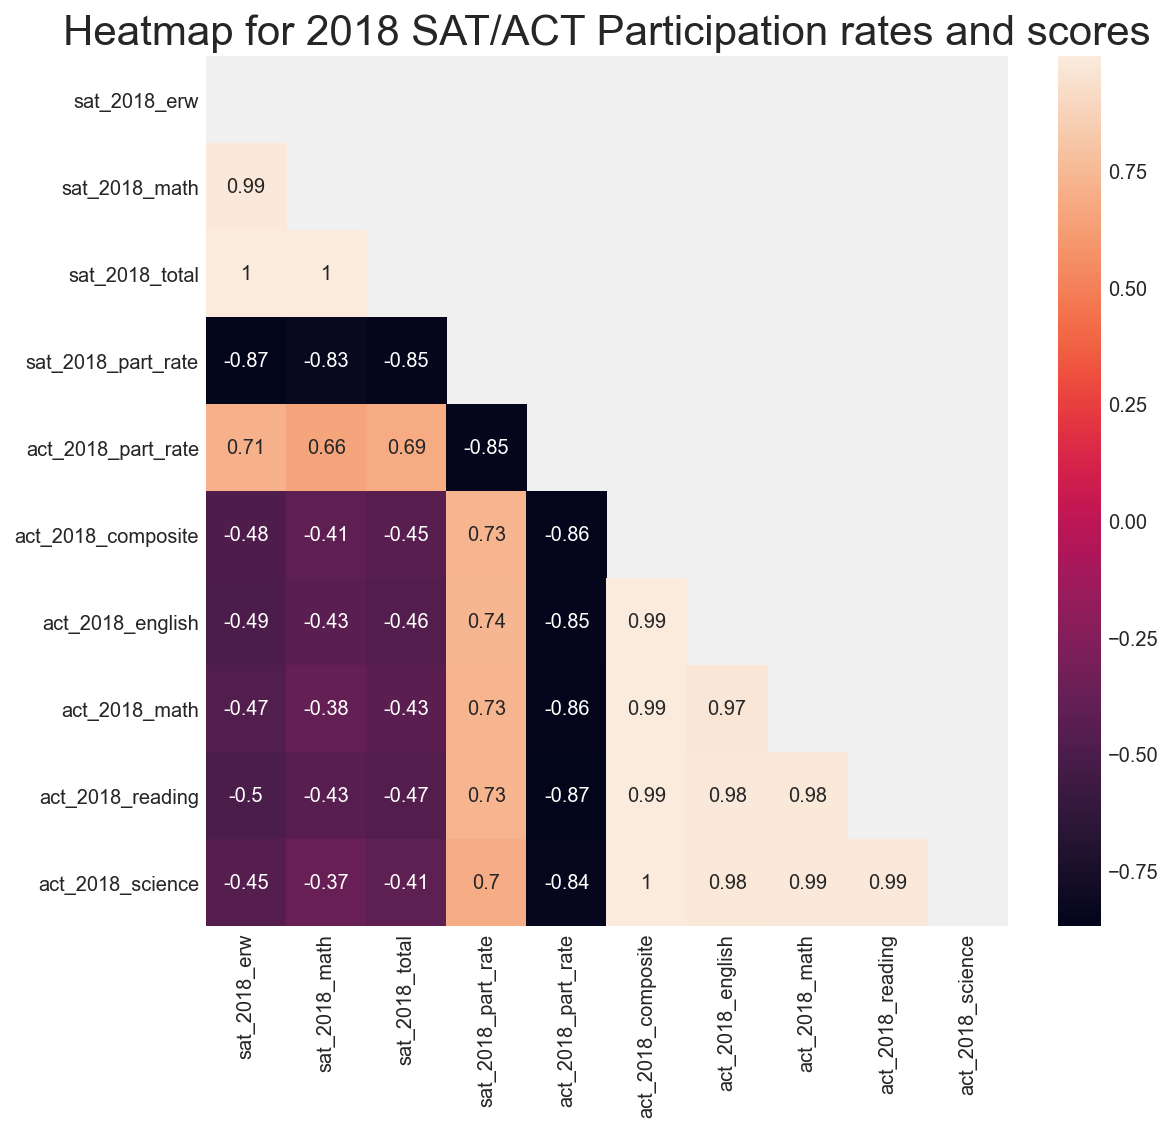

In [149]:
fig, ax = plt.subplots(figsize=(8,8))
combined_2018_corr = combined_2018.corr();

mask = np.zeros_like(combined_2018_corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(combined_2018_corr, mask=mask, annot=True);
ax.set_title('Heatmap for 2018 SAT/ACT Participation rates and scores', fontsize=21, y=1.01);

In [150]:
# pair plot for 2017 data
#sns.pairplot(combined_2017);

In [151]:
# pair plot for 2018 data
#sns.pairplot(combined_2018);

##### <font color='blue'>- For both 2017 & 2018, SAT participation rates show *NEGATIVE* correlations to its total and sub-tests scores,</font>
##### <font color='blue'>- SAT participation rates also show NEGATIVE correlation to ACT participation rates</font>
##### <font color='blue'>- SAT participation rates show POSITIVE correlation to ACT composite and sub-tests scores</font>

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [152]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(18,9)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column], bins=15) # feel free to add more settings
        ax[i].set_title(list_of_titles[i], fontsize=21, y=1.01)
        ax[i].set_xlabel(list_of_xlabels[i], fontsize=21, y=1.01)
        ax[i].set_ylabel('Frequency', fontsize=21)

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

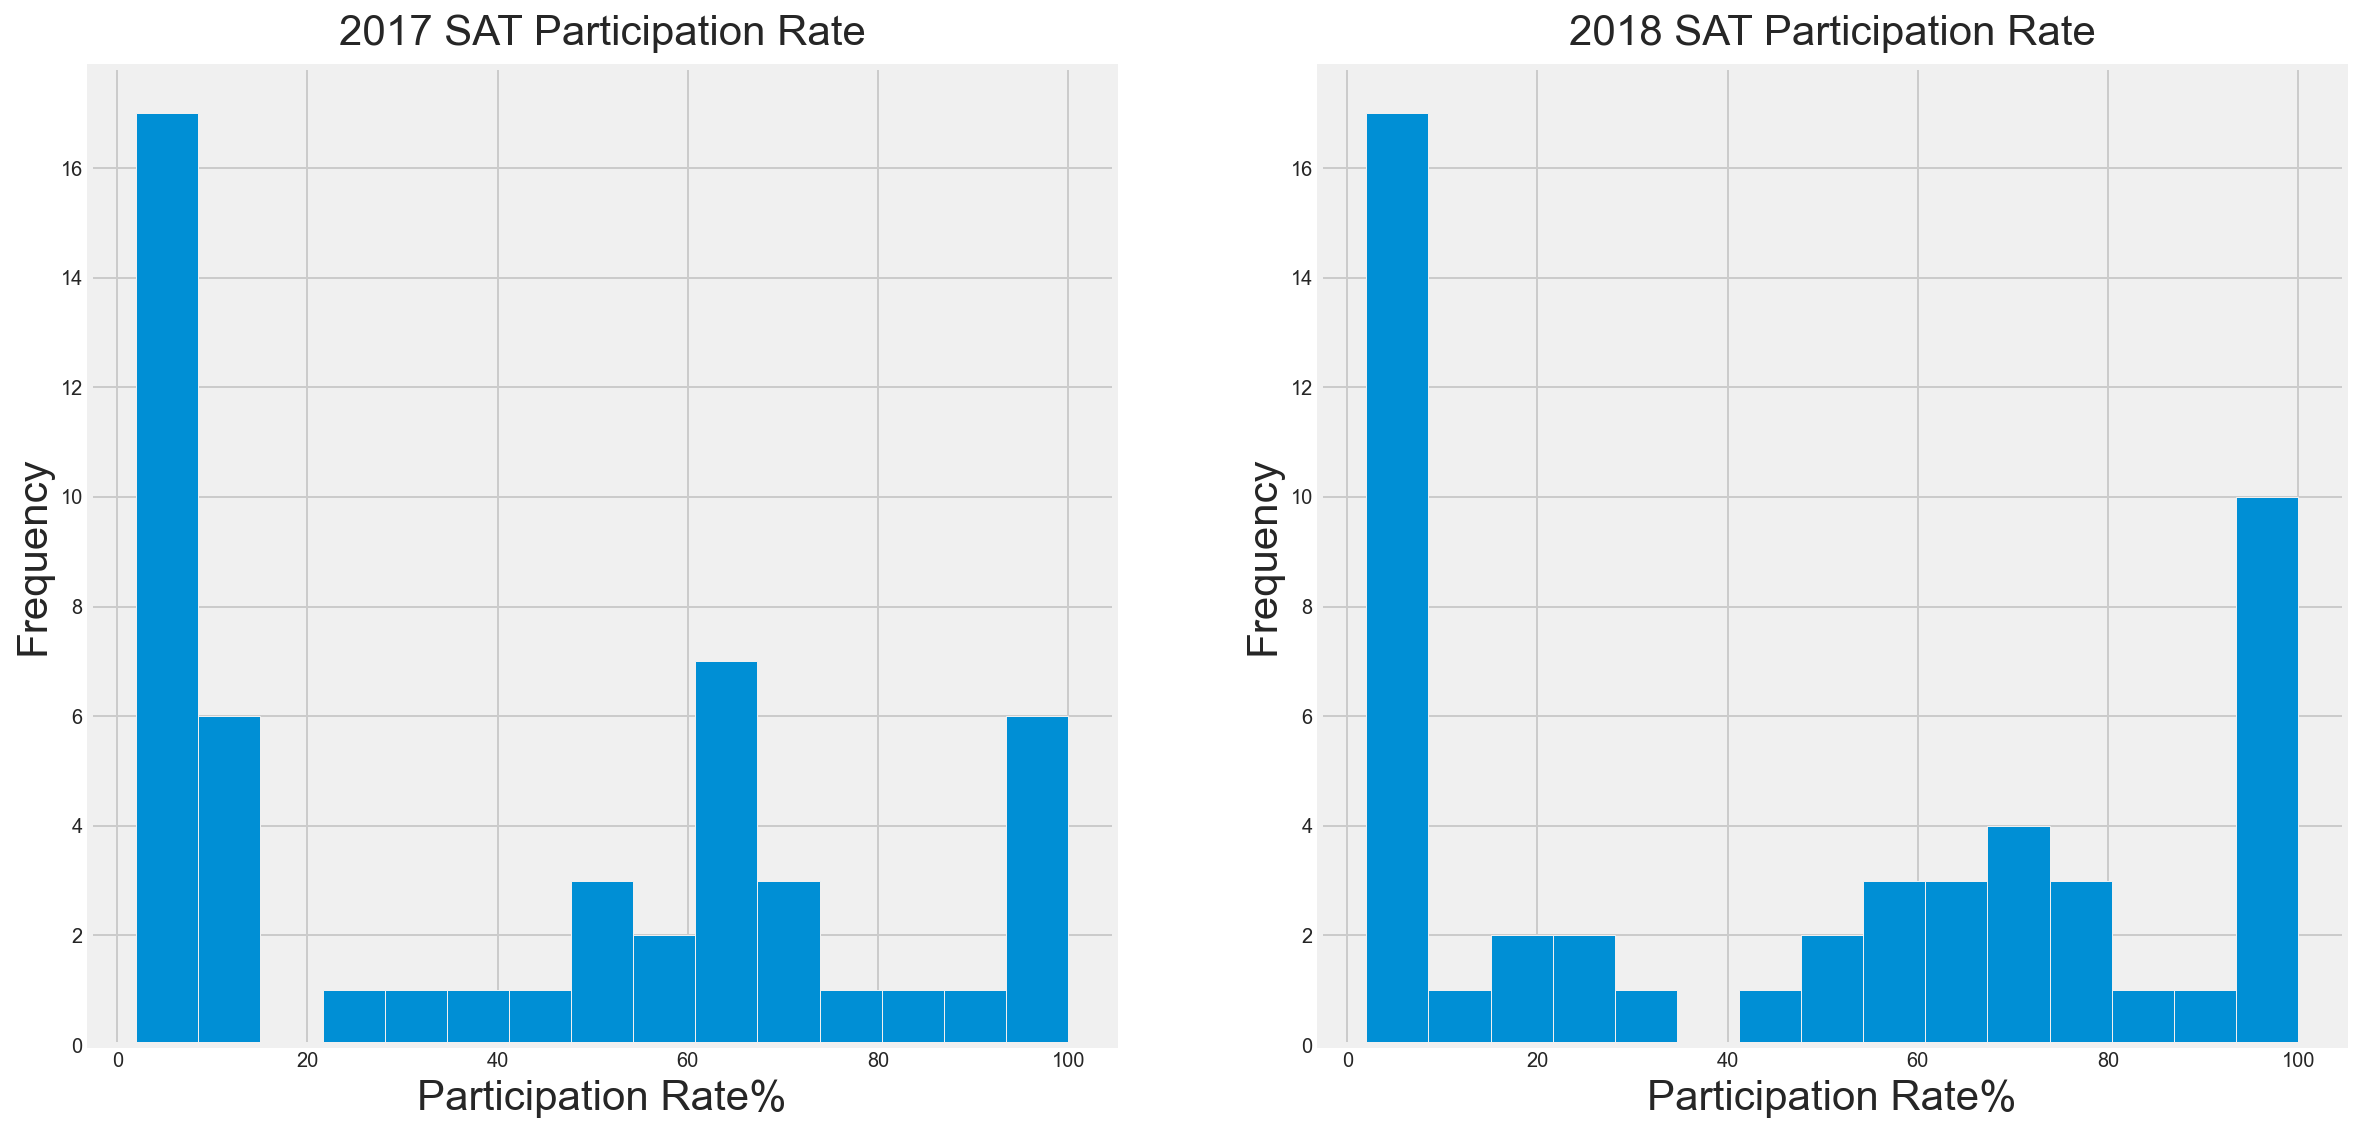

In [153]:
subplot_histograms(final, 
                   ["sat_2017_part_rate", "sat_2018_part_rate"], 
                   ["2017 SAT Participation Rate", "2018 SAT Participation Rate"], 
                   ["Participation Rate%", "Participation Rate%"])

Bimodal, multi-modal distribution skewed to extremes of data range

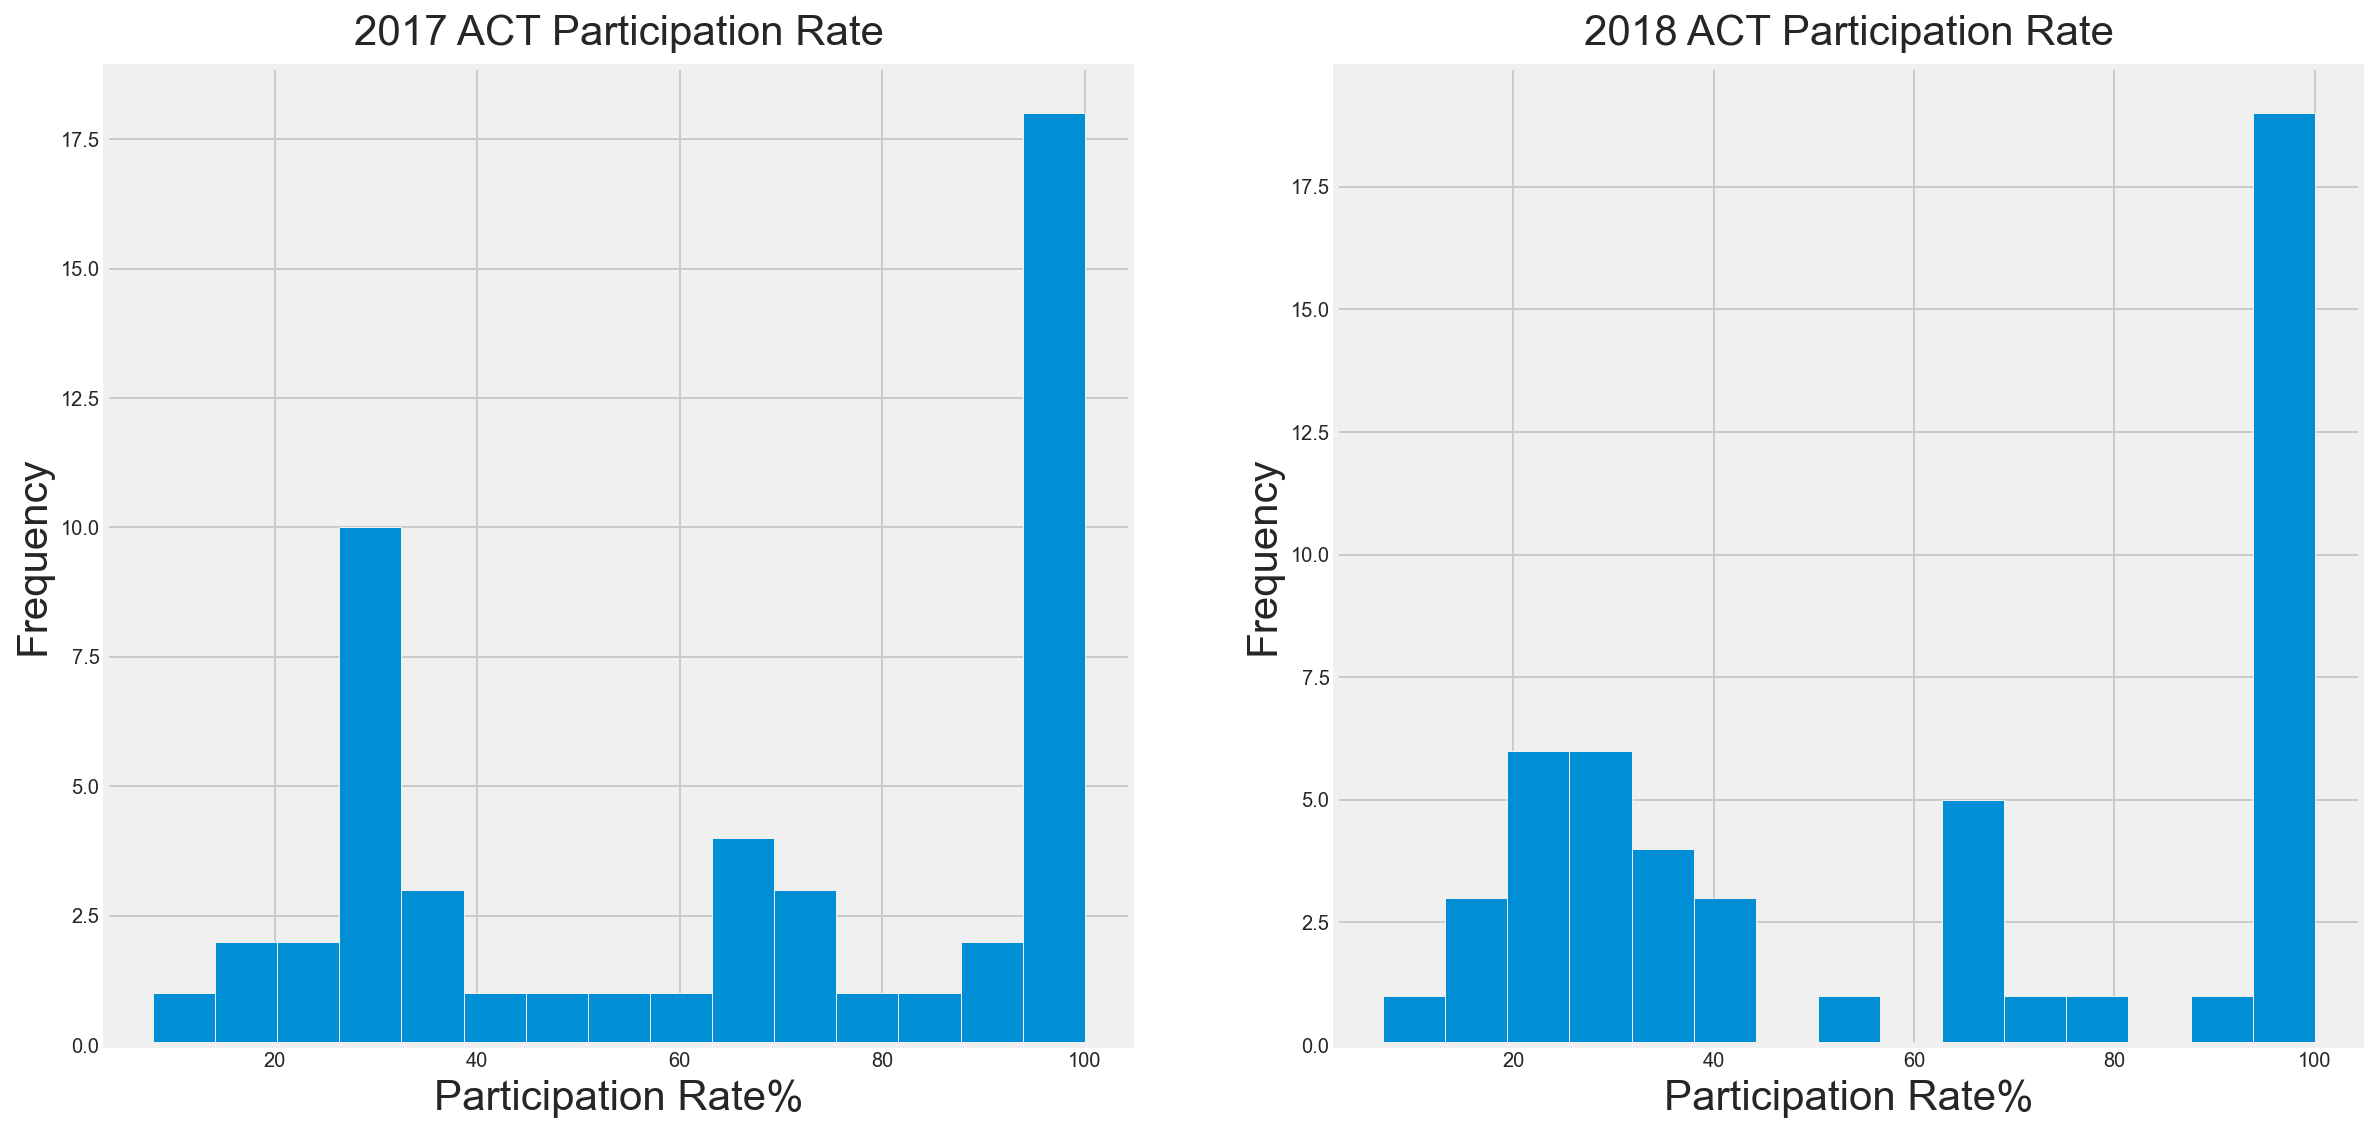

In [154]:
subplot_histograms(final, 
                   ["act_2017_part_rate", "act_2018_part_rate"], 
                   ["2017 ACT Participation Rate", "2018 ACT Participation Rate"], 
                   ["Participation Rate%", "Participation Rate%"])

Bimodal, multi-modal distribution skewed to extremes of data range

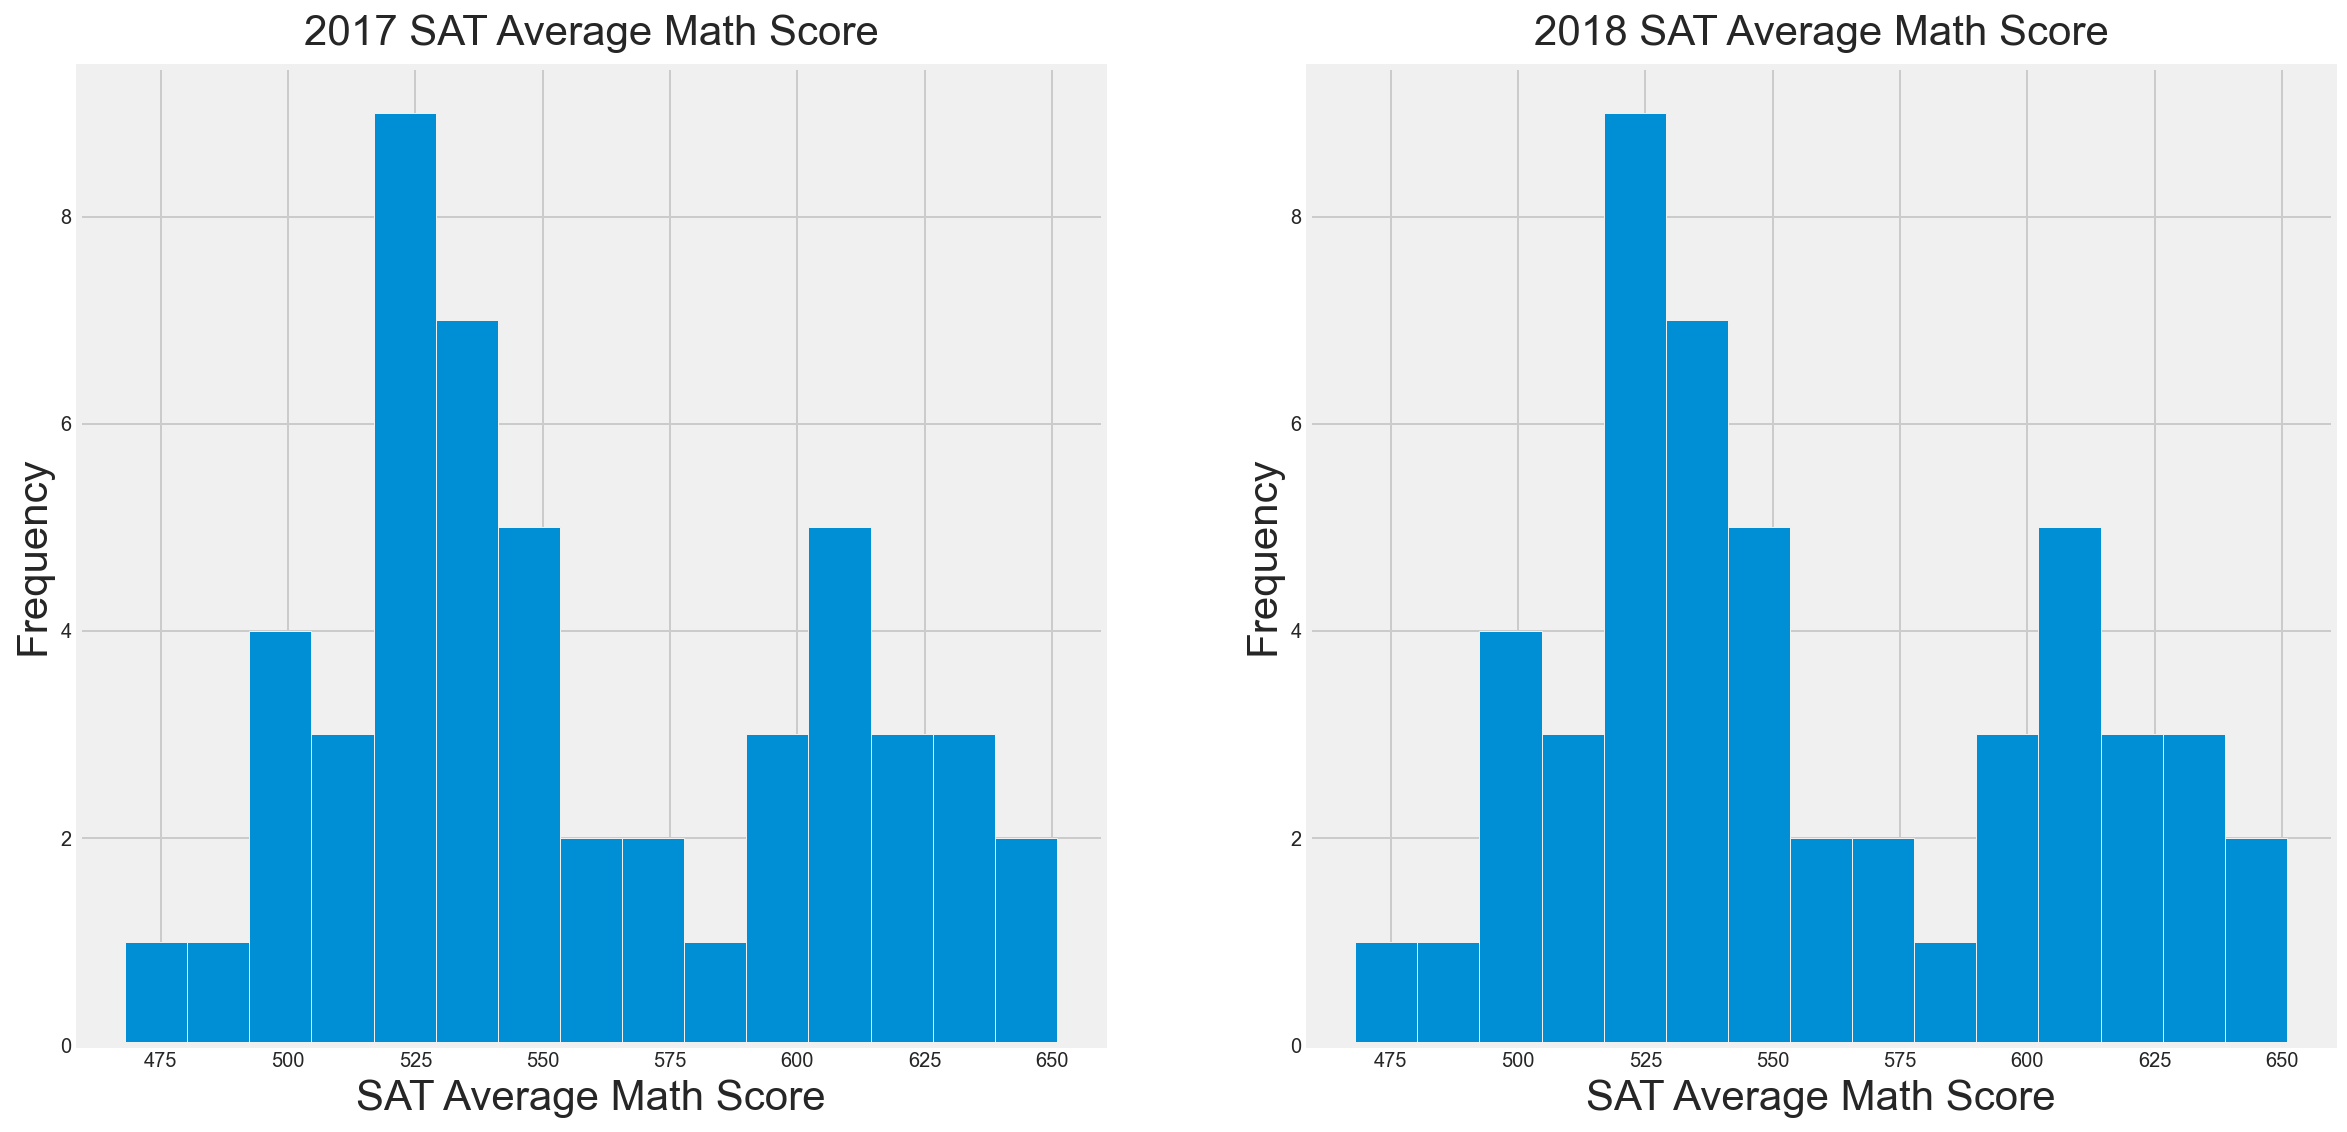

In [155]:
subplot_histograms(final, 
                   ["sat_2017_math", "sat_2017_math"], 
                   ["2017 SAT Average Math Score", "2018 SAT Average Math Score"], 
                   ["SAT Average Math Score", "SAT Average Math Score"])

Multi modal with central tendency

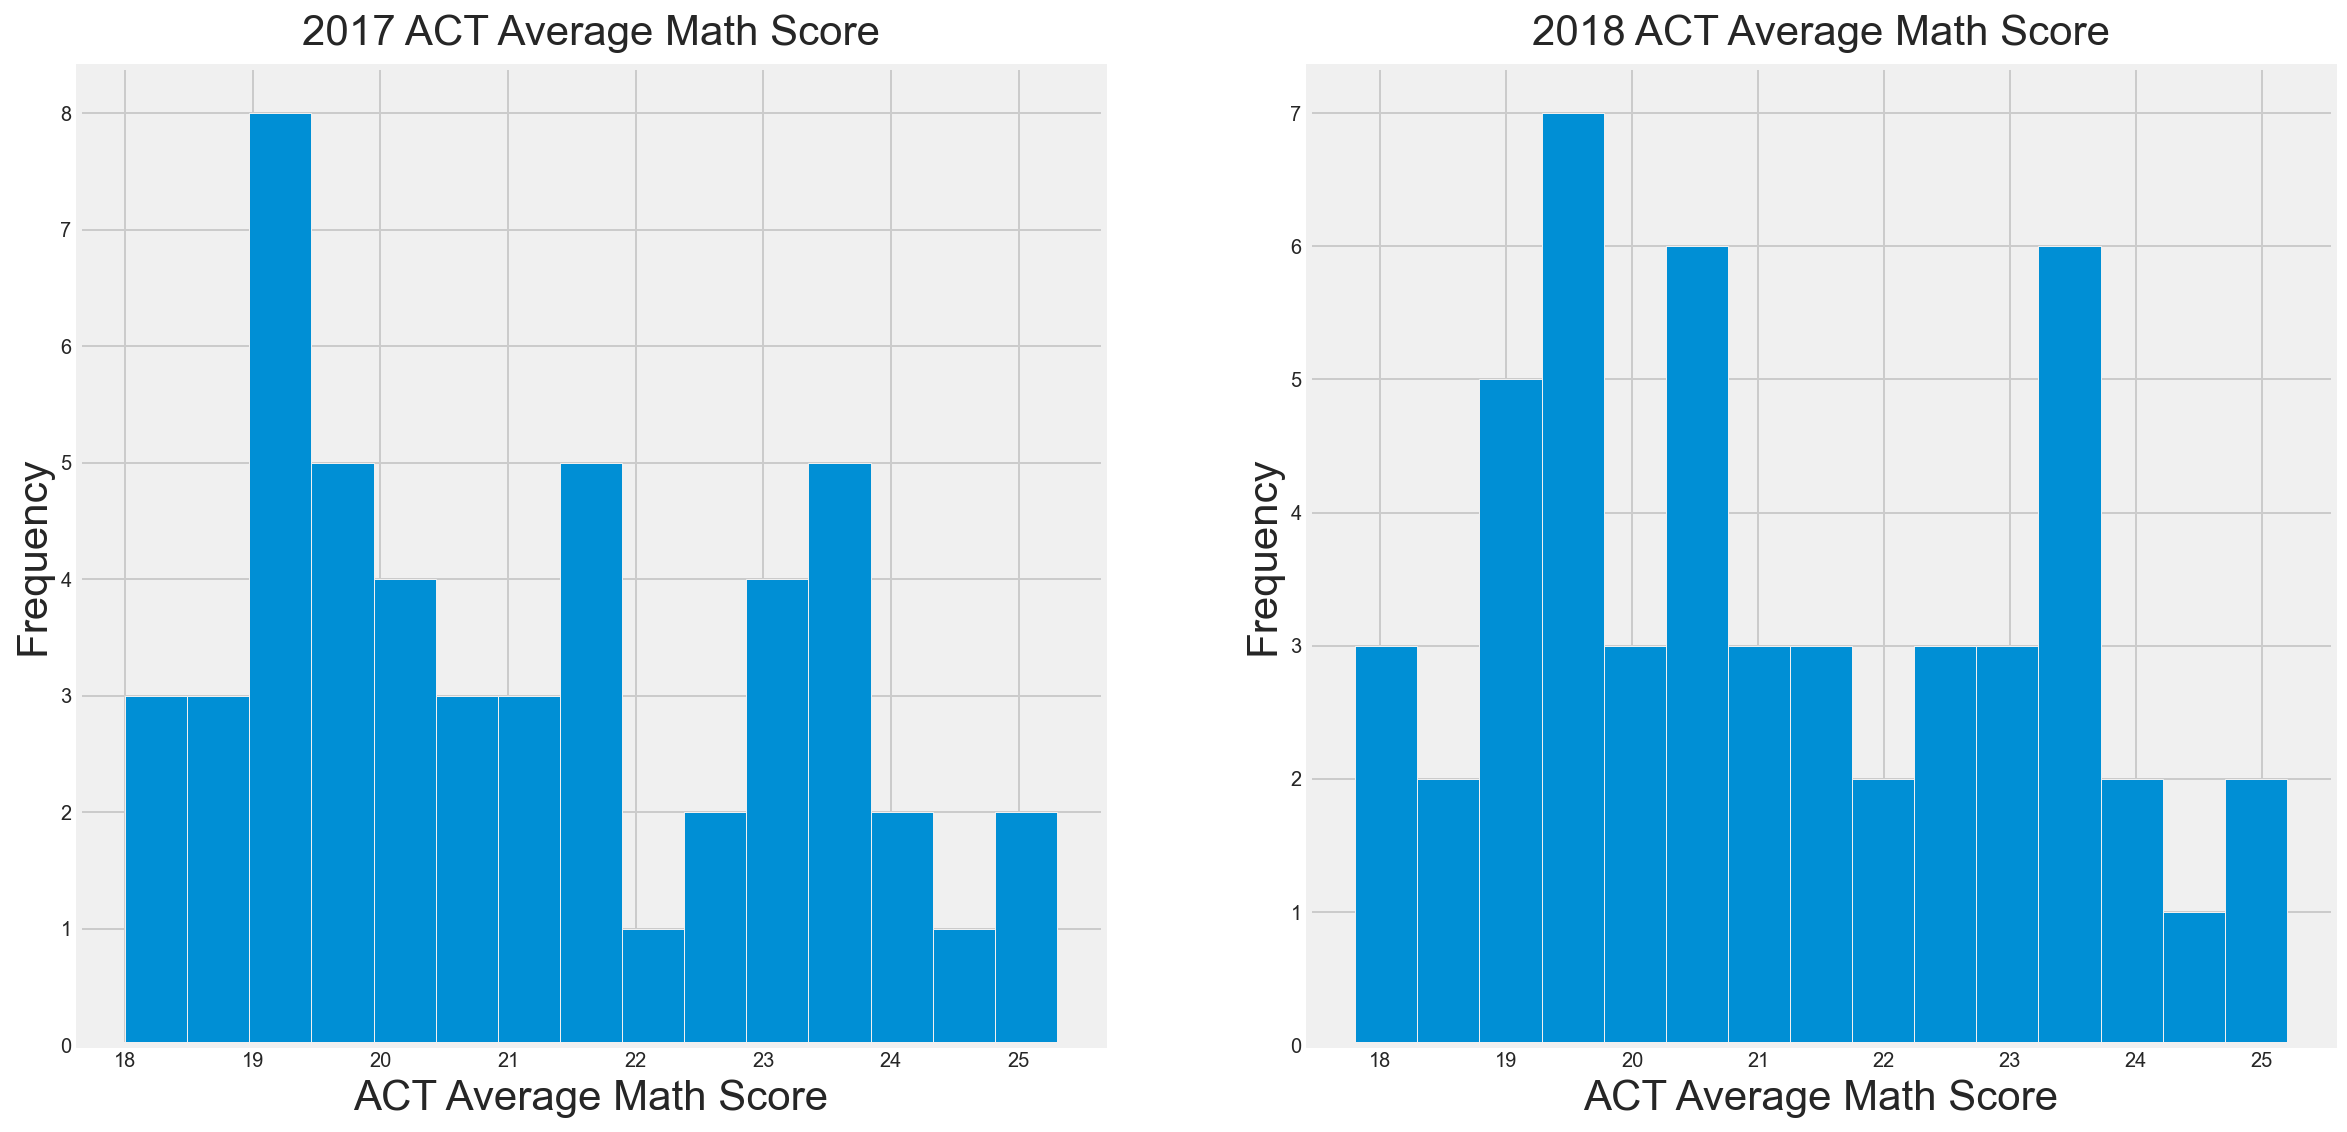

In [156]:
subplot_histograms(final, 
                   ["act_2017_math", "act_2018_math"], 
                   ["2017 ACT Average Math Score", "2018 ACT Average Math Score"], 
                   ["ACT Average Math Score", "ACT Average Math Score"])

Multi modal with central tendency

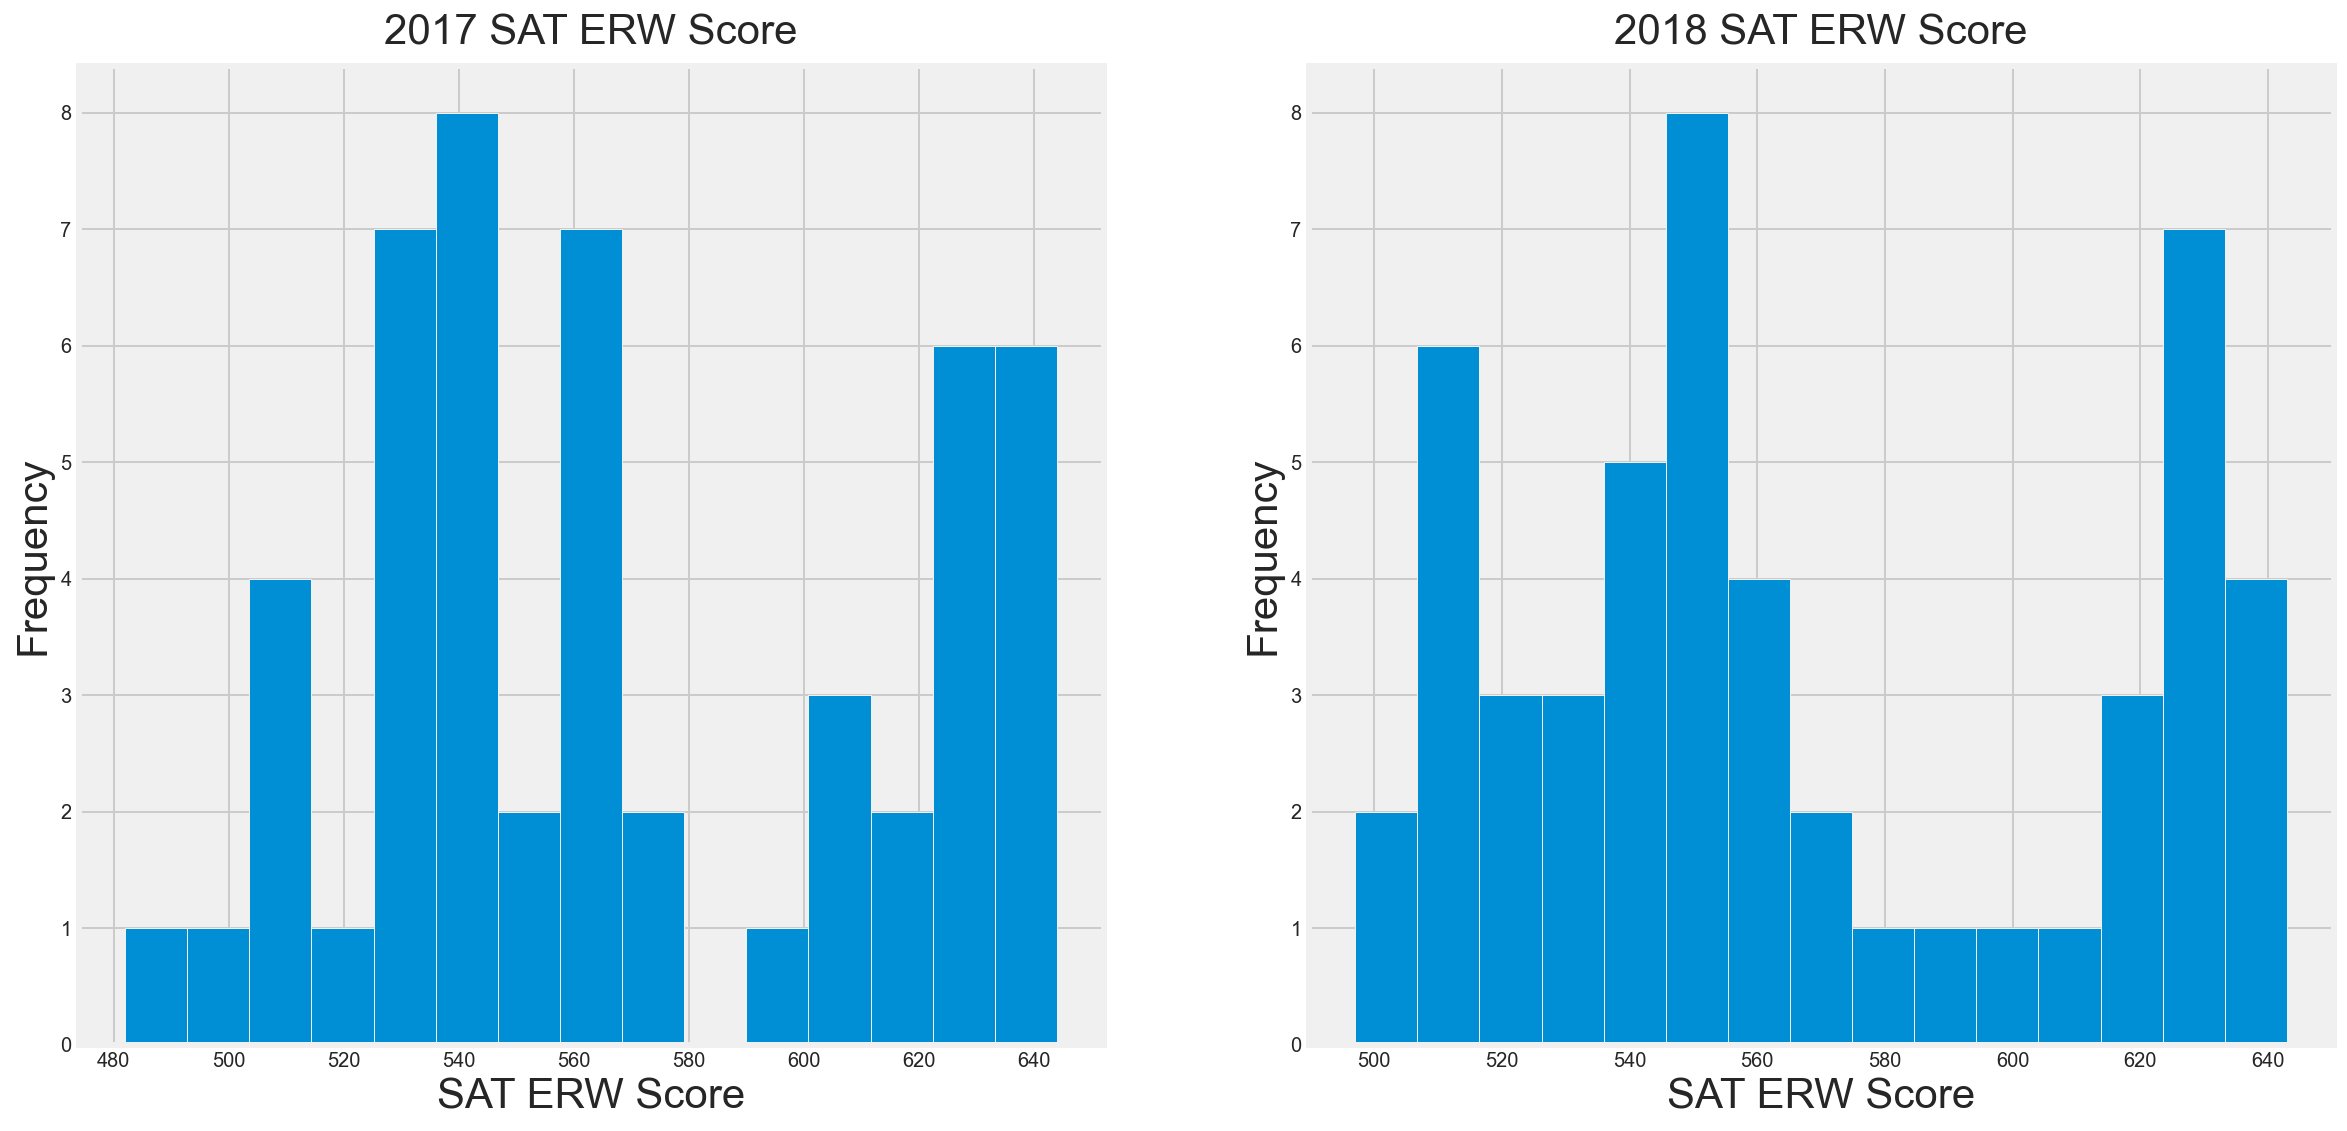

In [157]:
subplot_histograms(final, 
                   ["sat_2017_erw", "sat_2018_erw"], 
                   ["2017 SAT ERW Score", "2018 SAT ERW Score"], 
                   ["SAT ERW Score", "SAT ERW Score"])

Multi modal with central tendency

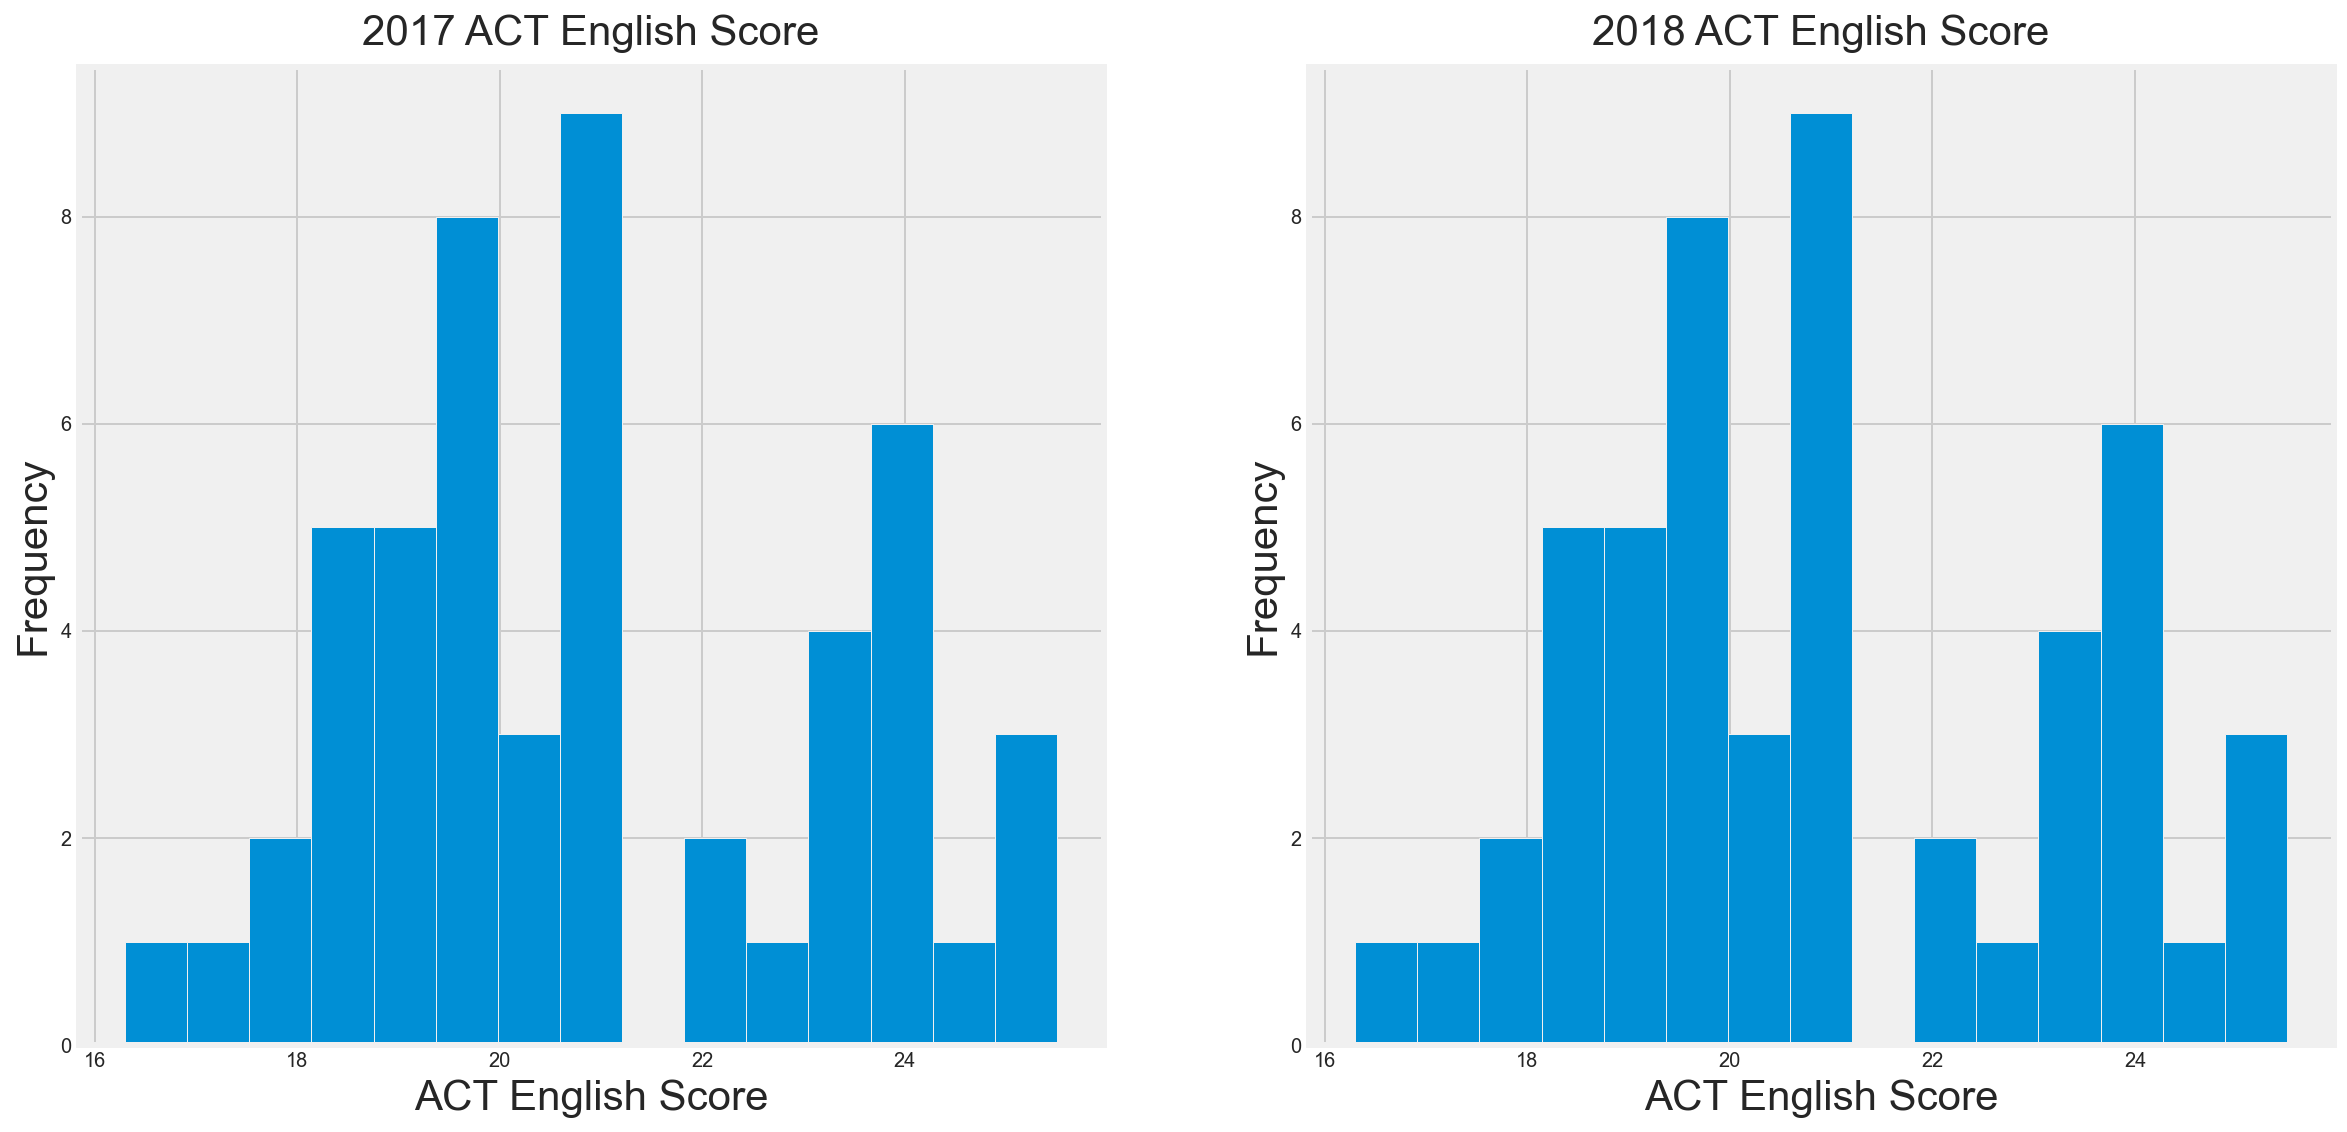

In [158]:
subplot_histograms(final, 
                   ["act_2017_english", "act_2017_english"], 
                   ["2017 ACT English Score", "2018 ACT English Score"], 
                   ["ACT English Score", "ACT English Score"])

Multi modal with central tendency

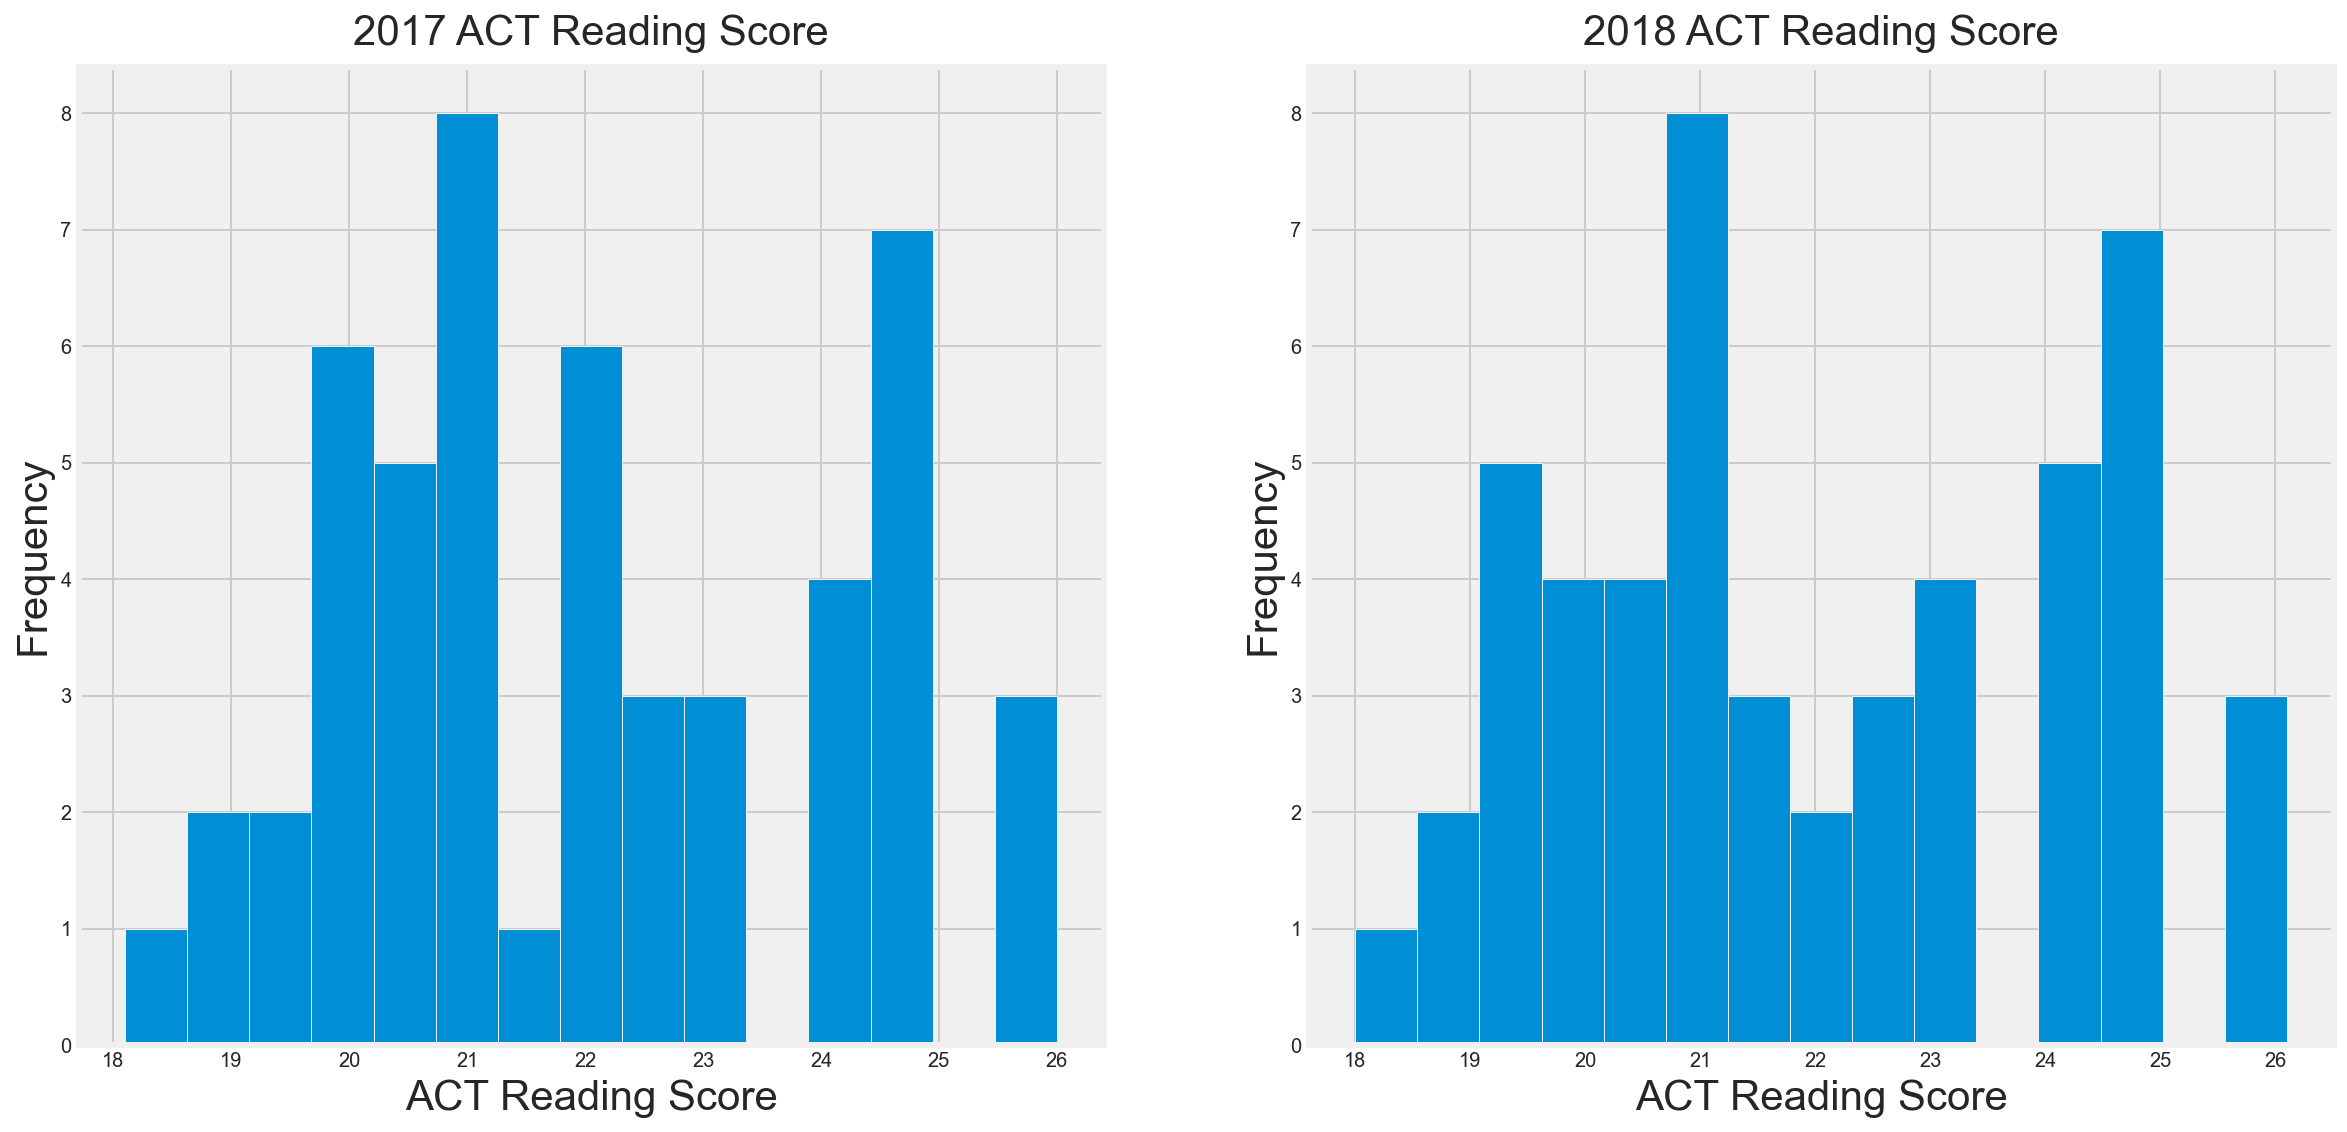

In [159]:
subplot_histograms(final, 
                   ["act_2017_reading", "act_2018_reading"], 
                   ["2017 ACT Reading Score", "2018 ACT Reading Score"], 
                   ["ACT Reading Score", "ACT Reading Score"])

Multi modal with central tendency

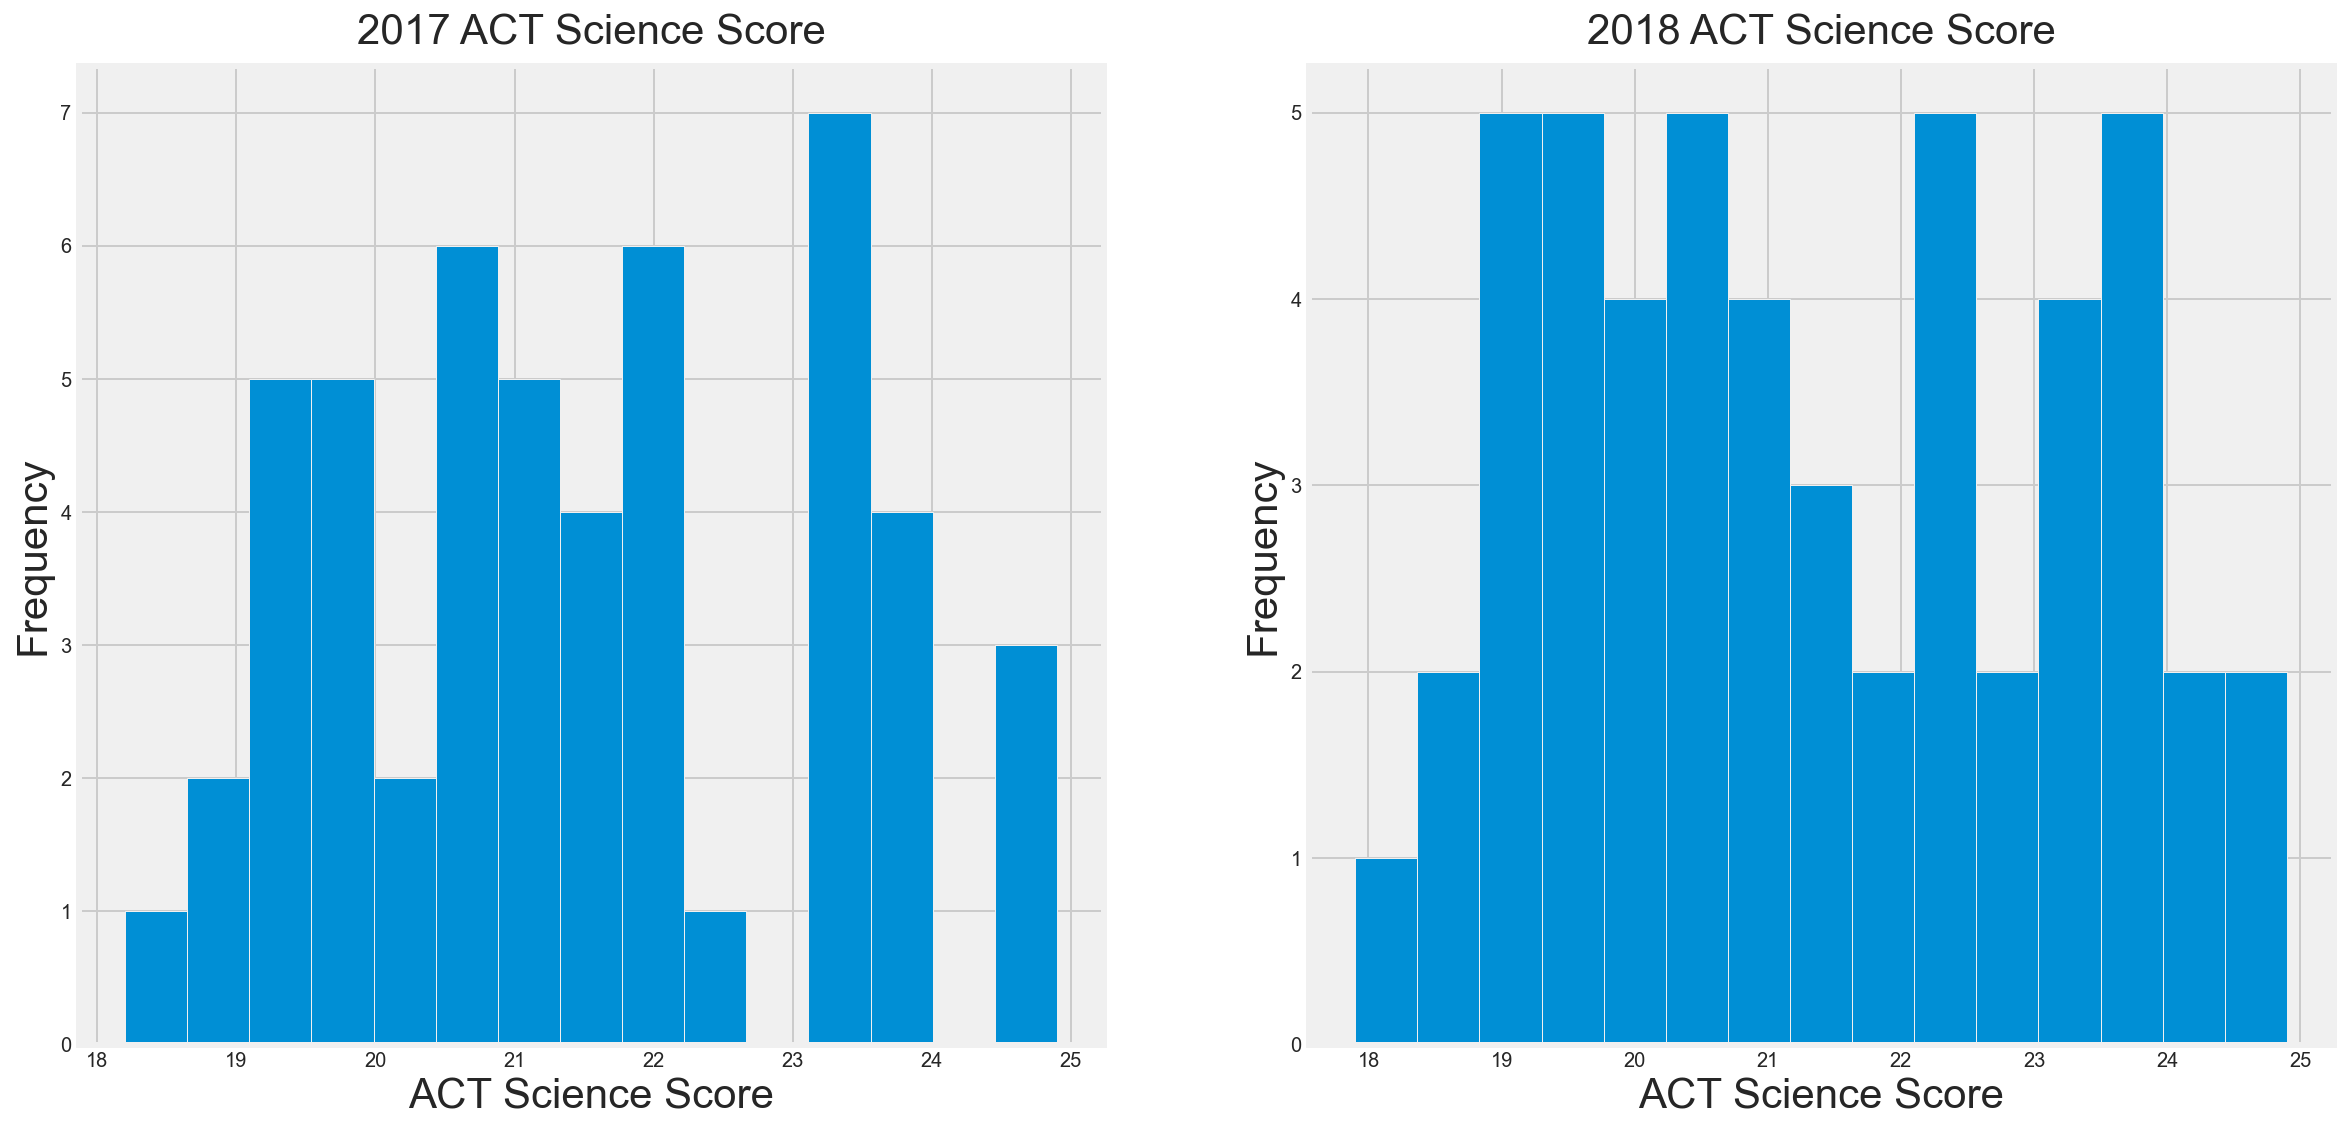

In [160]:
subplot_histograms(final, 
                   ["act_2017_science", "act_2018_science"], 
                   ["2017 ACT Science Score", "2018 ACT Science Score"], 
                   ["ACT Science Score", "ACT Science Score"])

Multi modal with central tendency

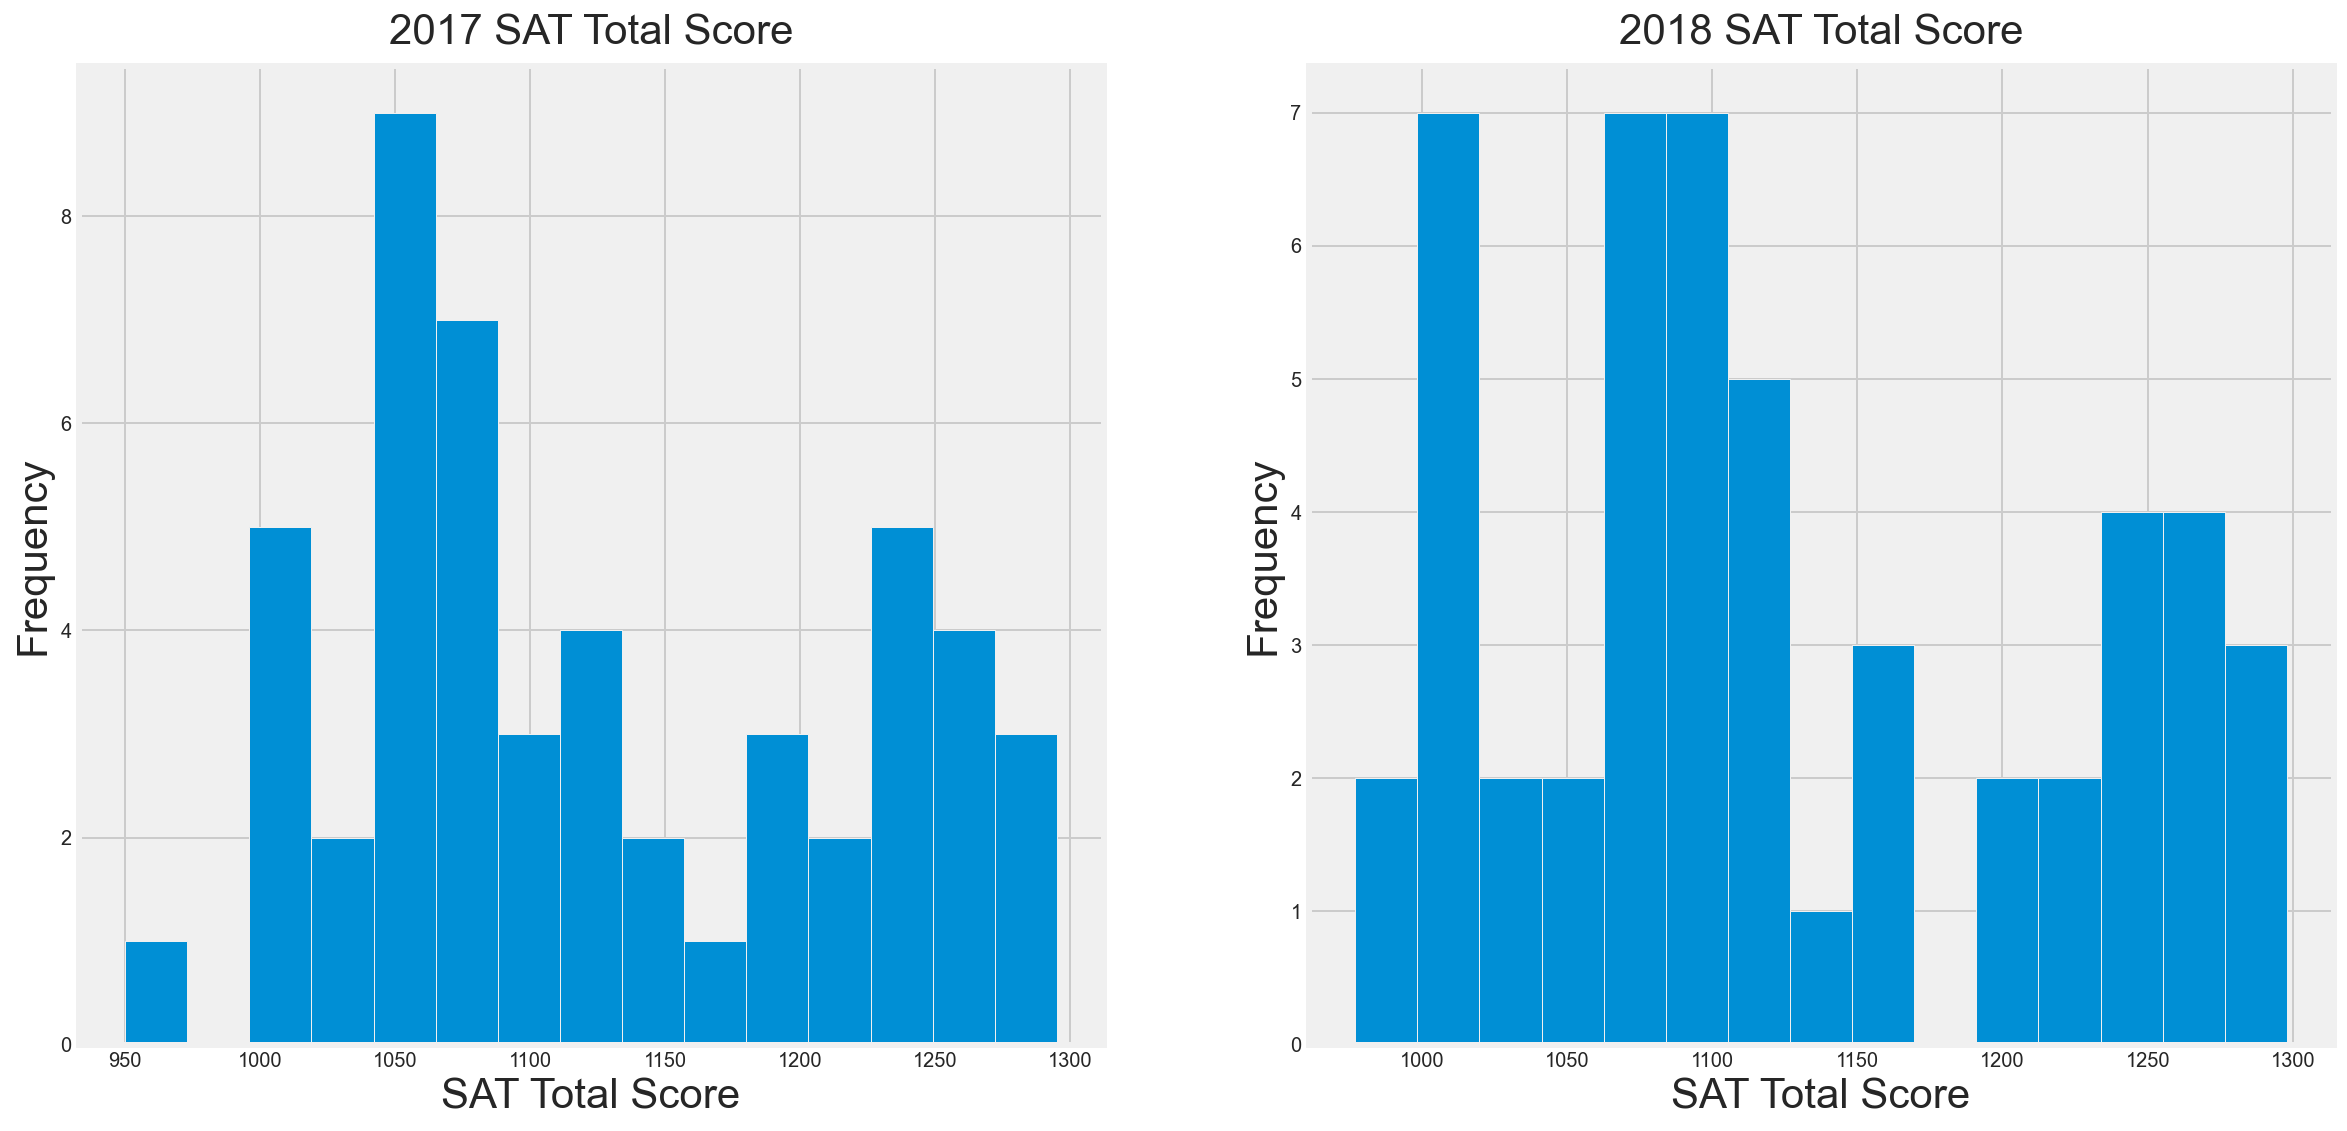

In [161]:
subplot_histograms(final, 
                   ["sat_2017_total", "sat_2018_total"], 
                   ["2017 SAT Total Score", "2018 SAT Total Score"], 
                   ["SAT Total Score", "SAT Total Score"])

Multi modal with central tendency

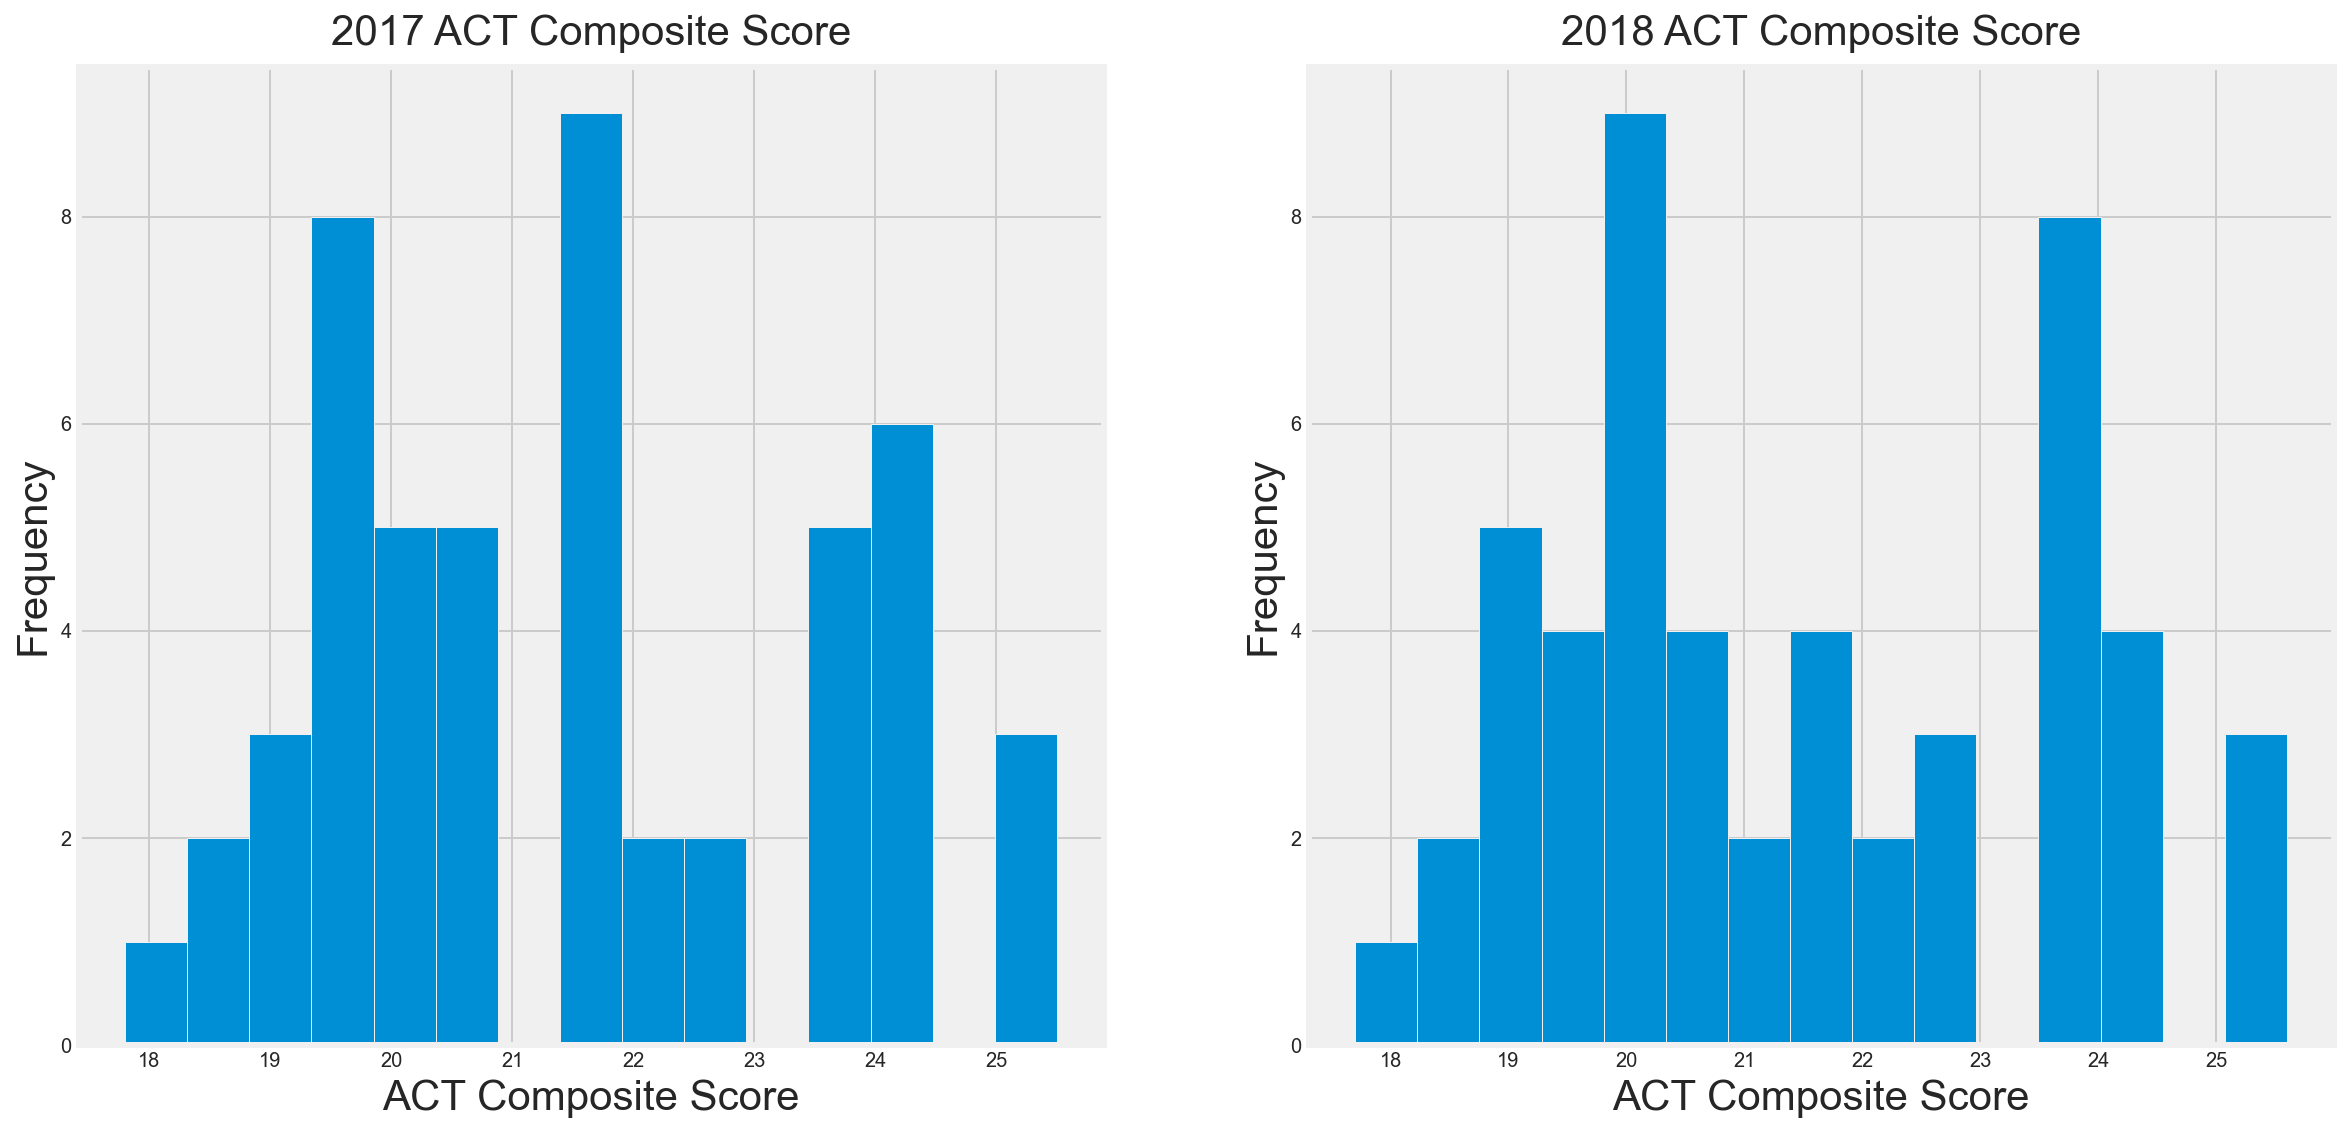

In [162]:
subplot_histograms(final, 
                   ["act_2017_composite", "act_2018_composite"], 
                   ["2017 ACT Composite Score", "2018 ACT Composite Score"], 
                   ["ACT Composite Score", "ACT Composite Score"])

Multi modal with central tendency

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


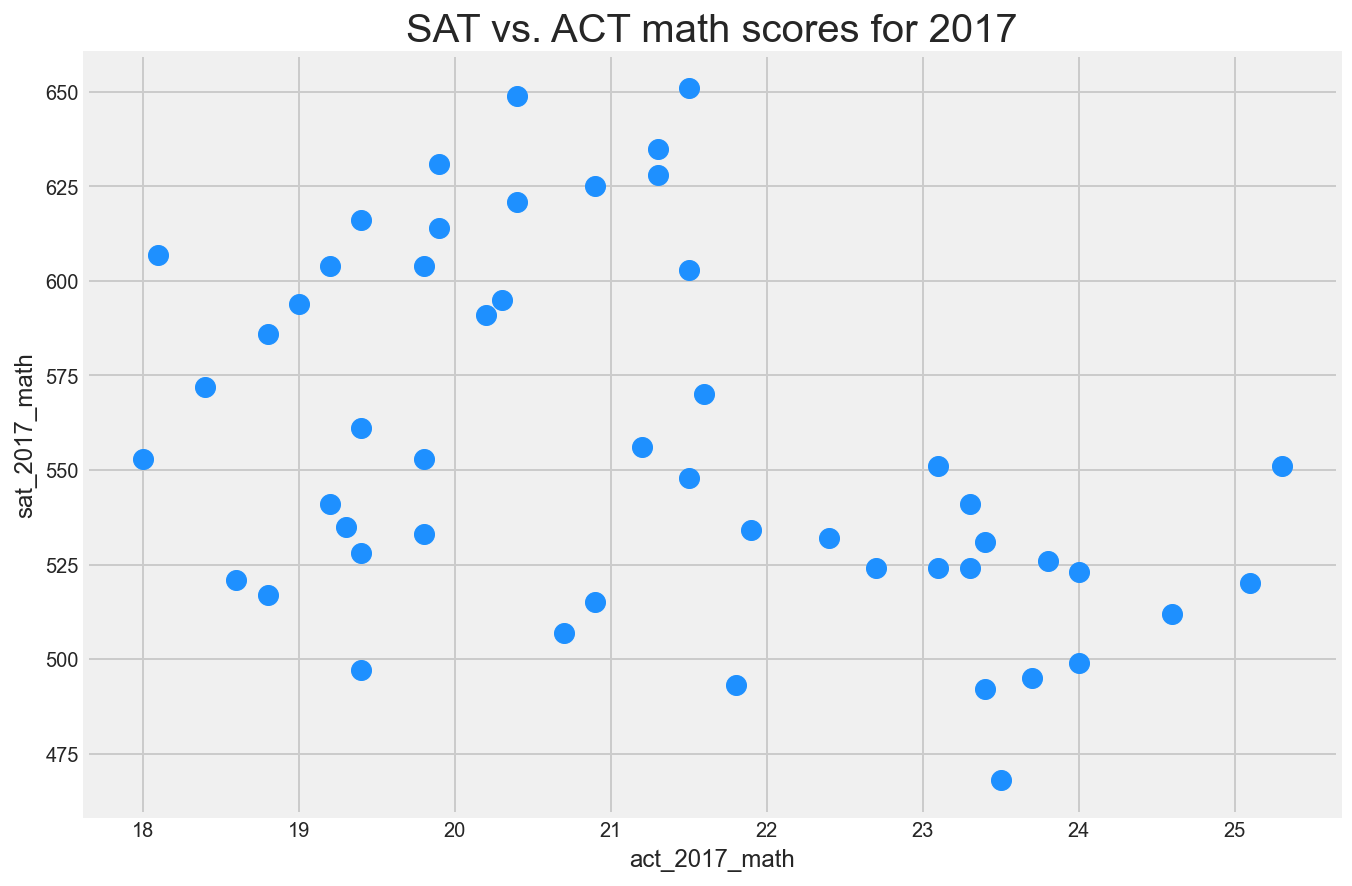

In [163]:
final.plot(x='act_2017_math', y='sat_2017_math', kind='scatter', 
           color='dodgerblue', figsize=(10,7), s=100);
plt.title('SAT vs. ACT math scores for 2017', fontsize=20);

Negative correlation

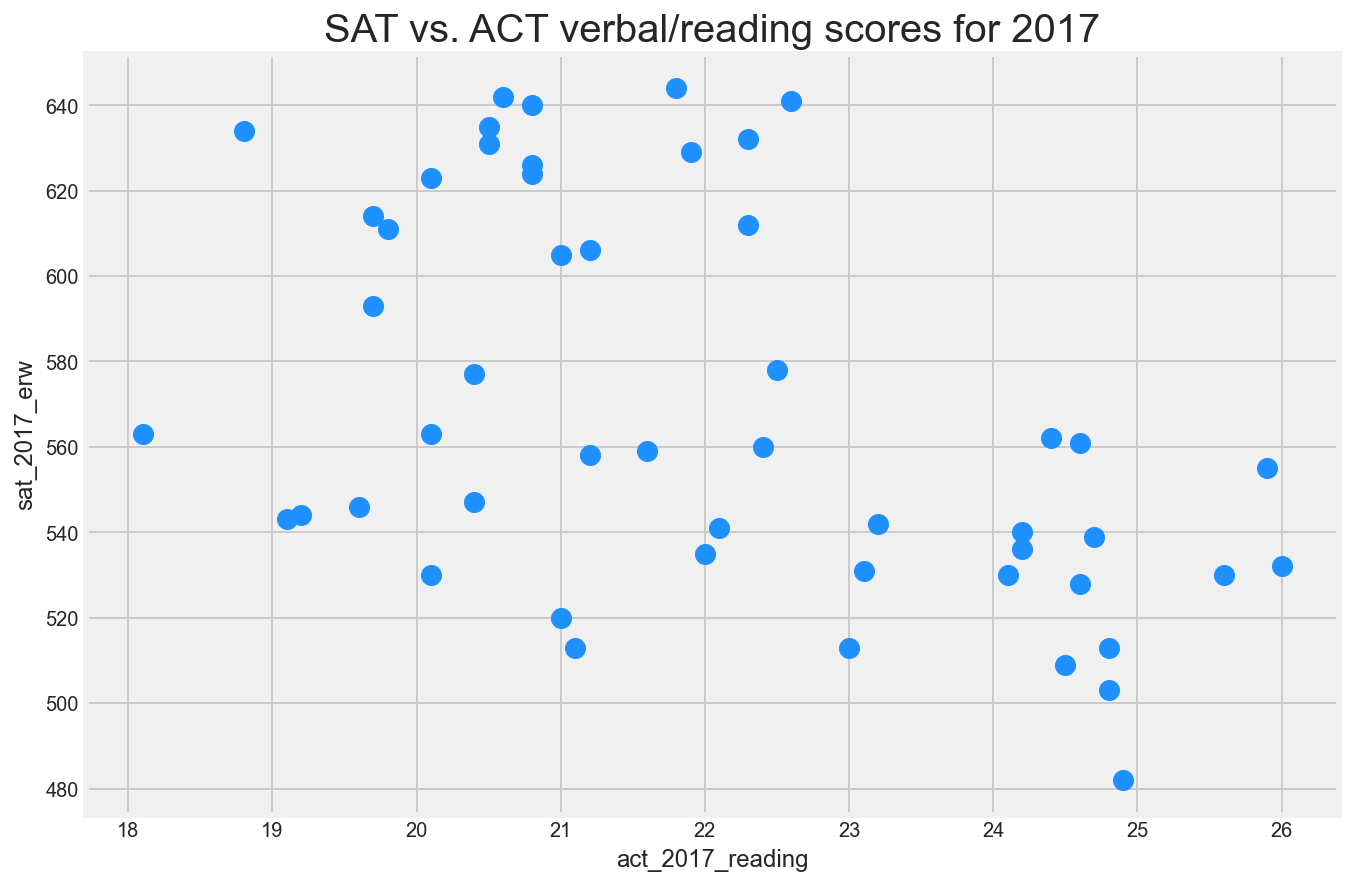

In [164]:
final.plot(x='act_2017_reading', y='sat_2017_erw', kind='scatter', 
           color='dodgerblue', figsize=(10,7), s=100);
plt.title('SAT vs. ACT verbal/reading scores for 2017', fontsize=20);

Negative correlation

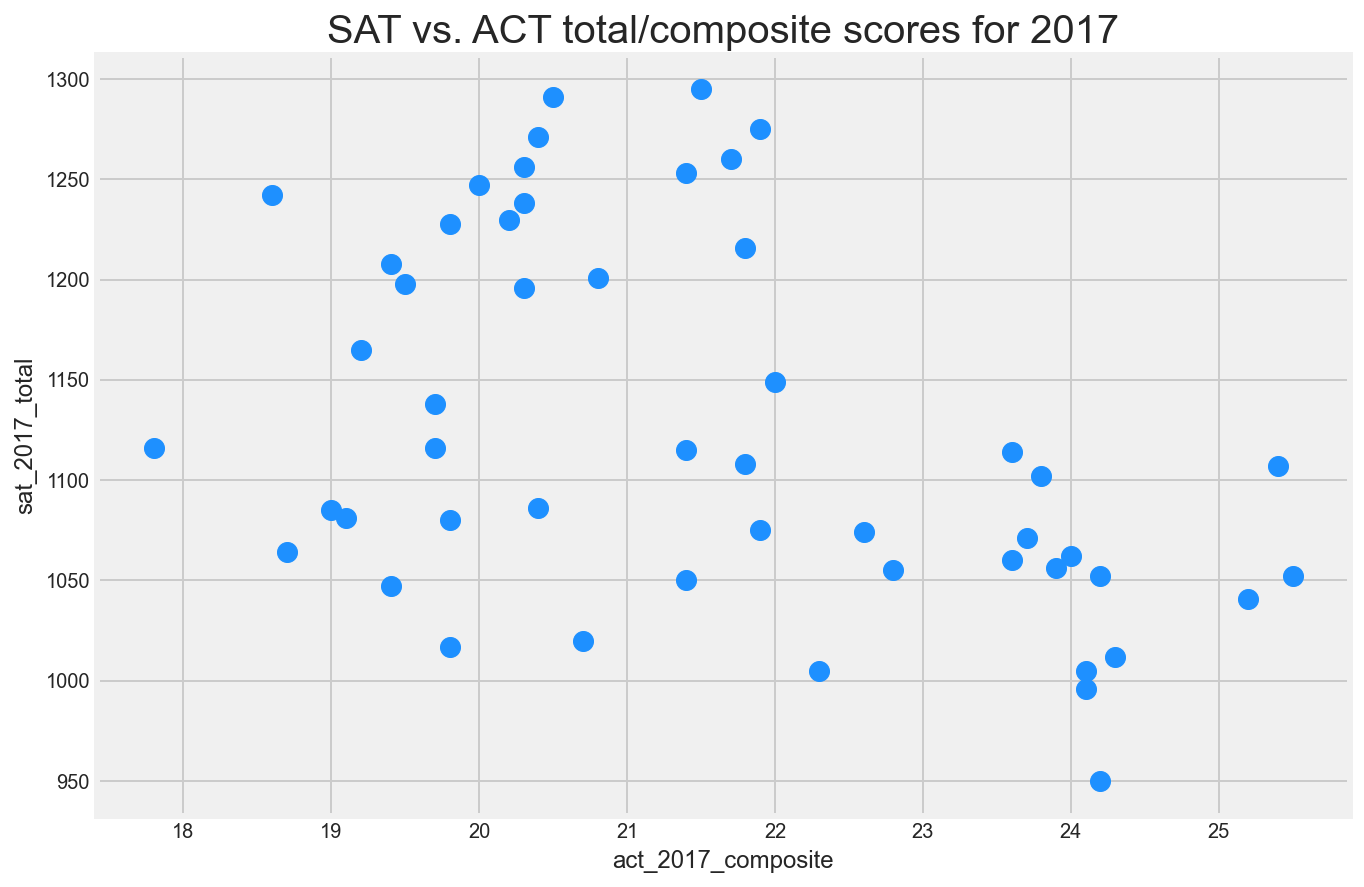

In [165]:
final.plot(x='act_2017_composite', y='sat_2017_total', kind='scatter', 
           color='dodgerblue', figsize=(10,7), s=100);
plt.title('SAT vs. ACT total/composite scores for 2017', fontsize=20);

Negative correlation

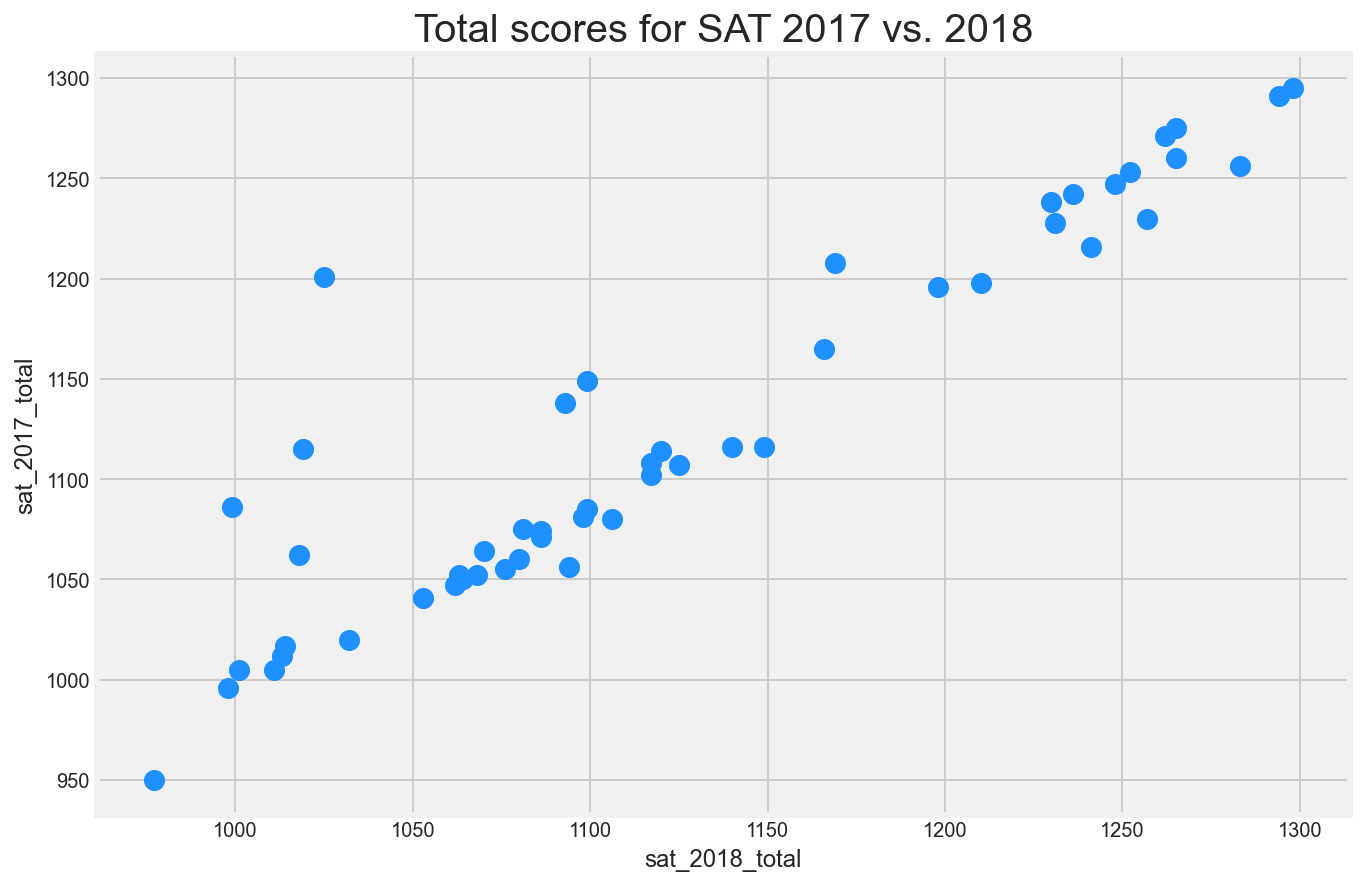

In [166]:
final.plot(x='sat_2018_total', y='sat_2017_total', kind='scatter', 
           color='dodgerblue', figsize=(10,7), s=100);
plt.title('Total scores for SAT 2017 vs. 2018', fontsize=20);

Linearly correlated. Outliers above the slope show states which performed much better in 2017 as compared to 2018

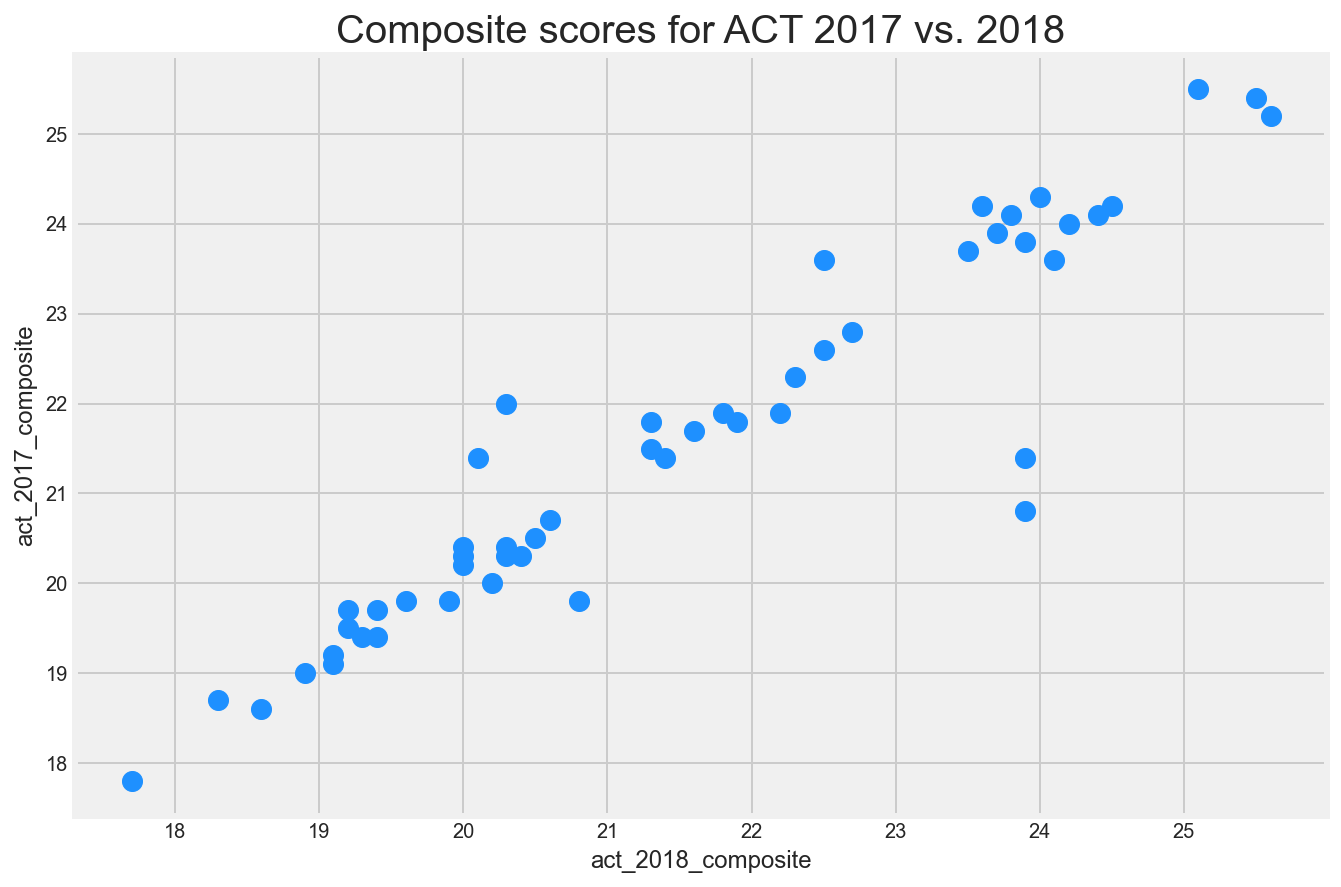

In [167]:
final.plot(x='act_2018_composite', y='act_2017_composite', kind='scatter', 
           color='dodgerblue', figsize=(10,7), s=100);
plt.title('Composite scores for ACT 2017 vs. 2018', fontsize=20);

Linearly correlated. Outliers below the slope show states which performed worst off in 2017 as compared to 2018

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

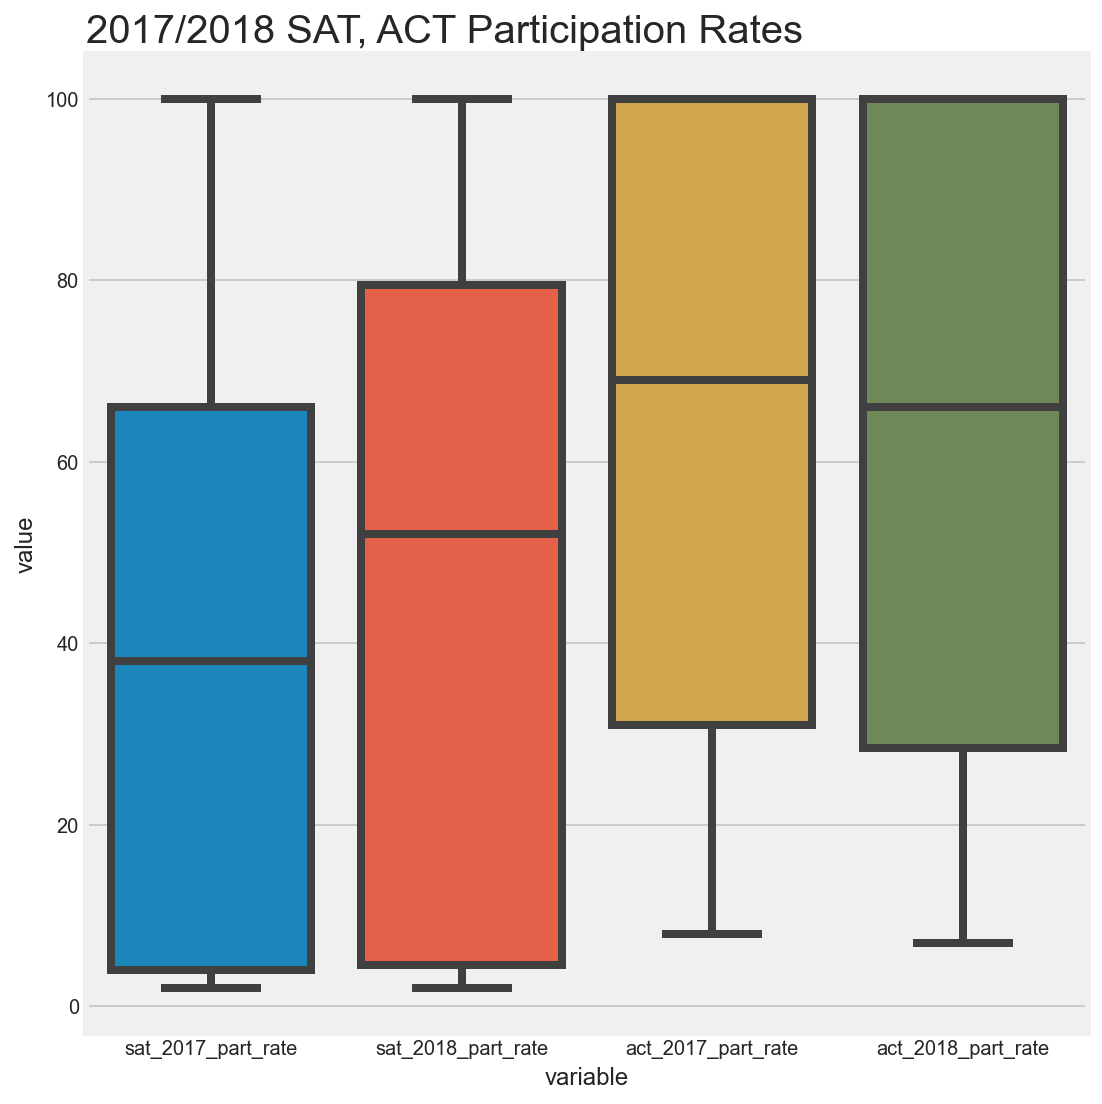

In [168]:
df = final[['sat_2017_part_rate','sat_2018_part_rate', 'act_2017_part_rate','act_2018_part_rate']]

plt.figure(figsize=(8,9))
sns.boxplot(x="variable", y="value", data=pd.melt(df))
plt.title("2017/2018 SAT, ACT Participation Rates", position = (0,1), ha = 'left', fontsize=20);

ACT partipation rate consistently higher than SAT
SAT saw improvement from 2017 to 2018
ACT saw drop from 2017 to 2018

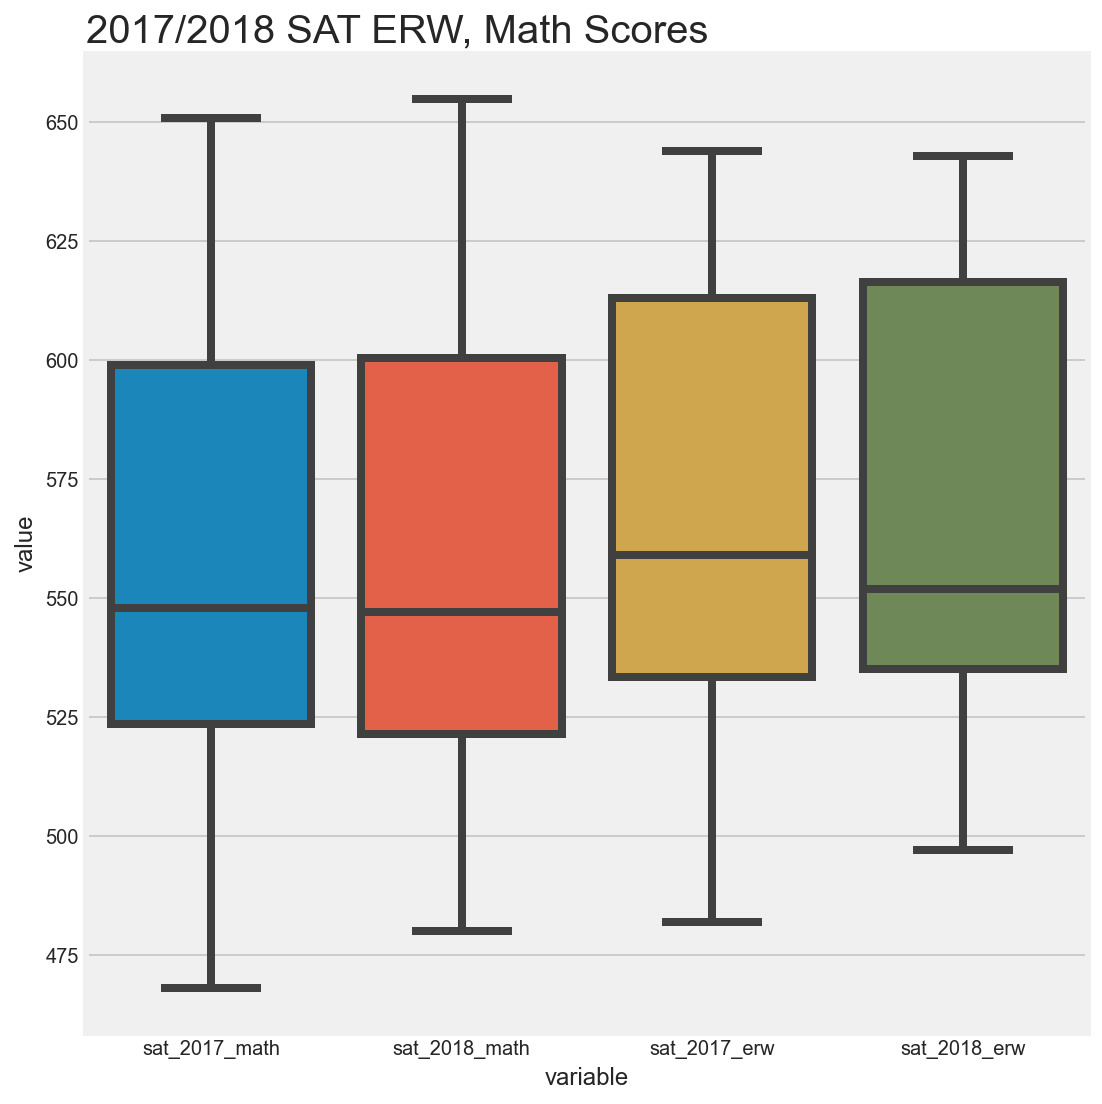

In [169]:
df = final[['sat_2017_math','sat_2018_math', 'sat_2017_erw','sat_2018_erw']]

plt.figure(figsize=(8,9))
sns.boxplot(x="variable", y="value", data=pd.melt(df))
plt.title("2017/2018 SAT ERW, Math Scores", position = (0,1), ha = 'left', fontsize=20);

No significant score changes from 2017 to 2018

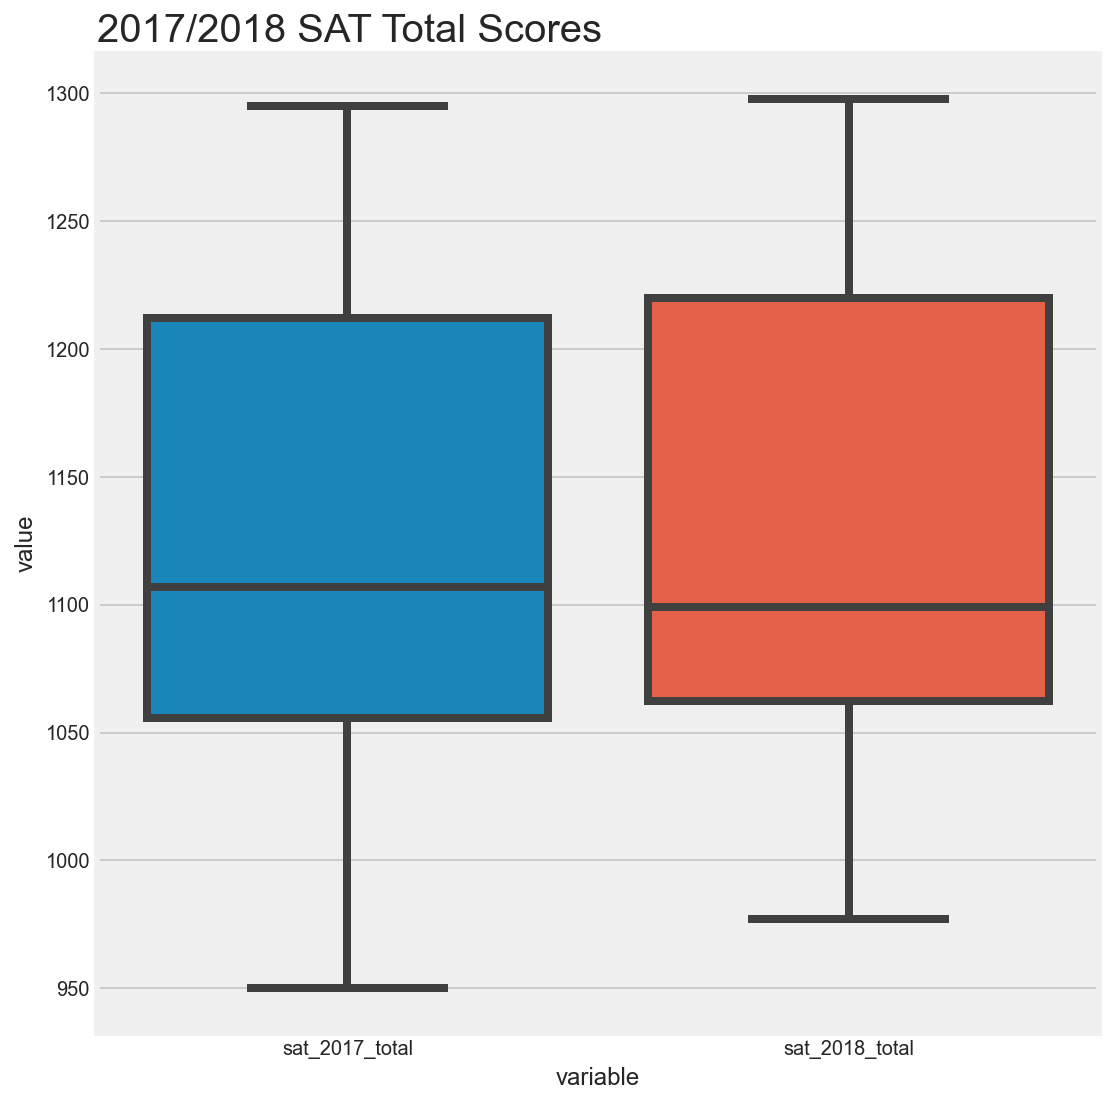

In [170]:
df = final[['sat_2017_total','sat_2018_total']]

plt.figure(figsize=(8,9))
sns.boxplot(x="variable", y="value", data=pd.melt(df))
plt.title("2017/2018 SAT Total Scores", position = (0,1), ha = 'left', fontsize=20);

No significant score changes from 2017 to 2018

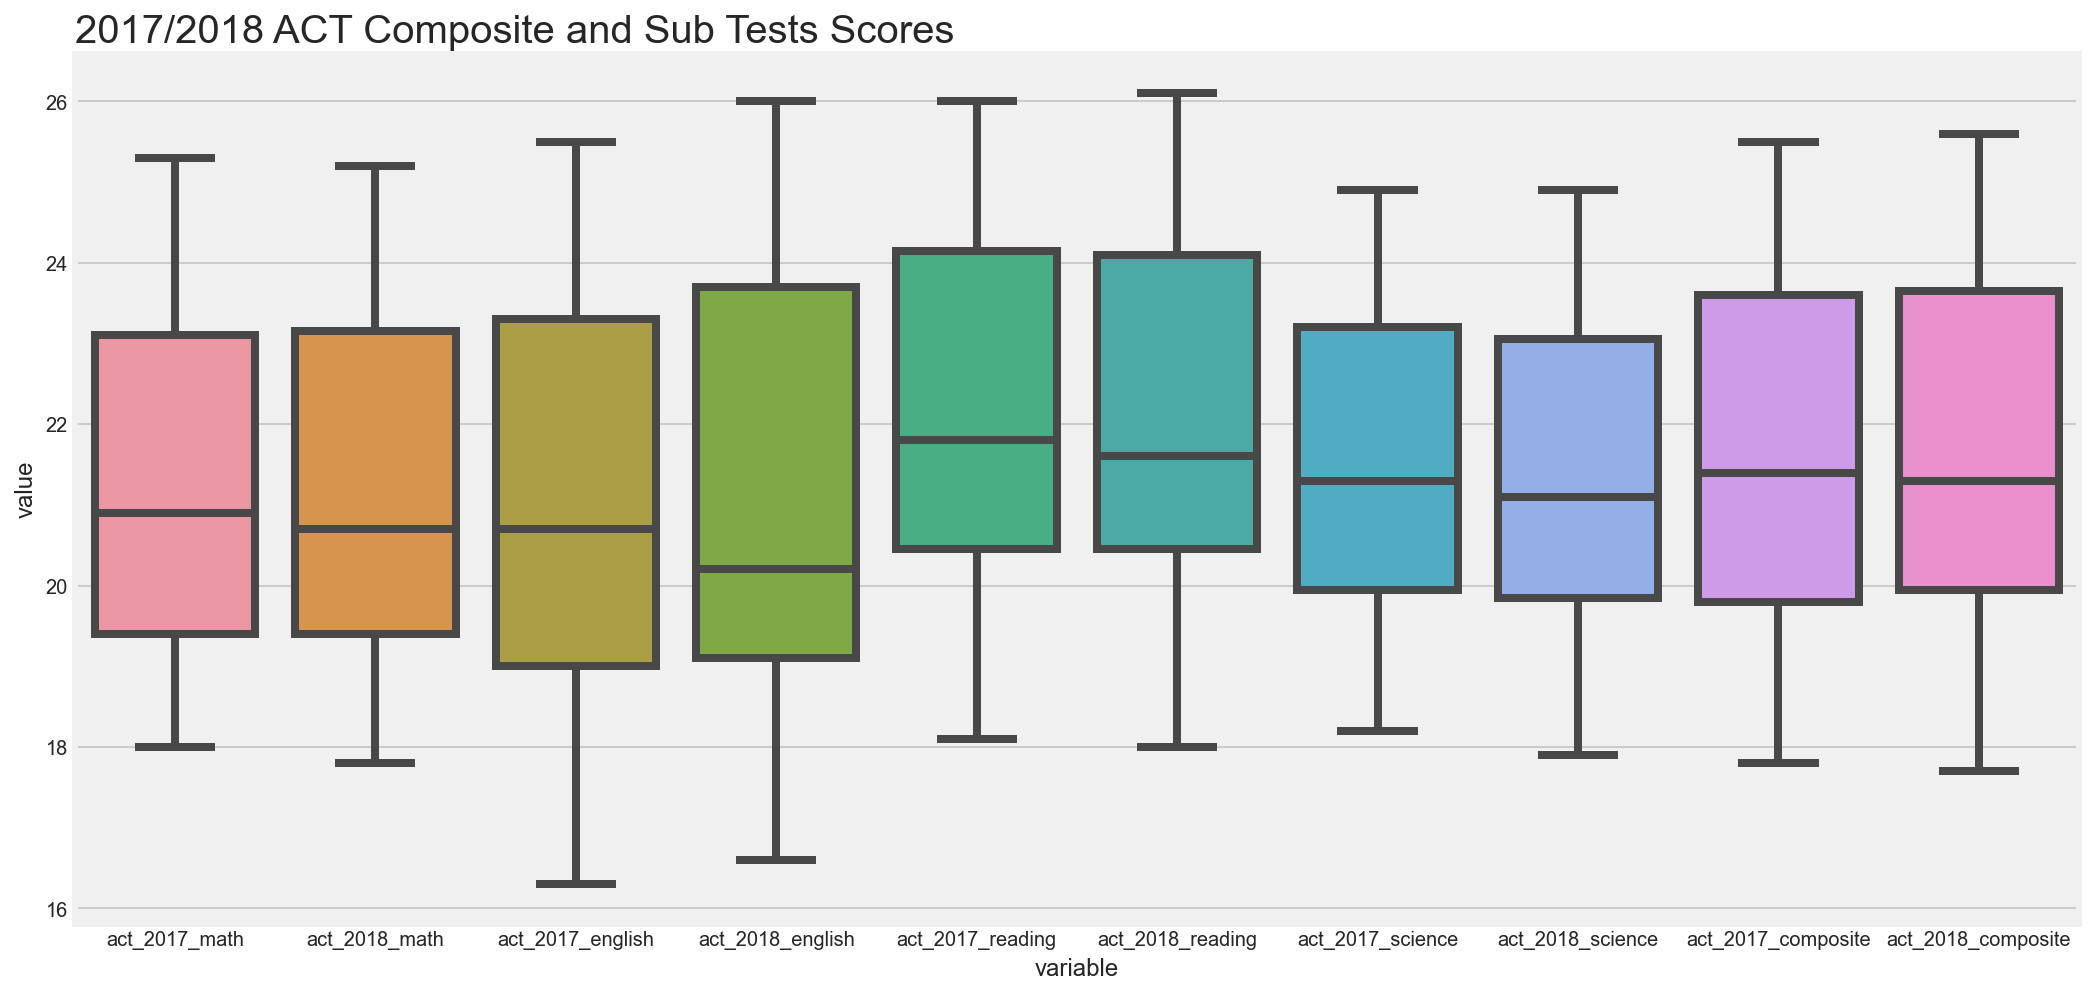

In [171]:
df = final[['act_2017_math','act_2018_math',
            'act_2017_english','act_2018_english',
            'act_2017_reading','act_2018_reading',
            'act_2017_science','act_2018_science',
            'act_2017_composite','act_2018_composite']]

plt.figure(figsize=(16,8))
sns.boxplot(x="variable", y="value", data=pd.melt(df))
plt.title("2017/2018 ACT Composite and Sub Tests Scores", position = (0,1), ha = 'left', fontsize=20);

No significant score changes from 2017 to 2018

In [172]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   states              51 non-null     object 
 1   sat_2017_erw        51 non-null     int64  
 2   sat_2017_math       51 non-null     int64  
 3   sat_2017_total      51 non-null     int64  
 4   sat_2017_part_rate  51 non-null     int64  
 5   act_2017_english    51 non-null     float64
 6   act_2017_math       51 non-null     float64
 7   act_2017_reading    51 non-null     float64
 8   act_2017_science    51 non-null     float64
 9   act_2017_part_rate  51 non-null     int64  
 10  act_2017_composite  51 non-null     float64
 11  sat_2018_erw        51 non-null     int64  
 12  sat_2018_math       51 non-null     int64  
 13  sat_2018_total      51 non-null     int64  
 14  sat_2018_part_rate  51 non-null     int64  
 15  act_2018_part_rate  51 non-null     int64  
 16  act_2018_c

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

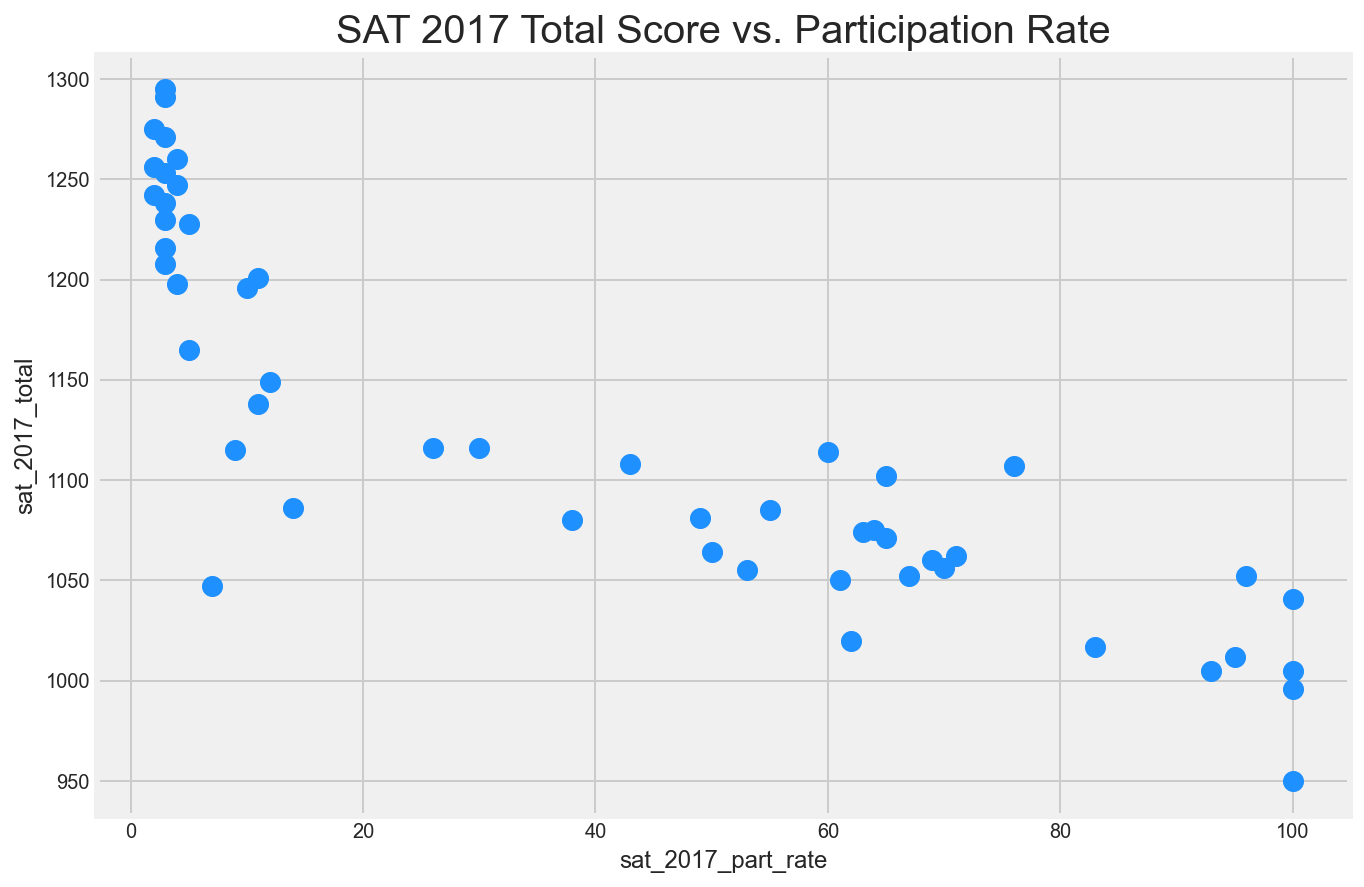

In [173]:
final.plot(x='sat_2017_part_rate', y='sat_2017_total', kind='scatter', 
           color='dodgerblue', figsize=(10,7), s=100);
plt.title('SAT 2017 Total Score vs. Participation Rate', fontsize=20);

Particiaption rate and test score are negatively correlated

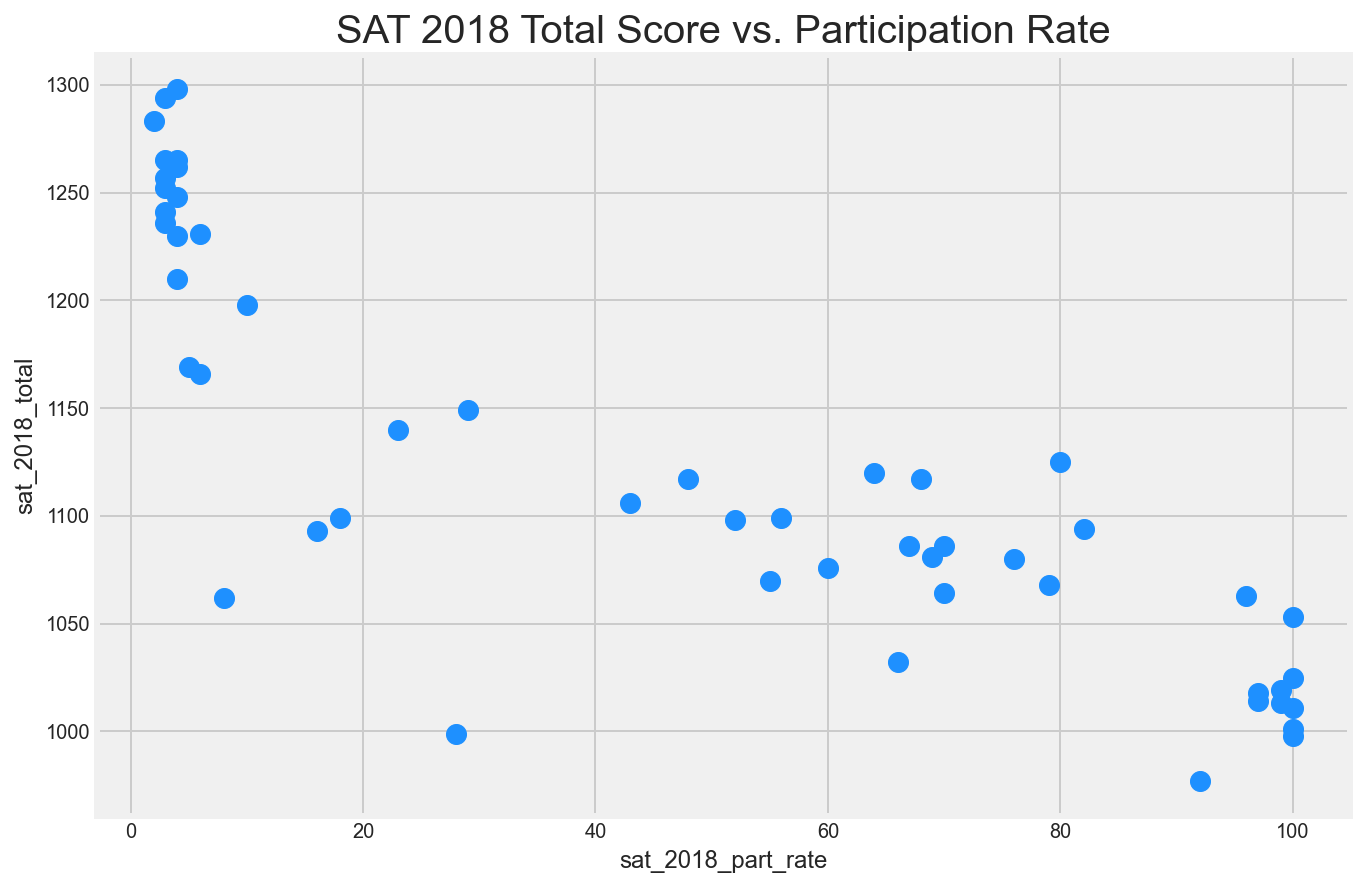

In [174]:
final.plot(x='sat_2018_part_rate', y='sat_2018_total', kind='scatter', 
           color='dodgerblue', figsize=(10,7), s=100);
plt.title('SAT 2018 Total Score vs. Participation Rate', fontsize=20);

Particiaption rate and test score are negatively correlated

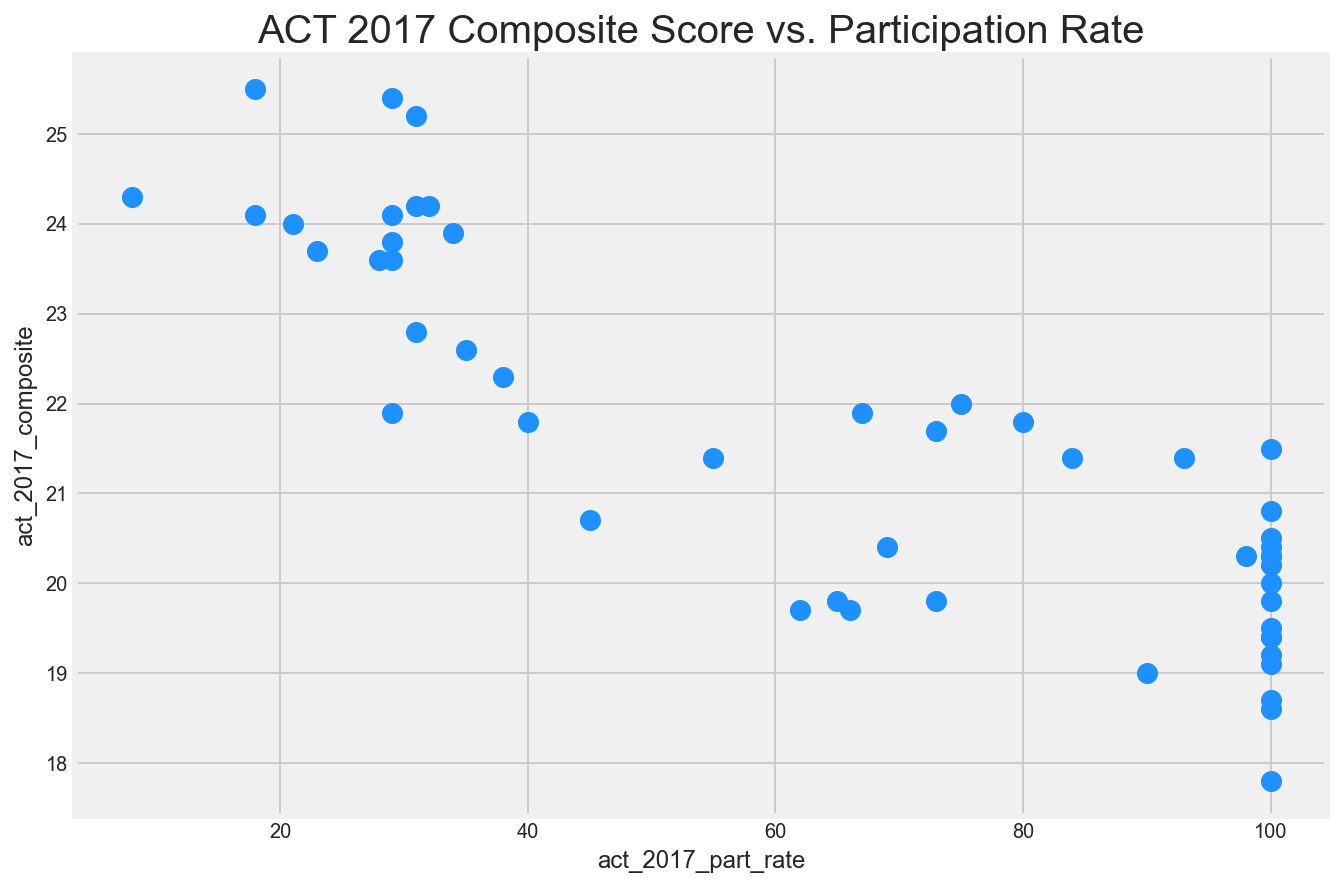

In [175]:
final.plot(x='act_2017_part_rate', y='act_2017_composite', kind='scatter', 
           color='dodgerblue', figsize=(10,7), s=100);
plt.title('ACT 2017 Composite Score vs. Participation Rate', fontsize=20);

Particiaption rate and test score are negatively correlated

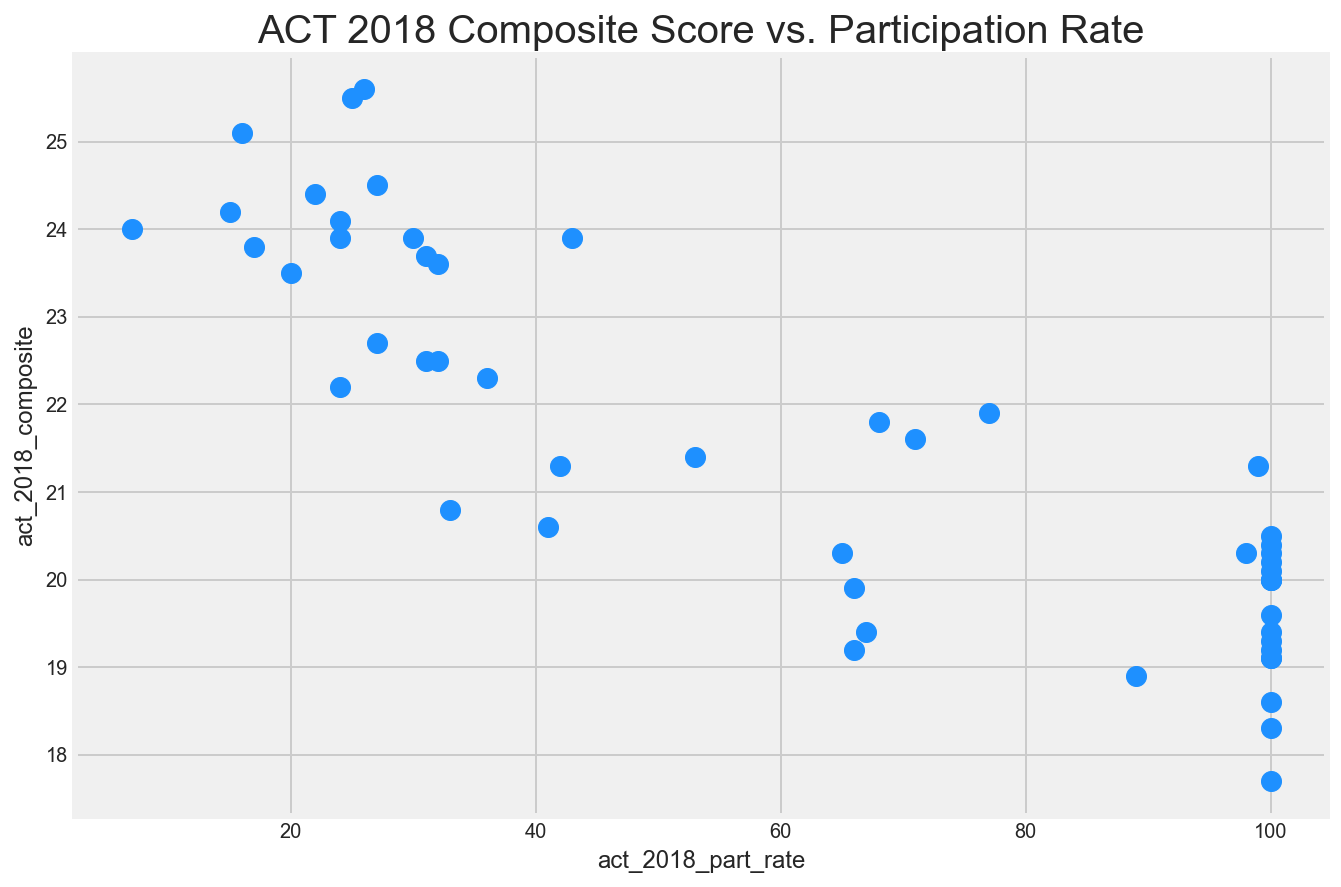

In [176]:
final.plot(x='act_2018_part_rate', y='act_2018_composite', kind='scatter', 
           color='dodgerblue', figsize=(10,7), s=100);
plt.title('ACT 2018 Composite Score vs. Participation Rate', fontsize=20);

Particiaption rate and test score are negatively correlated

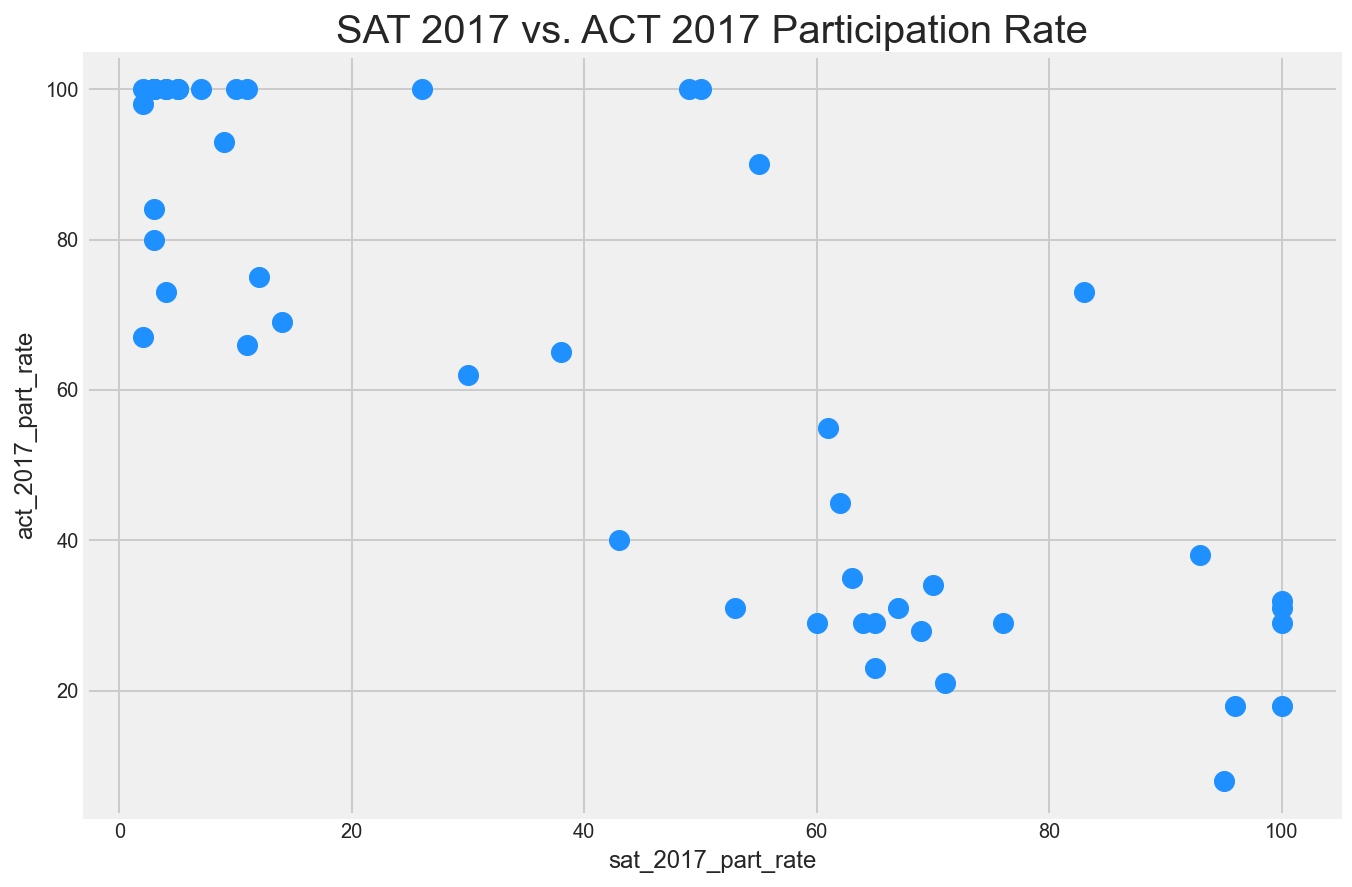

In [177]:
final.plot(x='sat_2017_part_rate', y='act_2017_part_rate', kind='scatter', 
           color='dodgerblue', figsize=(10,7), s=100);
plt.title('SAT 2017 vs. ACT 2017 Participation Rate', fontsize=20);

SAT vs ACT participation rate are negatively correlated

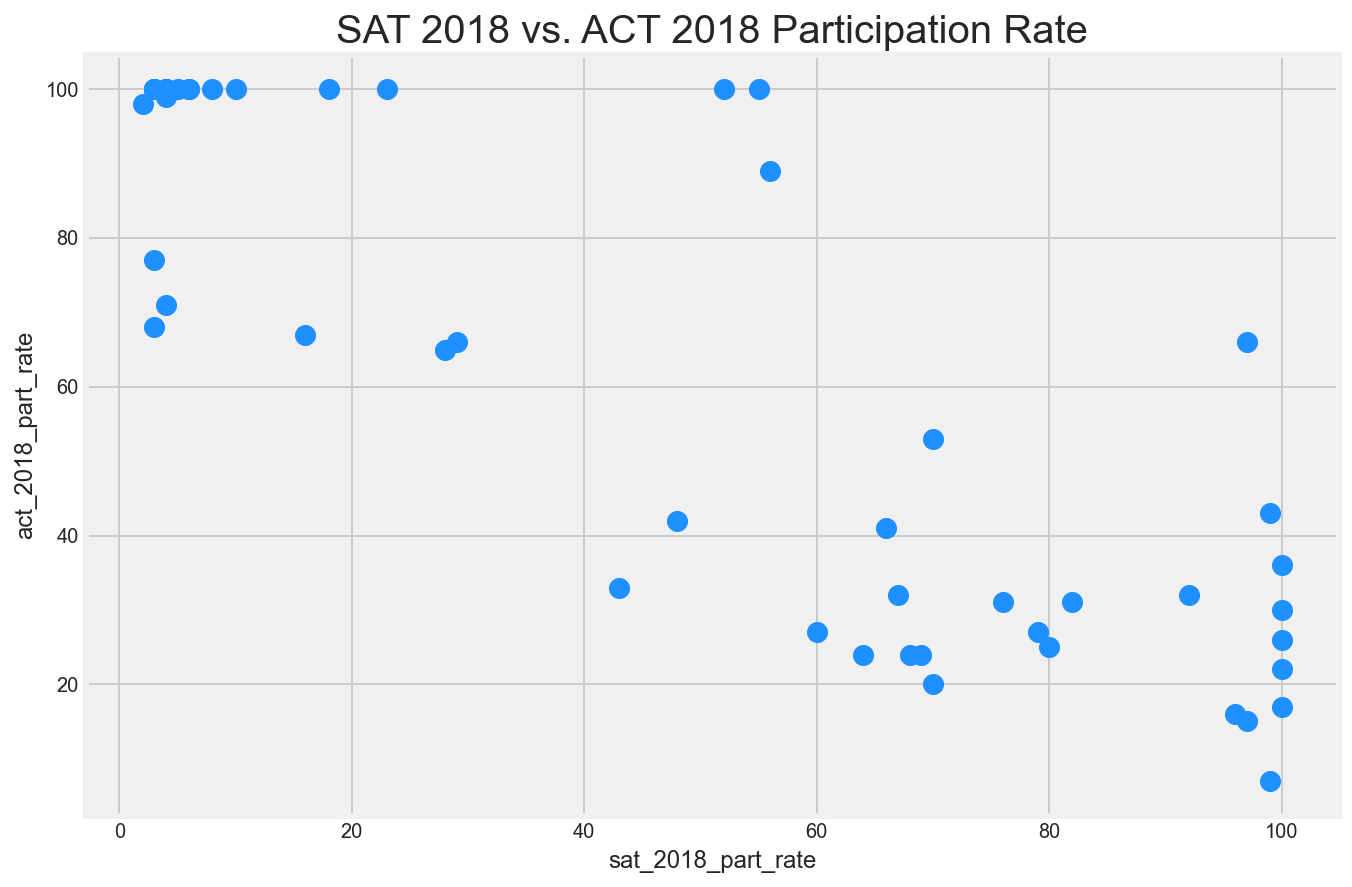

In [178]:
final.plot(x='sat_2018_part_rate', y='act_2018_part_rate', kind='scatter', 
           color='dodgerblue', figsize=(10,7), s=100);
plt.title('SAT 2018 vs. ACT 2018 Participation Rate', fontsize=20);

SAT vs ACT participation rate are negatively correlated

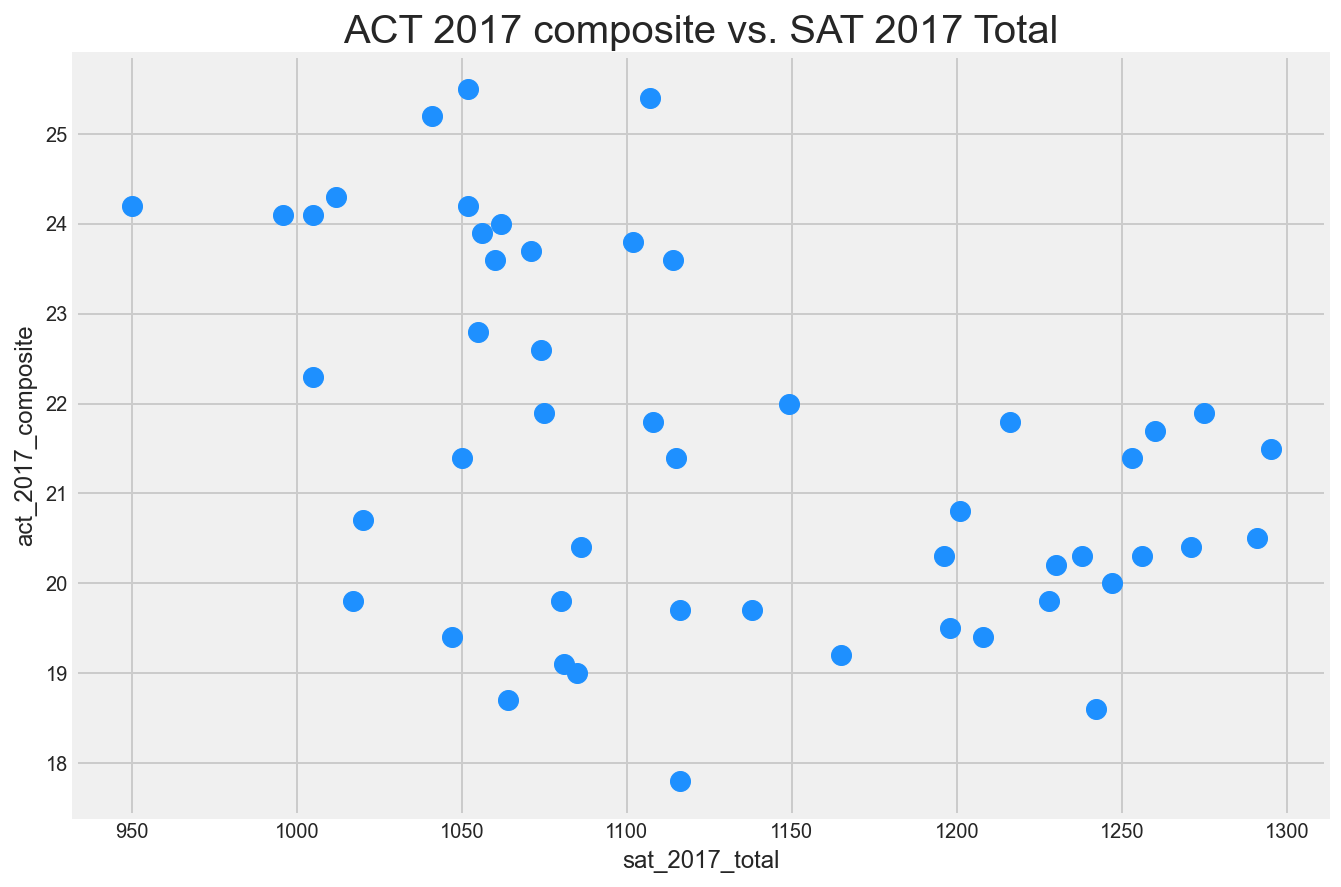

In [179]:
final.plot(x='sat_2017_total', y='act_2017_composite', kind='scatter', 
           color='dodgerblue', figsize=(10,7), s=100);
plt.title('ACT 2017 composite vs. SAT 2017 Total', fontsize=20);

SAT and ACT scores are negatively correlated

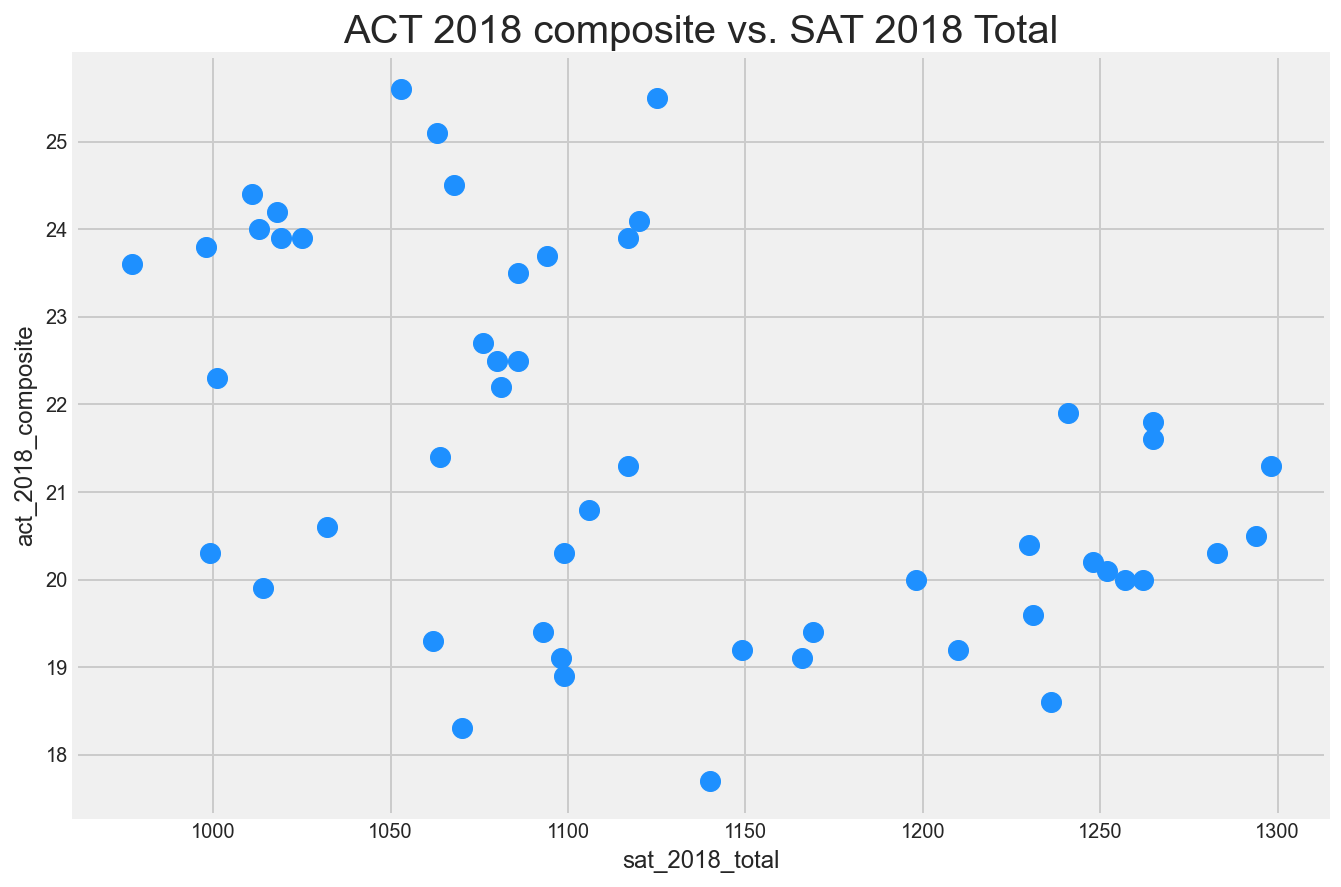

In [180]:
final.plot(x='sat_2018_total', y='act_2018_composite', kind='scatter', 
           color='dodgerblue', figsize=(10,7), s=100);
plt.title('ACT 2018 composite vs. SAT 2018 Total', fontsize=20);

SAT and ACT scores are negatively correlated

In [181]:
sat_part_rate = final[["states", "sat_2017_part_rate", "sat_2018_part_rate"]]
sat_part_rate['delta'] = sat_part_rate["sat_2018_part_rate"] - sat_part_rate["sat_2017_part_rate"]

sat_part_rate.head()

/Users/chuahb/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


states  sat_2017_part_rate  sat_2018_part_rate  delta
0     Alabama                   5                   6      1
1      Alaska                  38                  43      5
2     Arizona                  30                  29     -1
3    Arkansas                   3                   5      2
4  California                  53                  60      7

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

In [182]:
sat_part_rate = sat_part_rate.sort_values('sat_2018_part_rate', ascending=False)

In [183]:
sat_part_rate_10 = sat_part_rate.set_index('states').head(10)

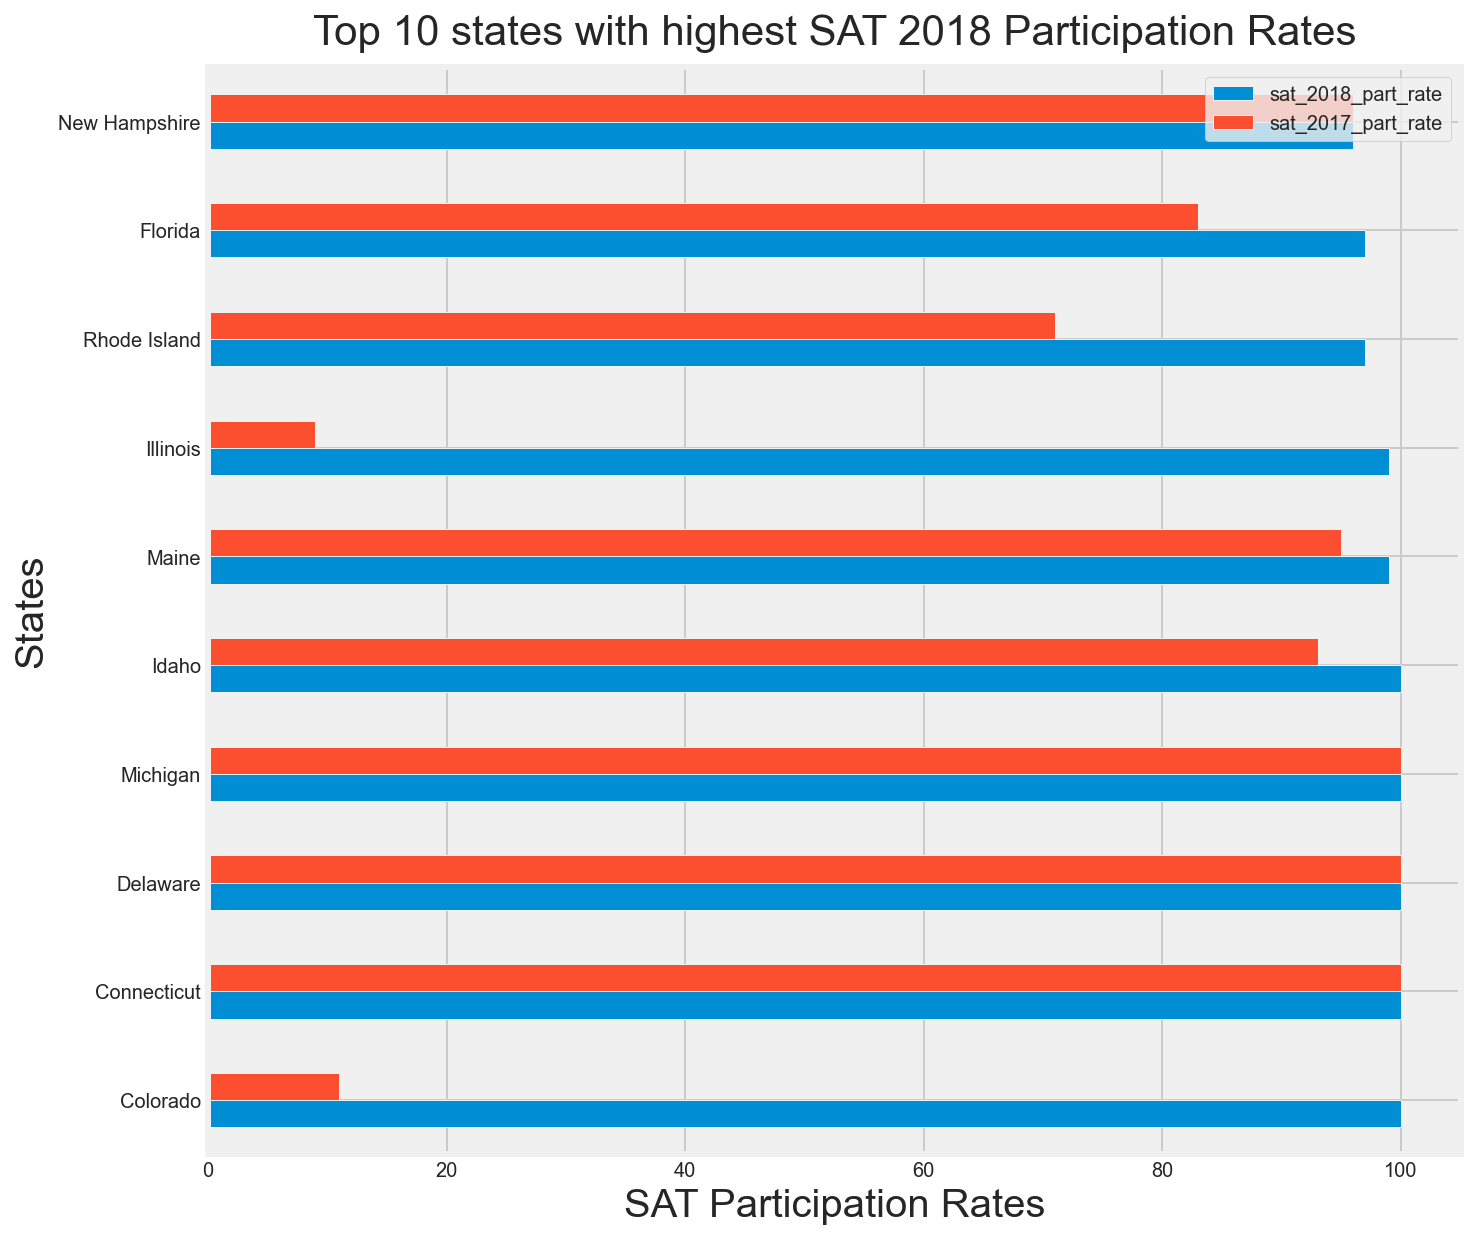

In [184]:
ax = sat_part_rate_10[["sat_2018_part_rate", "sat_2017_part_rate"]].plot(kind='barh', figsize=(10,10))

# Set the title.
ax.set_title('Top 10 states with highest SAT 2018 Participation Rates', fontsize=21, y=1.01);

# Move the legend.
ax.legend(loc=1);

# x-axis labels
ax.set_ylabel('States', fontsize=20);

# y-axis labels
ax.set_xlabel('SAT Participation Rates', fontsize=20);

Among the states that are showing 100% SAT participation rates, some states showed remarkable improvement from 2017

In [185]:
sat_part_rate = sat_part_rate.sort_values('delta', ascending=False)

In [186]:
sat_part_rate_delta_T10 = sat_part_rate.set_index('states').head(10)

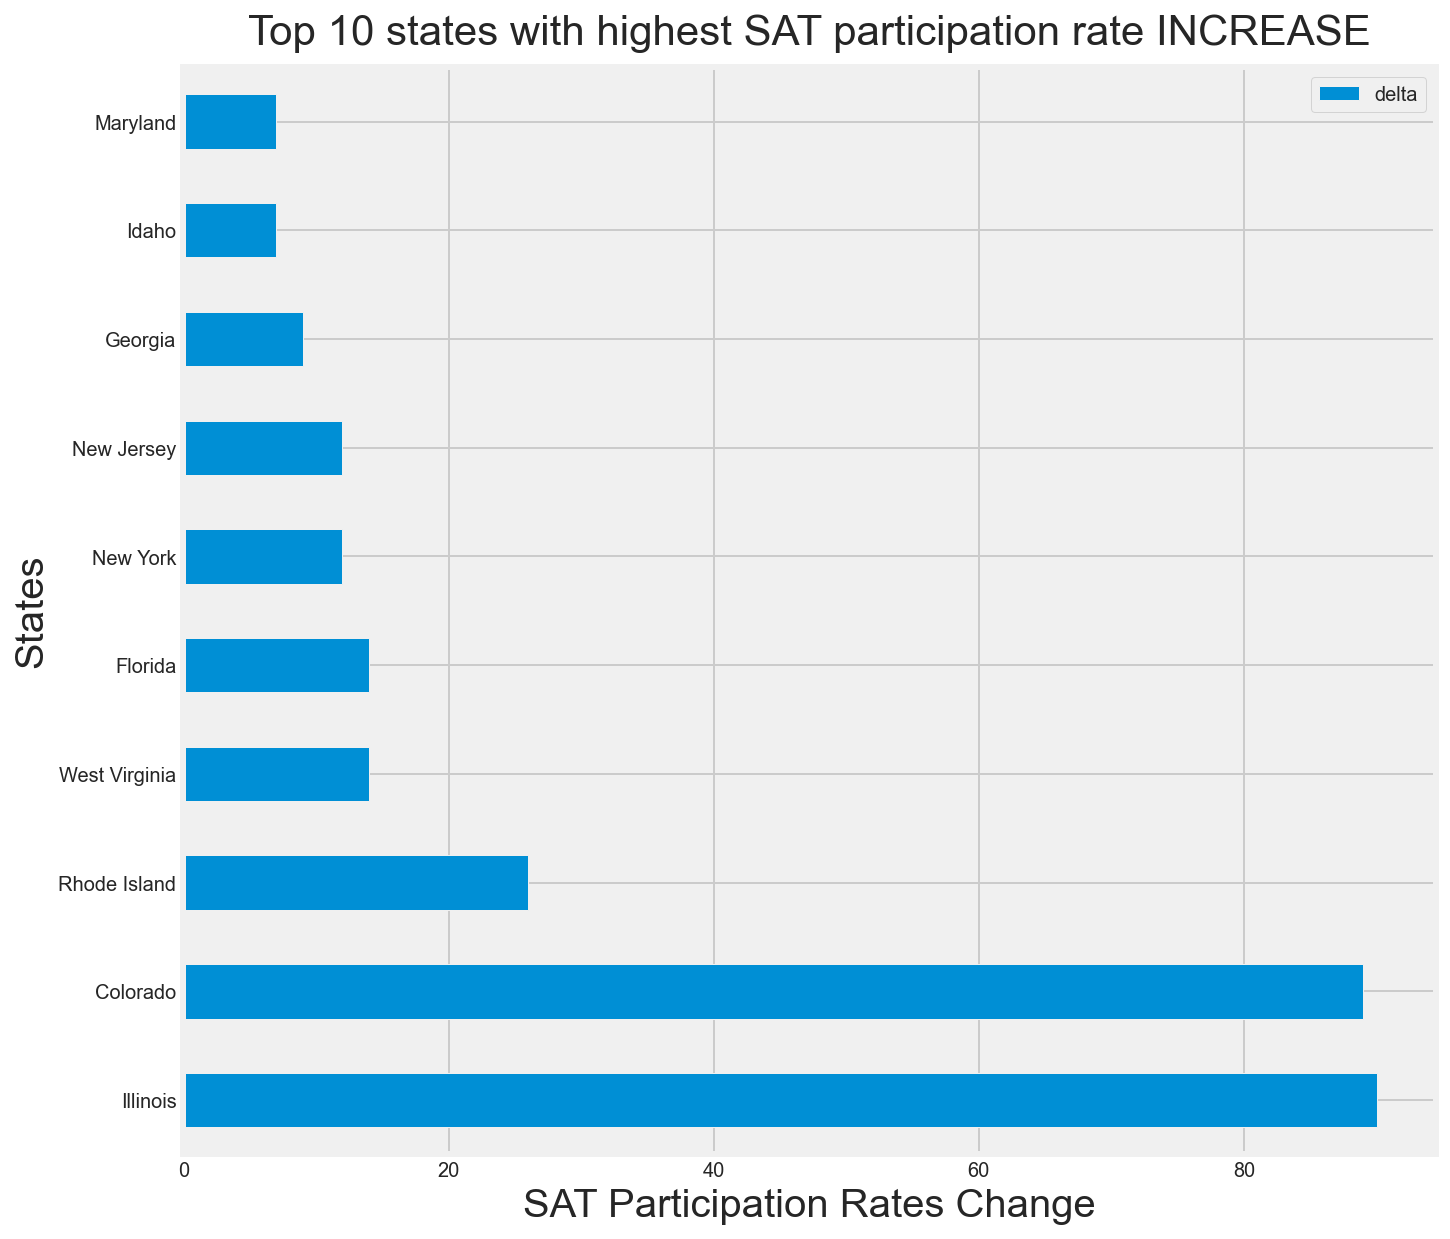

In [187]:
ax = sat_part_rate_delta_T10["delta"].plot(kind='barh', figsize=(10,10))

# Set the title.
ax.set_title('Top 10 states with highest SAT participation rate INCREASE', fontsize=21, y=1.01);

# Move the legend.
ax.legend(loc=1);

# x-axis labels
ax.set_ylabel('States', fontsize=20);

# y-axis labels
ax.set_xlabel('SAT Participation Rates Change', fontsize=20);

Illinois, Colorado, Rhode island show the biggest SAT participation rate increase

In [188]:
act_part_rate = final[["states", "act_2017_part_rate", "act_2018_part_rate"]]
act_part_rate['act_part_delta'] = act_part_rate["act_2018_part_rate"] - act_part_rate["act_2017_part_rate"]

act_part_rate.head()

/Users/chuahb/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


states  act_2017_part_rate  act_2018_part_rate  act_part_delta
0     Alabama                 100                 100               0
1      Alaska                  65                  33             -32
2     Arizona                  62                  66               4
3    Arkansas                 100                 100               0
4  California                  31                  27              -4

In [189]:
act_part_delta_B10 = act_part_rate.sort_values('act_part_delta', ascending=True)

In [190]:
act_part_delta_B10 = act_part_delta_B10.set_index('states').head(10)

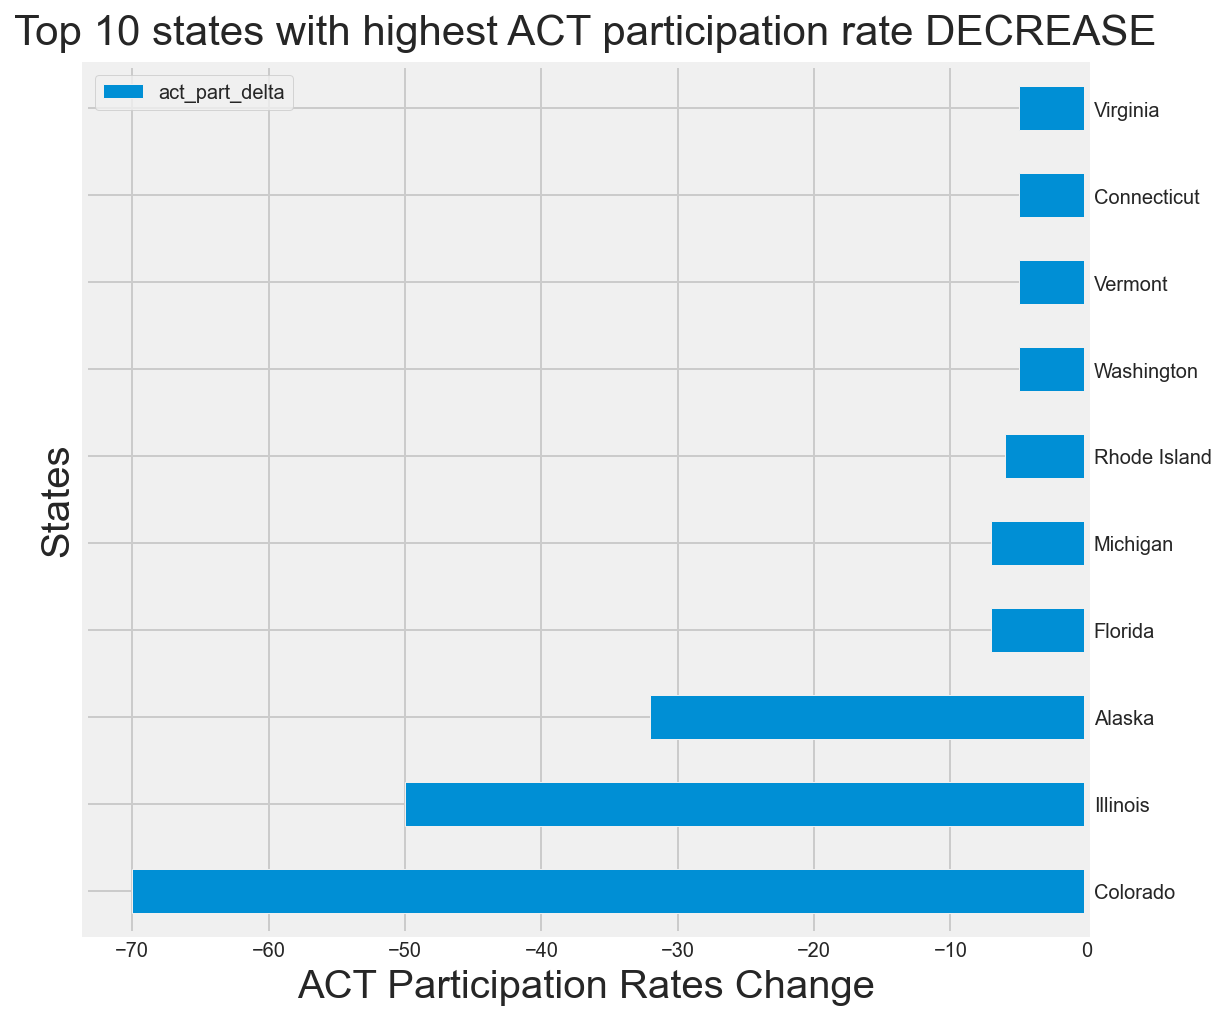

In [191]:
ax = act_part_delta_B10["act_part_delta"].plot(kind='barh', figsize=(8,8))

# Set the title.
ax.set_title('Top 10 states with highest ACT participation rate DECREASE', fontsize=21, y=1.01);

# Move the legend.
ax.legend(loc=2);

# x-axis labels
ax.set_ylabel('States', fontsize=20);

# y-axis labels
ax.yaxis.tick_right()
ax.set_xlabel('ACT Participation Rates Change', fontsize=20);

Correspond to states showing biggest ACT participation rate drop

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

<font color='blue'>For SAT and ACT participation rates, the distributions are usually bimodal or multi-modal skewed to extreme range of the distribution. Although their means and medians are not too different, their stdev is 50% to 88% of their means</font>

<font color='blue'>For SAT and ACT test/sub-test scores, the distribution also showing bimodal or multi-modal distributions but with a larger degree of central tendency. Their means and medians are close and stdev approximately 9% of their means</font>

|Variable|Mean|Std|Median|Std/Mean%|Distribution|
|---|---|---|---|---|---|
|sat_2017_part_rate|39.80|35.27|38.0|88.6%|Multi Modal skewed to extreme ends|
|sat_2018_part_rate|46.62|38.01|52.0|81.53%|Bimodal skewed to extreme ends|
|act_2017_part_rate|65.25|32.14|69.0|49.26%|Multi Modal skewed to extreme ends|
|act_2018_part_rate|61.64|34.08|66.0|55.29%|Multi Modal skewed to extreme ends|
|sat_2017_total|1126.09|92.49|1107.0|8.21%|Bimodal with central tendency|
|sat_2017_erw|569.11|45.66|559.0|8.02%|Bimodal with central tendency|
|sat_2017_math|556.88|47.12|548.0|8.47%|Bimodal with central tendency|
|sat_2018_total|1124.66|93.86|1099.0|8.35%|Bimodal with central tendency|
|sat_2018_erw|567.29|45.31|552.0|7.98%|Bimodal with central tendency|
|sat_2018_math|557.25|48.88|547.0|8.78%|Bimodal with central tendency|
|act_2017_composite|21.51|2.02|21.4|9.39%|Multi Modal with central tendency|
|act_2017_english|20.93|2.35|20.7|11.2%|Bimodal with central tendency|
|act_2017_reading|22.01|2.06|21.8|9.36%|Bimodal with central tendency|
|act_2017_science|21.45|1.73|21.3|8.06%|Bimodal with central tendency|
|act_2018_composite|21.49|2.11|21.3|9.82%|Bimodal with central tendency|
|act_2018_english|20.98|2.44|20.2|11.63%|Bimodal with central tendency|
|act_2018_reading|22.01|2.16|21.6|9.81%|Bimodal with central tendency|
|act_2018_science|21.34|1.87|21.1|8.76%|Bimodal with central tendency|
|act_2018_math|21.12|2.03|20.7|9.61%|Bimodal with central tendency|

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

<font color='blue'>No, none of the 20 columns display any resemblance of a Normal distribution</font>

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

<font color='blue'>No, the assumption is not valid for all 20 columns.<br>
    <br>
For the sample distribution to be Normal, every sample should be an independent sample from the SAME population of interest with at least 30 measurements.<br>
    <br>
For the case of our dataset, every state data point is an aggregated mean (test/sub-tests) or ratio (participation rate) of the entire population of 11th graders taking SAT/ACT in each state.
<br>
    <br>
To use these data to estimate National level statistics will not be appropriate. (Unless they are weighted average taking into account of every states full population)<br>
    <br>
Nevertheless, every datapoint is already a "Parameter" of the full 11th graders population in each state</font>

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

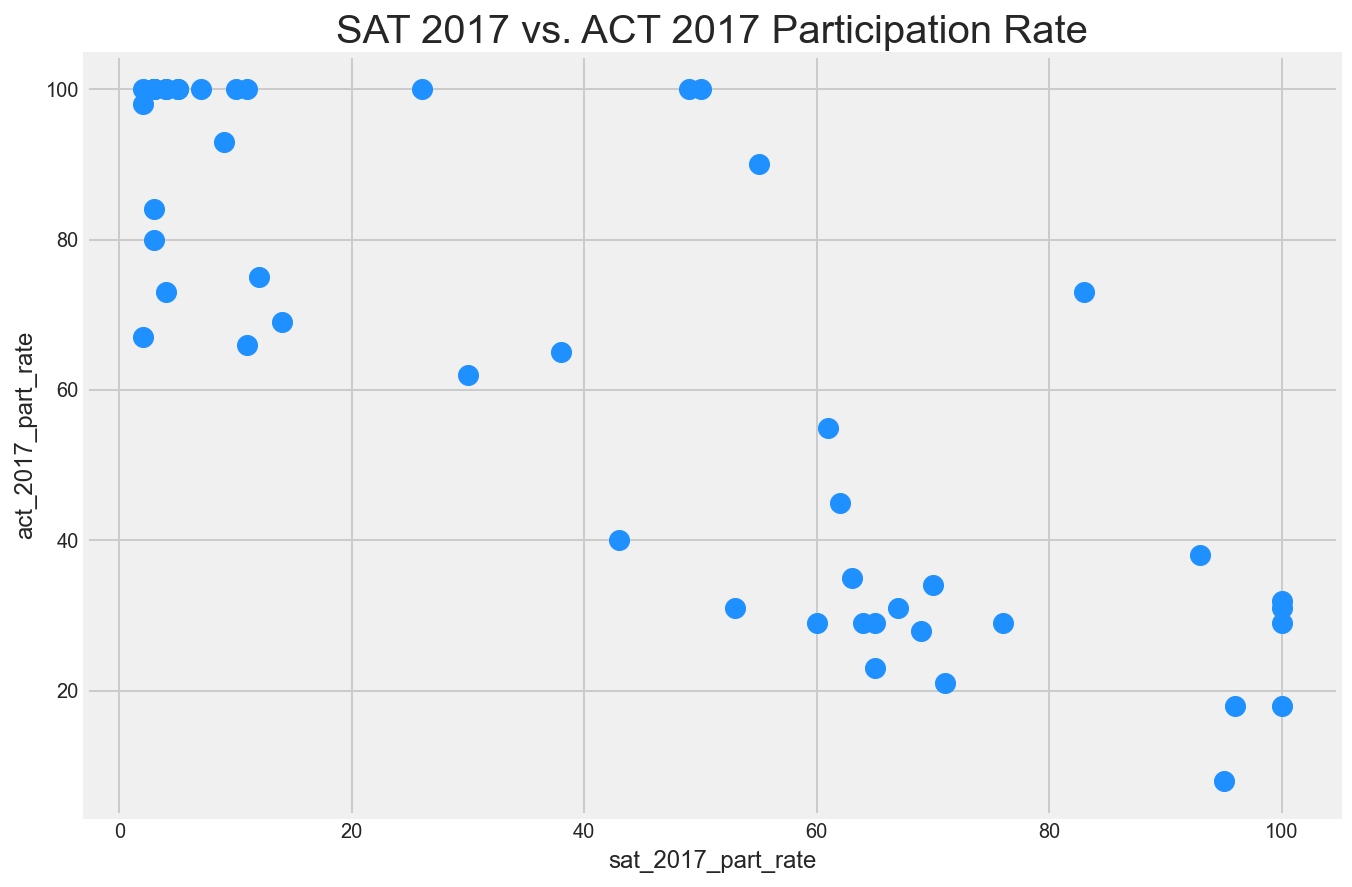

In [192]:
final.plot(x='sat_2017_part_rate', y='act_2017_part_rate', kind='scatter', 
           color='dodgerblue', figsize=(10,7), s=100);
plt.title('SAT 2017 vs. ACT 2017 Participation Rate', fontsize=20);

In [193]:
data = final[["sat_2017_part_rate", "act_2017_part_rate"]]
data.corr()

sat_2017_part_rate  act_2017_part_rate
sat_2017_part_rate            1.000000           -0.841234
act_2017_part_rate           -0.841234            1.000000

<font color='blue'>Each SAT or ACT participation rate data represents the ratio of 11th graders who took the test in a given state. This is not a sample statistic of the state but a parameter for the entire state's 11th grader population. Since this is already a state's full population "parameter", there's nothing to infer for the state with regards to SAT or ACT participation in the same state<br>
<br>
However, by plotting all 51 pairs of participation rate data, it will tell us the relationship between between the 2 which is negatively correlated with a coefficient of -0.841.<br> 
<br>
We can use it to answer a question such as "For a given state with 36% SAT participation rate, what is the estimated ACT participation rate.</font>

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

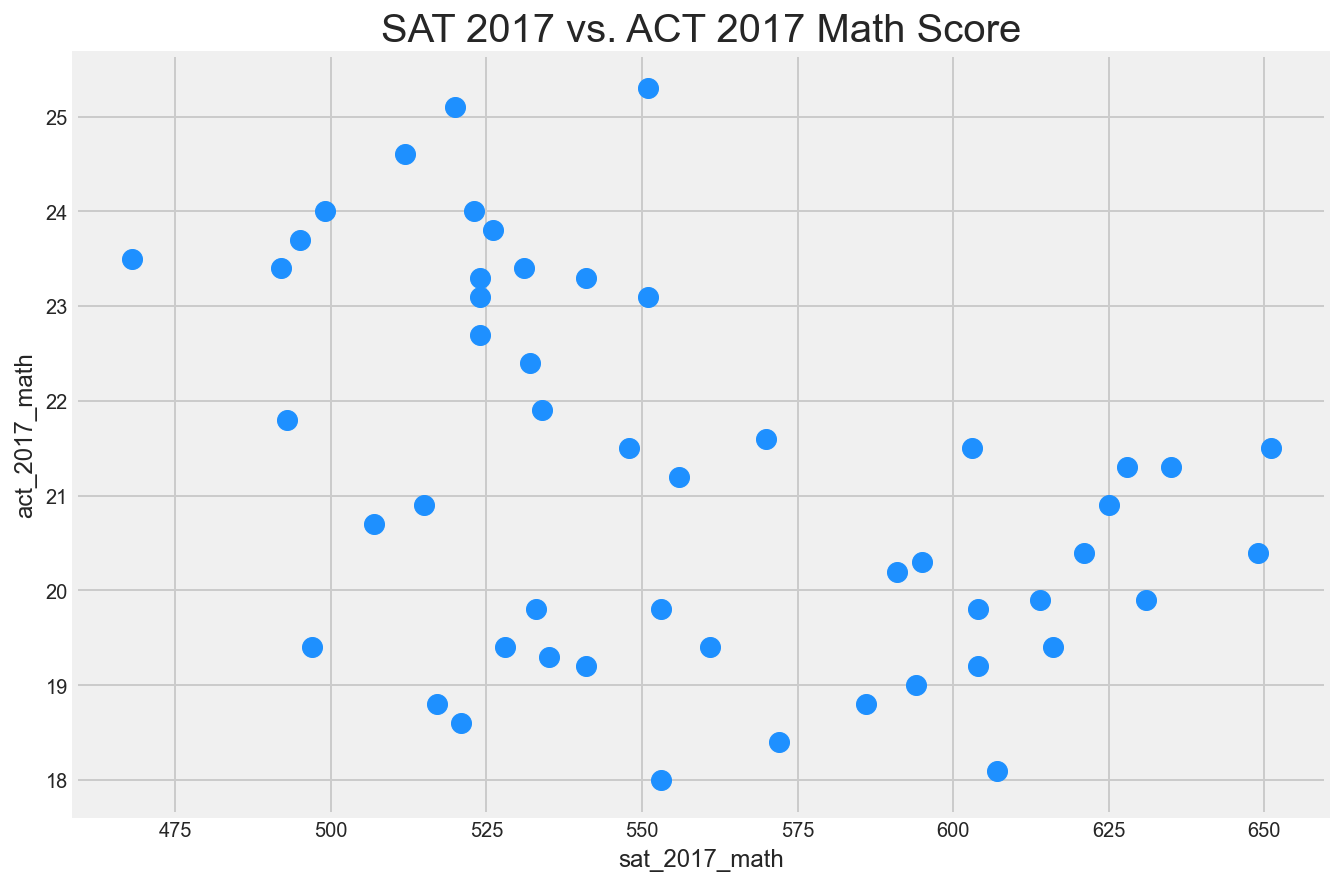

In [194]:
final.plot(x='sat_2017_math', y='act_2017_math', kind='scatter', 
           color='dodgerblue', figsize=(10,7), s=100);
plt.title('SAT 2017 vs. ACT 2017 Math Score', fontsize=20);

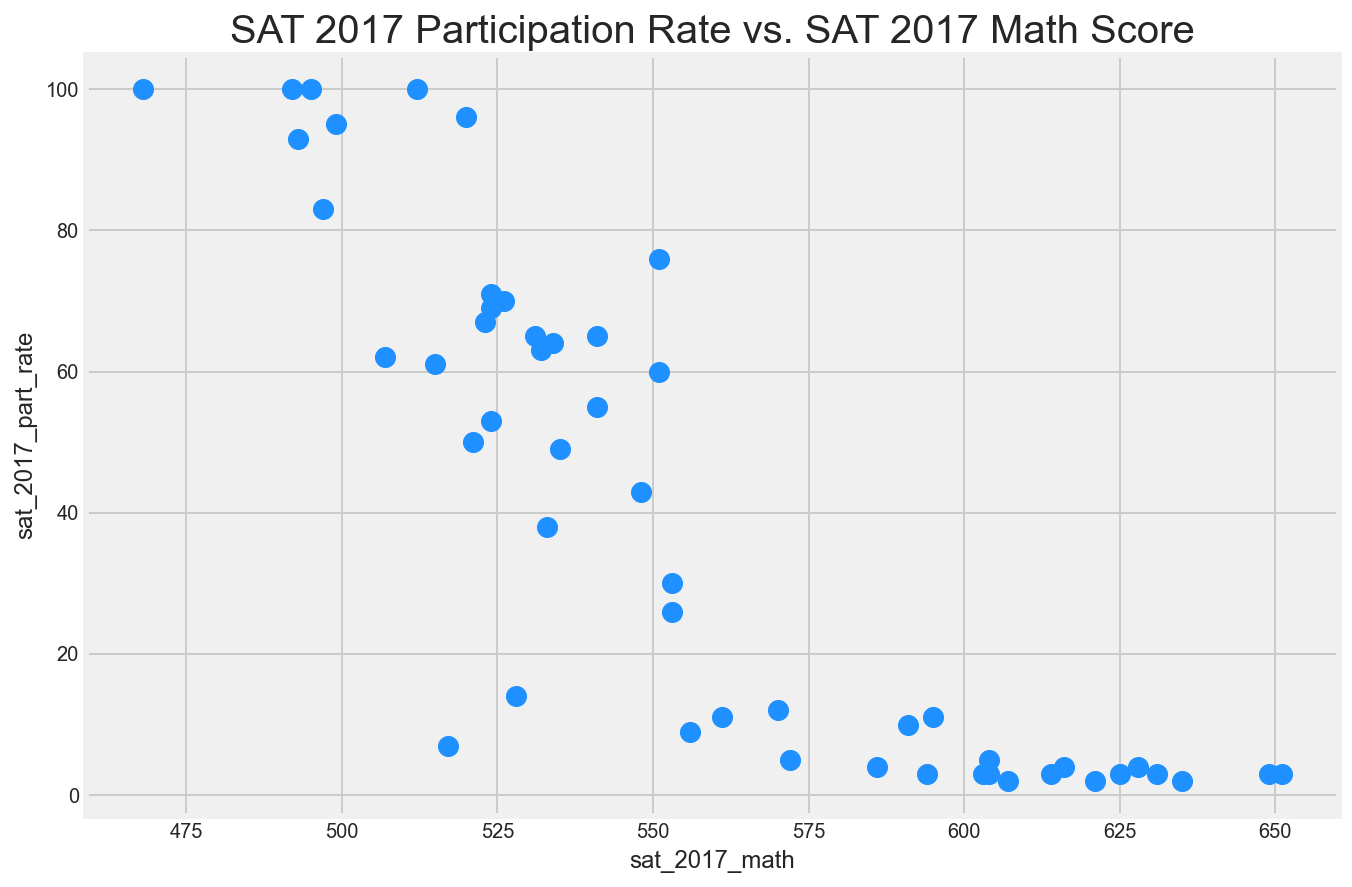

In [195]:
final.plot(x='sat_2017_math', y='sat_2017_part_rate', kind='scatter', 
           color='dodgerblue', figsize=(10,7), s=100);
plt.title('SAT 2017 Participation Rate vs. SAT 2017 Math Score', fontsize=20);

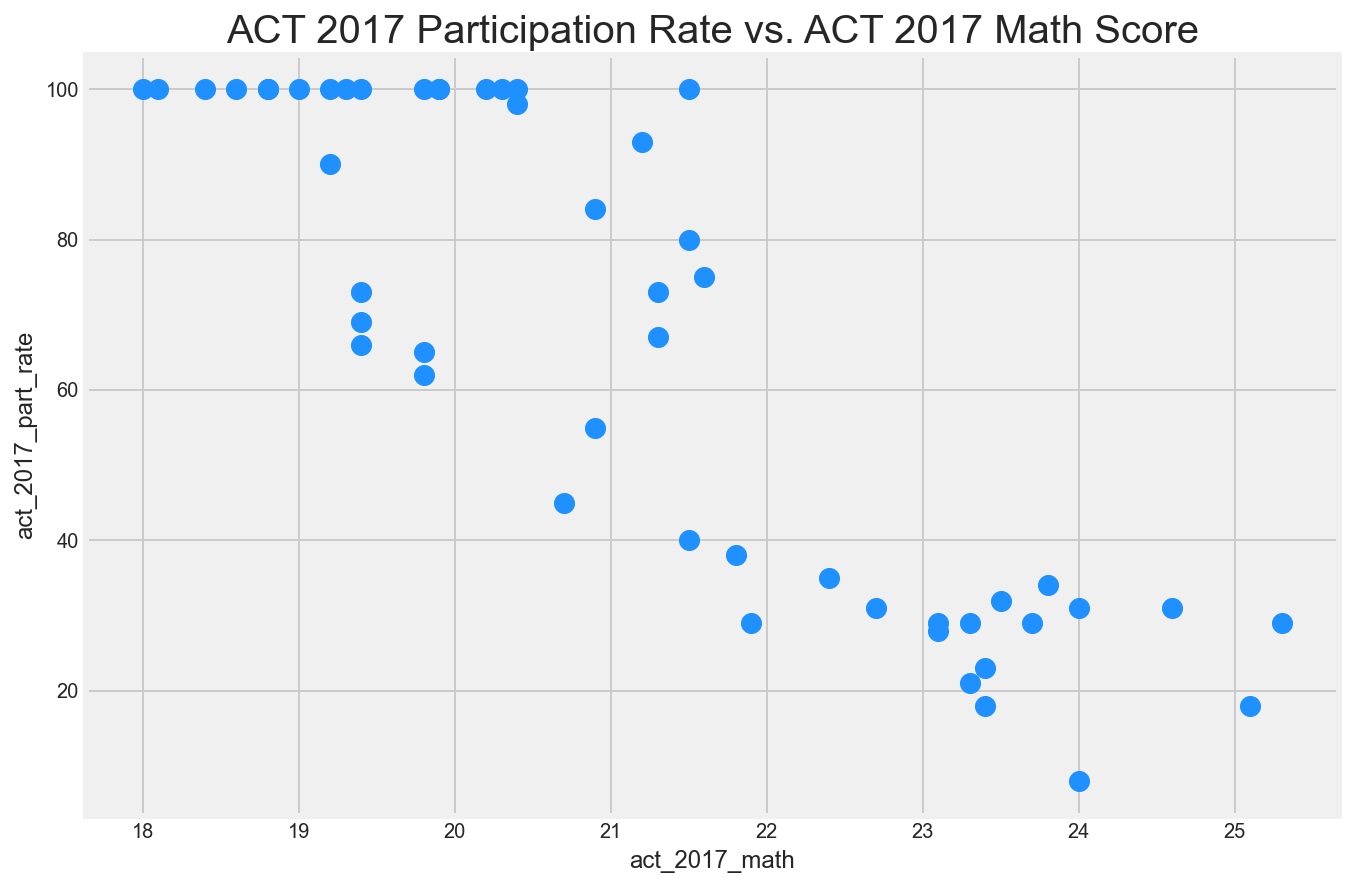

In [196]:
final.plot(x='act_2017_math', y='act_2017_part_rate', kind='scatter', 
           color='dodgerblue', figsize=(10,7), s=100);
plt.title('ACT 2017 Participation Rate vs. ACT 2017 Math Score', fontsize=20);

<font color='blue'>When we plot SAT Math score against ACT Math score, right away we can observe a somewhat negative correlation. It does not make sense that students that score well for SAT will do badly for ACT. Therefore at least 1 confounding variable exists<br>
<br>
One confounding variable is the participation rate which clearly shows a NEGATIVE correlation to the math scores. This is true for both SAT and ACT.<br>
<br>
While we may use a state's mean SAT math score to predict it's mean ACT math score (both having different student populations, one group taking SAT and the other ACT), we cannot use it to predict either scores for a *same group of students* who may have taken both tests.
</font>

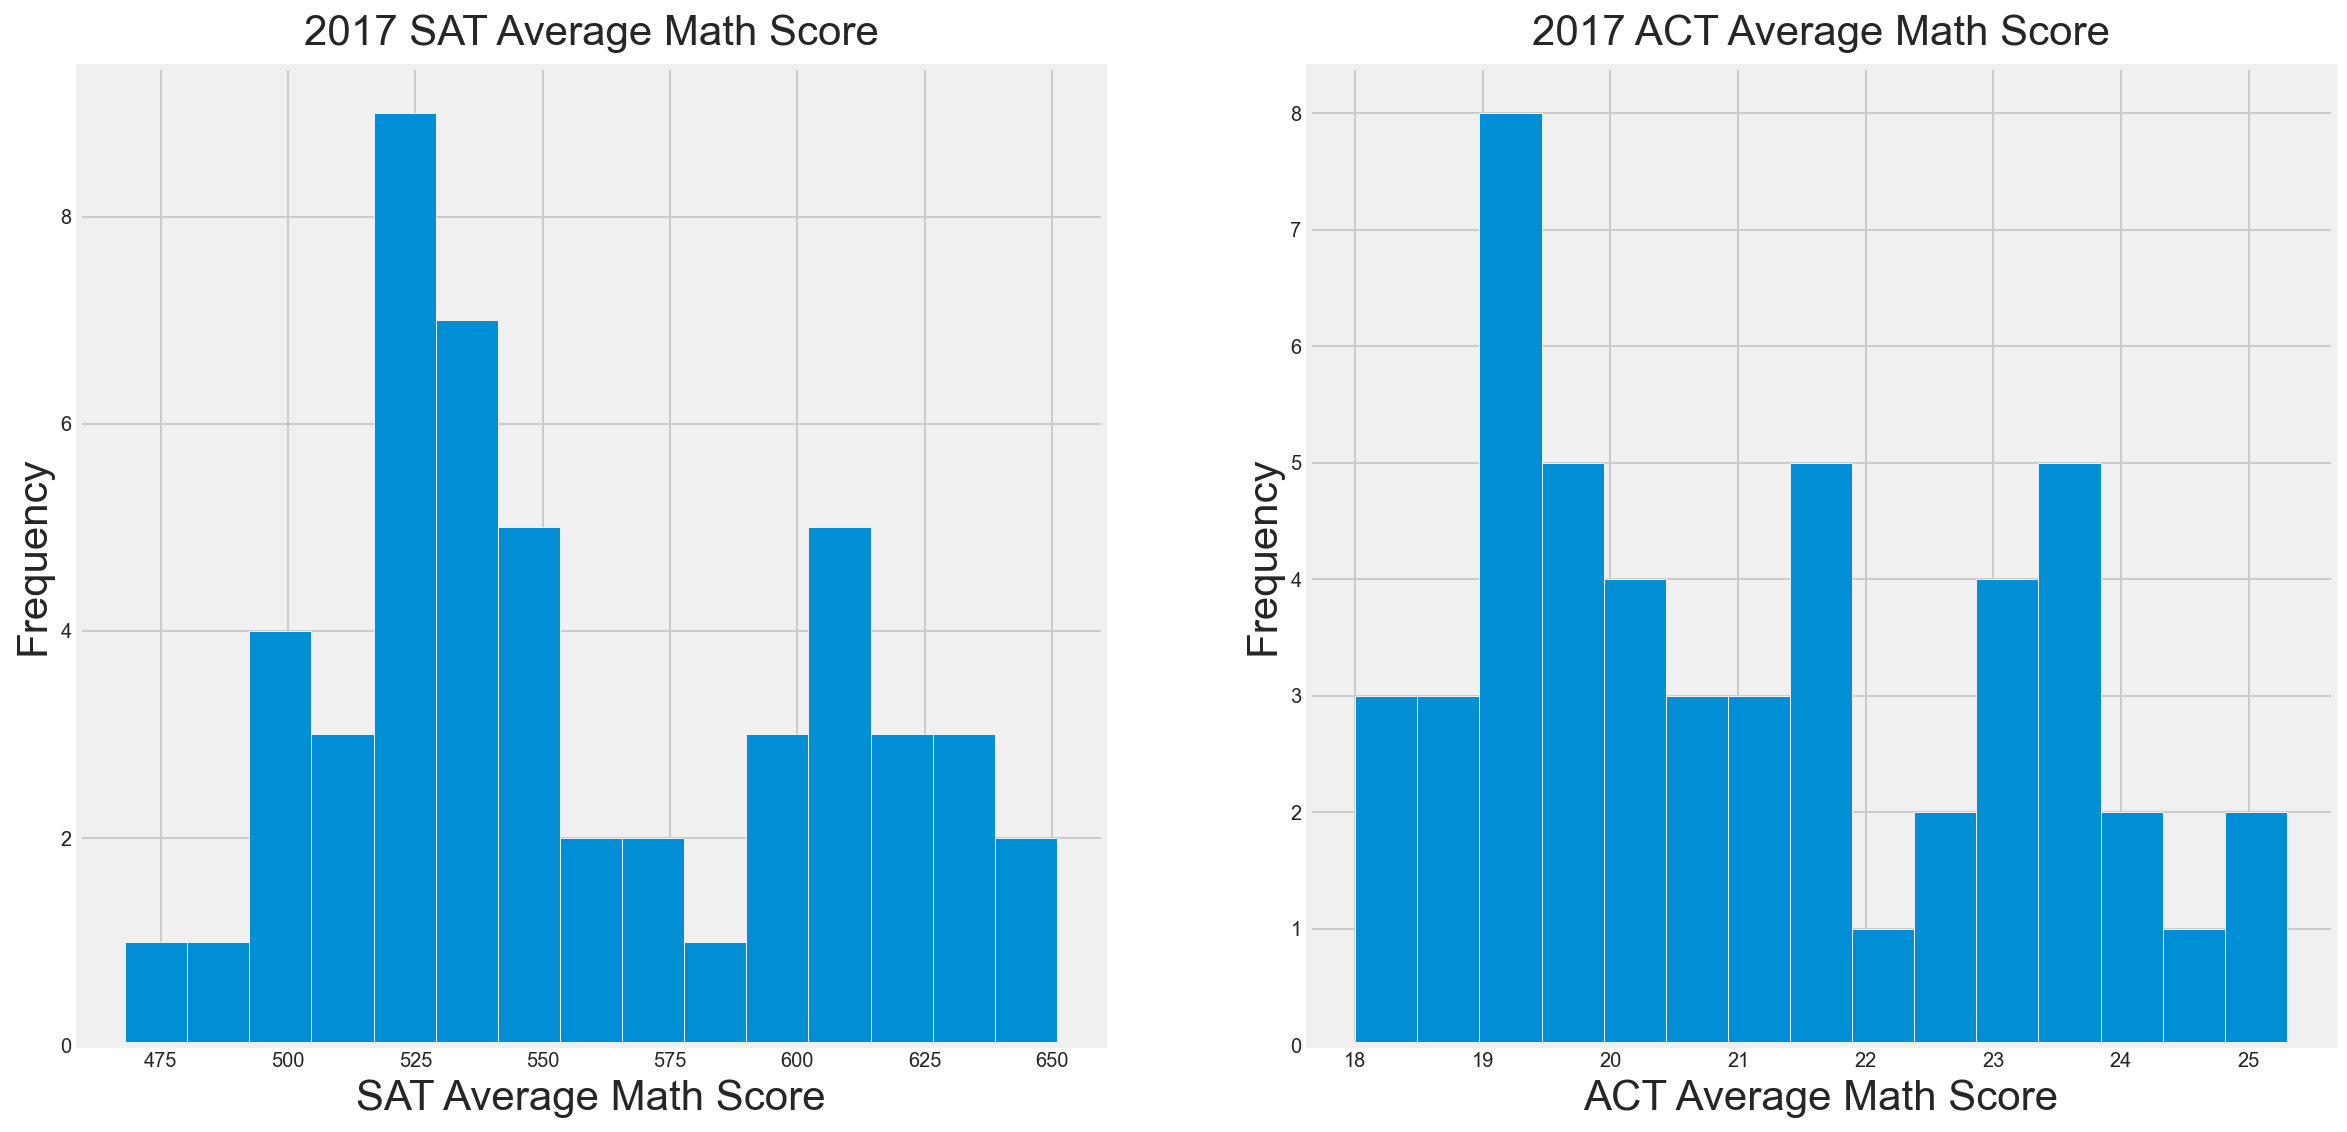

In [197]:
subplot_histograms(final, 
                   ["sat_2017_math", "act_2017_math"], 
                   ["2017 SAT Average Math Score", "2017 ACT Average Math Score"], 
                   ["SAT Average Math Score", "ACT Average Math Score"])

<font color='blue'>A better way to compare SAT math score to ACT math score is to look at their histograms<br>
<br>
Since both test have different grade scoring methods, the actual scores will not provide any meaningful comparisons.<br>
<br>
However both tests are showing similar std/mean of 8%, indicating very similar score variance<br>
<br>
A possible solution will be to compare their Z-distributions where the distribution means are normalized to ZERO and standard deviation to 1.<br>
    <br>
Therefore for a random state having SAT participation rate of 80% and average SAT MAth Z-score of 1 sigma. It can be estimated that the same state at 80% ACT participation rate will have an average ACT Math score of ACT Math Z-score of 1 sigma as well.
</font>

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [198]:
stats.ttest_ind(final["sat_2017_total"], final["sat_2018_total"], equal_var=False)

Ttest_indResult(statistic=0.07756761006188564, pvalue=0.9383270329792417)

<font color='blue'>For the same variable, we can do 2 samples t-test to check whether there are any significant difference between 2017 and 2018 e.g. SAT Total Score<br>
    <br>
$H_0$: The true mean difference in SAT Total score between 2017 and 2018 is 0.<br>
$H_A$: The true mean difference in SAT Total score between 2017 and 2018 is NOT 0.<br>  
$\alpha$ = 0.05<br>
    <br>
Test statistics = 0.0776<br>
p-value = 0.938<br>
##### Since p-value >= $\alpha$, there is insufficient evidence to reject the null hypothesis 
</font>


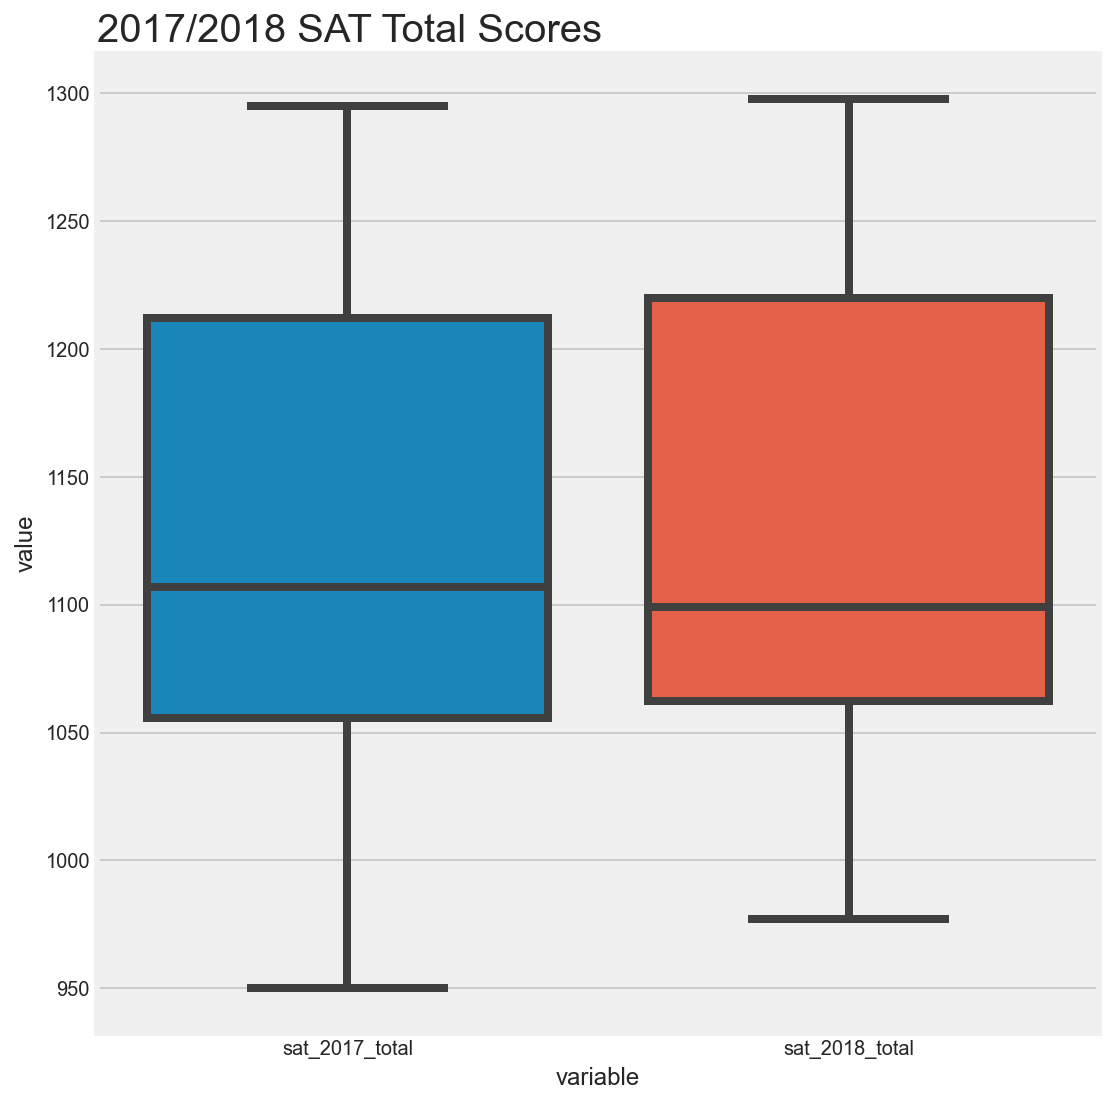

In [199]:
df = final[['sat_2017_total','sat_2018_total']]

plt.figure(figsize=(8,9))
sns.boxplot(x="variable", y="value", data=pd.melt(df))
plt.title("2017/2018 SAT Total Scores", position = (0,1), ha = 'left', fontsize=20);

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

<font color='blue'>It is well understood that student from low participation rate states are usually the most prepared, ambitious high schoolers taking both the SAT and ACT. These students tend to score higher, effectively raising the state's average.<br>
<br>
Therefore the state's average SAT tests score will only be meaningful and representative for states with participation rates more than 20% (https://blog.prepscholar.com/average-sat-scores-by-state-most-recent)<br>
    <br>
Between 2017 and 2018, the states of Colorado, Illinois and Rhode Island saw the biggest jump in SAT participation. The main reasons for the increase are usually state legislation relating to manadatory SAT test https://coloradosucceeds.org/policy/2018-colorado-student-test-scores-6-things-you-need-to-know/<br>
    <br>
Funding from state and Non profit organization providing free SAT test were very well received further boosting participation rates. https://www.coloradokids.org/more-colorado-high-school-students-participate-in-state-assessments-after-shift-to-psat/<br>
    <br>
Research also shows that Democrat leaning states are showing higher SAT adoptions.
    <font>

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

Conclusion
- Despite Test scores being negative correlated to participation rates, SAT and ACT scores distribution are similar.
- SAT can be a viable replacement for ACT in any states. Colorado has surpassed National Averages even during it's first year of full implementation.
- States that show remarkable SAT adoption rate increase in 2018 have the following success factors
    - State department of education making SAT test mandatory even from Pre-SAT levels
    - Fundings from state coffers, schools and non-profit organizations to make SAT test free
    - Democrat leaning states also show better inclination for SAT adoption
    
Recommendation
- Identify states that offers more opportunity for higher SAT adoption
    - Non-existing or expire ACT mandatory test
    - Democrat leaning or neutral
- Engage state's department of education and work towards mandatory SAT and Pre-SAT adoption.
- Actively promote factors that favors SAT adoption
    - Smart reductions in testing and a switch to more relevant assessments in high school.
    - Switching from the PARCC test to the Pre-SAT, ninth grade participation
- Work with state, schools, non-profit organization to gather funding for free SAT test, college application fees waiver or other financial assistance.